<a href="https://colab.research.google.com/github/adityasaxena-crypto/SST-pred/blob/main/SST_PRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install netCDF4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd

In [ ]:
data = Dataset(r'/content/gdrive/MyDrive/SST-pred/sst.wkmean.1990-present.nc')

In [ ]:
print(data.variables.keys())

dict_keys(['lat', 'lon', 'sst', 'time', 'time_bnds'])


In [ ]:
lat = data.variables['lat']
print(lat)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    units: degrees_north
    long_name: Latitude
    actual_range: [ 89.5 -89.5]
    standard_name: latitude
    axis: Y
    coordinate_defines: center
unlimited dimensions: 
current shape = (180,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
lon = data.variables['lon']
print(lon)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    units: degrees_east
    long_name: Longitude
    actual_range: [  0.5 359.5]
    standard_name: longitude
    axis: X
    coordinate_defines: center
unlimited dimensions: 
current shape = (360,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
data.variables['time'].units[11:20]
time = data.variables['time']
print(time)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1800-1-1 00:00:00
    long_name: Time
    actual_range: [69395. 81365.]
    delta_t: 0000-00-07 00:00:00
    avg_period: 0000-00-07 00:00:00
    standard_name: time
    axis: T
    bounds: time_bnds
unlimited dimensions: time
current shape = (1711,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
time_bnds = data.variables['time_bnds']
print(time_bnds)

<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, nbnds)
    long_name: Time Boundaries
unlimited dimensions: time
current shape = (1711, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [ ]:
sst = data.variables['sst']
print(sst)

<class 'netCDF4._netCDF4.Variable'>
int16 sst(time, lat, lon)
    long_name: Weekly Mean of Sea Surface Temperature
    unpacked_valid_range: [-5. 40.]
    actual_range: [-1.8  36.16]
    units: degC
    add_offset: 0.0
    scale_factor: 0.01
    missing_value: 32767
    precision: 2
    least_significant_digit: 2
    var_desc: Sea Surface Temperature
    dataset: NOAA Optimum Interpolation (OI) SST V2
    level_desc: Surface
    statistic: Weekly Mean
    parent_stat: Individual obs
    standard_name: sea_surface_temperature
    valid_range: [-500 4000]
unlimited dimensions: time
current shape = (1711, 180, 360)
filling on, default _FillValue of -32767 used


In [ ]:
print(sst.dimensions)

('time', 'lat', 'lon')


In [ ]:
time_data = data.variables['time'][:]

print(time_data)

[69395. 69402. 69409. ... 81351. 81358. 81365.]


In [ ]:
lon_data = data.variables['lon'][:]
print(lon_data)

[  0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5  11.5
  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5  23.5
  24.5  25.5  26.5  27.5  28.5  29.5  30.5  31.5  32.5  33.5  34.5  35.5
  36.5  37.5  38.5  39.5  40.5  41.5  42.5  43.5  44.5  45.5  46.5  47.5
  48.5  49.5  50.5  51.5  52.5  53.5  54.5  55.5  56.5  57.5  58.5  59.5
  60.5  61.5  62.5  63.5  64.5  65.5  66.5  67.5  68.5  69.5  70.5  71.5
  72.5  73.5  74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5
  84.5  85.5  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5
  96.5  97.5  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5
 108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 16

In [ ]:
lat_data = data.variables['lat'][:]
print(lat_data)

[ 89.5  88.5  87.5  86.5  85.5  84.5  83.5  82.5  81.5  80.5  79.5  78.5
  77.5  76.5  75.5  74.5  73.5  72.5  71.5  70.5  69.5  68.5  67.5  66.5
  65.5  64.5  63.5  62.5  61.5  60.5  59.5  58.5  57.5  56.5  55.5  54.5
  53.5  52.5  51.5  50.5  49.5  48.5  47.5  46.5  45.5  44.5  43.5  42.5
  41.5  40.5  39.5  38.5  37.5  36.5  35.5  34.5  33.5  32.5  31.5  30.5
  29.5  28.5  27.5  26.5  25.5  24.5  23.5  22.5  21.5  20.5  19.5  18.5
  17.5  16.5  15.5  14.5  13.5  12.5  11.5  10.5   9.5   8.5   7.5   6.5
   5.5   4.5   3.5   2.5   1.5   0.5  -0.5  -1.5  -2.5  -3.5  -4.5  -5.5
  -6.5  -7.5  -8.5  -9.5 -10.5 -11.5 -12.5 -13.5 -14.5 -15.5 -16.5 -17.5
 -18.5 -19.5 -20.5 -21.5 -22.5 -23.5 -24.5 -25.5 -26.5 -27.5 -28.5 -29.5
 -30.5 -31.5 -32.5 -33.5 -34.5 -35.5 -36.5 -37.5 -38.5 -39.5 -40.5 -41.5
 -42.5 -43.5 -44.5 -45.5 -46.5 -47.5 -48.5 -49.5 -50.5 -51.5 -52.5 -53.5
 -54.5 -55.5 -56.5 -57.5 -58.5 -59.5 -60.5 -61.5 -62.5 -63.5 -64.5 -65.5
 -66.5 -67.5 -68.5 -69.5 -70.5 -71.5 -72.5 -73.5 -7

Time-SERIES

In [ ]:
lon_bayofbengal = 13.5317
lat_bayofbengal = 87.5396

Squared Distance

In [ ]:
sq_dist_lat = (lat_data - lat_bayofbengal)**2
sq_dist_lon = (lon_data - lon_bayofbengal)**2

In [ ]:
 #Identify the index of the minimum value for lat and lon
min_index_lat = sq_dist_lat.argmin()
min_index_lon = sq_dist_lon.argmin()

In [ ]:
temp = data.variables['sst']
temp[1710,105,105]

25.59

In [ ]:
starting_date = '1990-1-1'
ending_date = '2021-1-1'

In [ ]:
date_range = pd.date_range(start = starting_date, end = ending_date)

In [ ]:
df = pd.DataFrame(0, columns = ['Temperature'], index = date_range )

In [ ]:
dt = np.arange(0,data.variables['time'].size )
type(dt[2])

numpy.int64

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
type(min_index_lon)

numpy.int64

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/SST-pred (1)/SSTdataset.csv')
print(df) 

      Unnamed: 0  week        Date        SST
0              0     1  31-12-1989  26.866176
1              1     2  07-01-1990  26.504941
2              2     3  14-01-1990  26.276147
3              3     4  21-01-1990  26.467588
4              4     5  28-01-1990  26.686000
...          ...   ...         ...        ...
1705        1705  1706  04-09-2022  29.754206
1706        1706  1707  11-09-2022  29.331500
1707        1707  1708  18-09-2022  29.083529
1708        1708  1709  25-09-2022  29.043529
1709        1709  1710  02-10-2022  29.329471

[1710 rows x 4 columns]


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
print(df)

      week       Date        SST
0        1 1989-12-31  26.866176
1        2 1990-07-01  26.504941
2        3 1990-01-14  26.276147
3        4 1990-01-21  26.467588
4        5 1990-01-28  26.686000
...    ...        ...        ...
1705  1706 2022-04-09  29.754206
1706  1707 2022-11-09  29.331500
1707  1708 2022-09-18  29.083529
1708  1709 2022-09-25  29.043529
1709  1710 2022-02-10  29.329471

[1710 rows x 3 columns]


In [ ]:
df = df.set_index(df.Date)
df.drop('Date', axis=1, inplace=True)
df['year'] = df.index.year
df['day'] = df.index.day
df['month'] = df.index.month

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_SST(df, share_type='SST', samples=250, period=7):
    if samples == 'all':
        res = seasonal_decompose(df[share_type].values, period=period)
    else:

        res = seasonal_decompose(df[share_type].values[-samples:], period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(16,8))
    axs[0].set_title('OBSERVED', fontsize=16)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=16)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=16)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=16)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()



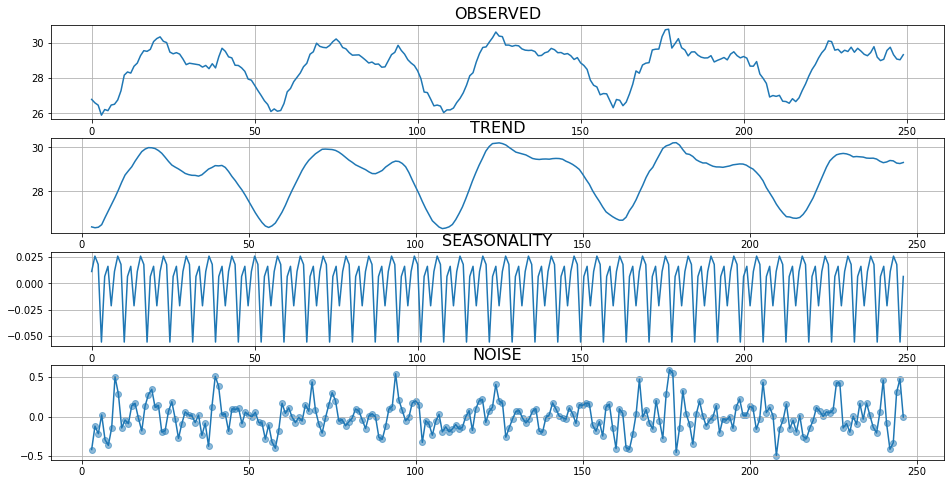

In [ ]:
decompose_SST(df, share_type='SST', samples=250, period=7)

In [ ]:
import lightgbm as lgb
import seaborn as sns
from sklearn.metrics import mean_absolute_error 
def train_time_series_with_folds(df, horizon=24*7):
    X = df.drop('SST', axis=1)
    y = df['SST']
    
    X_train, X_test = X.iloc[:-horizon,:], X.iloc[-horizon:,:]
    y_train, y_test = y.iloc[:-horizon], y.iloc[-horizon:]
    
    model = lgb.LGBMRegressor(random_state=42, n_estimators = 500)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = np.round(mean_absolute_error(y_test, predictions), 3)    
    
    fig = plt.figure(figsize=(16,8))
    plt.title(f'Real vs Prediction - MAE {mae}', fontsize=20)
    plt.plot(y_test, color='red')
    plt.plot(pd.Series(predictions, index=y_test.index), color='green')
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('SST', fontsize=16)
    plt.legend(labels=['Real', 'Prediction'], fontsize=16)
    plt.grid()
    plt.show()
    
 
    df_importances = pd.DataFrame({
        'feature': model.feature_name_,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    plt.title('Variable Importances', fontsize=16)
    sns.barplot(x=df_importances.importance, y=df_importances.feature, orient='h')
    plt.show()

      Unnamed: 0  week       Date        SST
0              0     1 1989-12-31  26.866176
1              1     2 1990-07-01  26.504941
2              2     3 1990-01-14  26.276147
3              3     4 1990-01-21  26.467588
4              4     5 1990-01-28  26.686000
...          ...   ...        ...        ...
1705        1705  1706 2022-04-09  29.754206
1706        1706  1707 2022-11-09  29.331500
1707        1707  1708 2022-09-18  29.083529
1708        1708  1709 2022-09-25  29.043529
1709        1709  1710 2022-02-10  29.329471

[1710 rows x 4 columns]


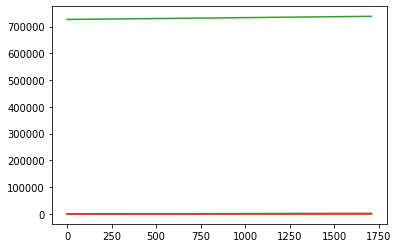

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/SST-pred (1)/SSTdataset.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
# df1 = df1.drop(['Unnamed: 0'], axis=1)
# df1 = df1.drop(['week'], axis=1)
print(df1)
plt.plot(df1)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest = adfuller (dataset, autolag='AIC')
  print("pval",dftest[1])
ad_test(df['SST'])

pval 5.325737905172685e-29


In [ ]:
df.head()

,week,SST,year,day,month
Date,,,,,
1989-12-31,1,26.866176,1989,31,12
1990-07-01,2,26.504941,1990,1,7
1990-01-14,3,26.276147,1990,14,1
1990-01-21,4,26.467588,1990,21,1
1990-01-28,5,26.686000,1990,28,1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
train=df.iloc[range(0,1196)]
test=df.iloc[1197:]
print(train.shape,test.shape)

(1196, 5) (513, 5)


In [ ]:
def dftoxy(df,window_size=5):
  dfnp=df.to_numpy()
  x=[]
  y=[]
  for i in range(len(dfnp)-window_size):
    row=[[a] for a in dfnp[i:i+5]]
    x.append(row)
    label=dfnp[i+5]
    y.append(label)
  return np.array(x),np.array(y)



In [ ]:
type(df["SST"])

pandas.core.series.Series

In [ ]:
wins=5
x,y=dftoxy(df['SST'],wins)

In [ ]:
x.shape,y.shape

((1705, 5, 1), (1705,))

In [ ]:
X_train,y_train= x[:1197],y[:1197]
X_val,y_val=x[1197:1368],y[1197:1368]
X_test,y_test=x[1368:],y[1368:]

In [ ]:

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((1197, 5, 1), (1197,), (171, 5, 1), (171,), (337, 5, 1), (337,))

In [ ]:
X_test.size,y_test.size

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
model1= Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64,activation='relu',return_sequences=True))
model1.add(LSTM(64,activation='relu',return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(1,'linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
34/38 [=========================>....] - ETA: 0s - loss: 6.8587 - root_mean_squared_error: 2.6189

38/38 [==============================] - 5s 91ms/step - loss: 6.8709 - root_mean_squared_error: 2.6212 - val_loss: 0.5192 - val_root_mean_squared_error: 0.7205
Epoch 2/100
29/38 [=====================>........] - ETA: 0s - loss: 7.1097 - root_mean_squared_error: 2.6664

38/38 [==============================] - 3s 86ms/step - loss: 7.1644 - root_mean_squared_error: 2.6766 - val_loss: 0.0994 - val_root_mean_squared_error: 0.3153
Epoch 3/100
35/38 [==========================>...] - ETA: 0s - loss: 7.2912 - root_mean_squared_error: 2.7002

38/38 [==============================] - 3s 82ms/step - loss: 7.2199 - root_mean_squared_error: 2.6870 - val_loss: 0.0876 - val_root_mean_squared_error: 0.2959
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 7.7372 - root_mean_squared_error: 2.7816 - val_loss: 0.1122 - val_root_mean_squared_error: 0.3349
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 7.6629 - root_mean_squared_error: 2.7682 - val_loss: 0.7388 - val_root_mean_squared_error: 0.8595
Epoch 6/100
38/38 [==============================] - 0s 6ms/step - loss: 6.8659 - root_mean_squared_error: 2.6203 - val_loss: 0.1073 - val_root_mean_squared_error: 0.3276
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 6.9861 - root_mean_squared_error: 2.6431 - val_loss: 0.1213 - val_root_mean_squared_error: 0.3483
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 7.8797 - root_mean_squared_error: 2.8071 - val_loss: 0.2094 - val_root_mean_squared

38/38 [==============================] - 3s 91ms/step - loss: 6.9599 - root_mean_squared_error: 2.6382 - val_loss: 0.0747 - val_root_mean_squared_error: 0.2733
Epoch 16/100
38/38 [==============================] - 0s 6ms/step - loss: 7.6567 - root_mean_squared_error: 2.7671 - val_loss: 0.5341 - val_root_mean_squared_error: 0.7308
Epoch 17/100
38/38 [==============================] - 0s 7ms/step - loss: 7.4025 - root_mean_squared_error: 2.7208 - val_loss: 0.4799 - val_root_mean_squared_error: 0.6927
Epoch 18/100
38/38 [==============================] - 0s 6ms/step - loss: 7.8103 - root_mean_squared_error: 2.7947 - val_loss: 0.0753 - val_root_mean_squared_error: 0.2745
Epoch 19/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2166 - root_mean_squared_error: 2.6864 - val_loss: 0.2897 - val_root_mean_squared_error: 0.5382
Epoch 20/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2920 - root_mean_squared_error: 2.7004 - val_loss: 0.2893 - val_root_mean_sq

38/38 [==============================] - 3s 82ms/step - loss: 7.1156 - root_mean_squared_error: 2.6675 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2677
Epoch 28/100
38/38 [==============================] - 0s 7ms/step - loss: 7.1613 - root_mean_squared_error: 2.6761 - val_loss: 0.1838 - val_root_mean_squared_error: 0.4287
Epoch 29/100
38/38 [==============================] - 0s 7ms/step - loss: 7.0297 - root_mean_squared_error: 2.6514 - val_loss: 0.1249 - val_root_mean_squared_error: 0.3534
Epoch 30/100
38/38 [==============================] - 0s 7ms/step - loss: 7.1443 - root_mean_squared_error: 2.6729 - val_loss: 0.5787 - val_root_mean_squared_error: 0.7607
Epoch 31/100
38/38 [==============================] - 0s 6ms/step - loss: 7.5348 - root_mean_squared_error: 2.7450 - val_loss: 0.2948 - val_root_mean_squared_error: 0.5429
Epoch 32/100
38/38 [==============================] - ETA: 0s - loss: 6.9536 - root_mean_squared_error: 2.6370

38/38 [==============================] - 3s 83ms/step - loss: 6.9536 - root_mean_squared_error: 2.6370 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2673
Epoch 33/100
38/38 [==============================] - 0s 6ms/step - loss: 6.7421 - root_mean_squared_error: 2.5965 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2678
Epoch 34/100
38/38 [==============================] - 0s 7ms/step - loss: 7.4420 - root_mean_squared_error: 2.7280 - val_loss: 0.2109 - val_root_mean_squared_error: 0.4593
Epoch 35/100
38/38 [==============================] - 0s 7ms/step - loss: 7.4091 - root_mean_squared_error: 2.7220 - val_loss: 0.6981 - val_root_mean_squared_error: 0.8355
Epoch 36/100
38/38 [==============================] - 0s 7ms/step - loss: 7.3133 - root_mean_squared_error: 2.7043 - val_loss: 0.1921 - val_root_mean_squared_error: 0.4383
Epoch 37/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2290 - root_mean_squared_error: 2.6887 - val_loss: 0.0899 - val_root_mean_sq

38/38 [==============================] - 3s 72ms/step - loss: 7.0596 - root_mean_squared_error: 2.6570 - val_loss: 0.0696 - val_root_mean_squared_error: 0.2638
Epoch 59/100
38/38 [==============================] - 0s 6ms/step - loss: 7.2772 - root_mean_squared_error: 2.6976 - val_loss: 0.8065 - val_root_mean_squared_error: 0.8981
Epoch 60/100
38/38 [==============================] - 0s 6ms/step - loss: 7.3770 - root_mean_squared_error: 2.7161 - val_loss: 0.1554 - val_root_mean_squared_error: 0.3942
Epoch 61/100
38/38 [==============================] - 0s 8ms/step - loss: 7.1980 - root_mean_squared_error: 2.6829 - val_loss: 0.0844 - val_root_mean_squared_error: 0.2905
Epoch 62/100
29/38 [=====================>........] - ETA: 0s - loss: 7.0302 - root_mean_squared_error: 2.6515

38/38 [==============================] - 3s 85ms/step - loss: 7.1436 - root_mean_squared_error: 2.6728 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 63/100
38/38 [==============================] - 0s 7ms/step - loss: 6.6710 - root_mean_squared_error: 2.5828 - val_loss: 0.1384 - val_root_mean_squared_error: 0.3721
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 7.2848 - root_mean_squared_error: 2.6990 - val_loss: 0.0770 - val_root_mean_squared_error: 0.2775
Epoch 65/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2228 - root_mean_squared_error: 2.6875 - val_loss: 0.3074 - val_root_mean_squared_error: 0.5545
Epoch 66/100
38/38 [==============================] - 0s 7ms/step - loss: 6.6306 - root_mean_squared_error: 2.5750 - val_loss: 0.0777 - val_root_mean_squared_error: 0.2788
Epoch 67/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2532 - root_mean_squared_error: 2.6932 - val_loss: 0.2964 - val_root_mean_sq

38/38 [==============================] - 4s 98ms/step - loss: 6.8552 - root_mean_squared_error: 2.6182 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2569
Epoch 74/100
38/38 [==============================] - 0s 7ms/step - loss: 7.1167 - root_mean_squared_error: 2.6677 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2703
Epoch 75/100
38/38 [==============================] - ETA: 0s - loss: 6.9926 - root_mean_squared_error: 2.6444

38/38 [==============================] - 3s 73ms/step - loss: 6.9926 - root_mean_squared_error: 2.6444 - val_loss: 0.0635 - val_root_mean_squared_error: 0.2520
Epoch 76/100
38/38 [==============================] - 0s 7ms/step - loss: 7.0101 - root_mean_squared_error: 2.6477 - val_loss: 0.1121 - val_root_mean_squared_error: 0.3349
Epoch 77/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2747 - root_mean_squared_error: 2.6972 - val_loss: 0.6378 - val_root_mean_squared_error: 0.7986
Epoch 78/100
38/38 [==============================] - 0s 7ms/step - loss: 7.4044 - root_mean_squared_error: 2.7211 - val_loss: 0.2479 - val_root_mean_squared_error: 0.4979
Epoch 79/100
38/38 [==============================] - 0s 7ms/step - loss: 7.2119 - root_mean_squared_error: 2.6855 - val_loss: 0.4062 - val_root_mean_squared_error: 0.6373
Epoch 80/100
38/38 [==============================] - 0s 7ms/step - loss: 6.7247 - root_mean_squared_error: 2.5932 - val_loss: 0.1487 - val_root_mean_sq

38/38 [==============================] - 3s 90ms/step - loss: 6.8186 - root_mean_squared_error: 2.6112 - val_loss: 0.0600 - val_root_mean_squared_error: 0.2449


In [ ]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,26.823648,26.632265
1,26.869505,26.929441
2,27.082010,27.136853
3,27.307074,27.430147
4,27.576874,27.557853
...,...,...
1192,27.643839,27.329412
1193,27.396364,27.402324
1194,27.430052,27.120941
1195,27.292336,26.780676


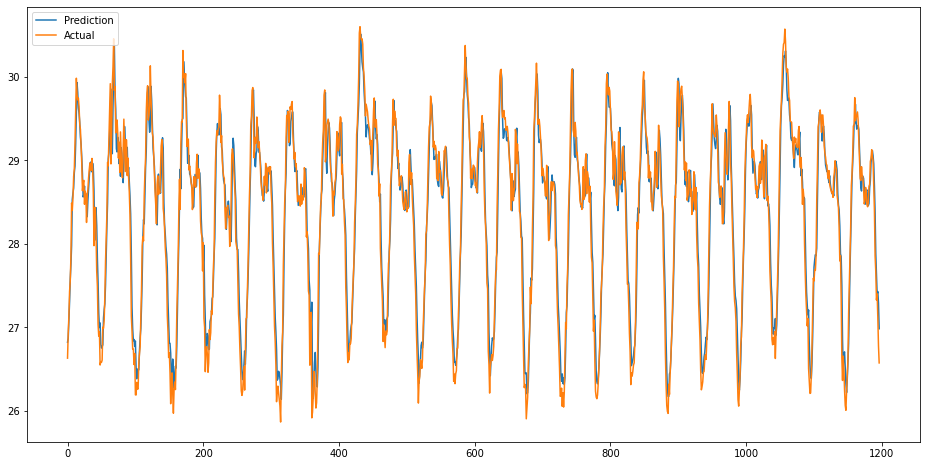

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model1.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.0818 - root_mean_squared_error: 0.2860
root_mean_squared_error: 28.60%


In [ ]:
y_test.size

337

In [ ]:
train_results.size

2394

In [ ]:
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
msg=f'R Squared Score on the test set is {R_sq:6.4f} '
print(msg)

R Squared Score on the test set is 0.9385 


In [ ]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

6/6 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,26.764112,26.495059
1,26.658485,26.363559
2,26.568968,26.211500
3,26.445272,26.501529
4,26.629084,26.764735
...,...,...
166,28.878414,28.948588
167,29.079645,28.995706
168,29.099506,29.383235
169,29.354235,29.810353


In [ ]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 2ms/step


,Test Predictions,Actuals
0,29.946001,30.214529
1,30.134558,30.674529
2,30.494303,30.824618
3,30.648935,30.533147
4,30.357679,29.993765
...,...,...
332,29.344055,29.754206
333,29.693924,29.331500
334,29.377424,29.083529
335,29.014376,29.043529


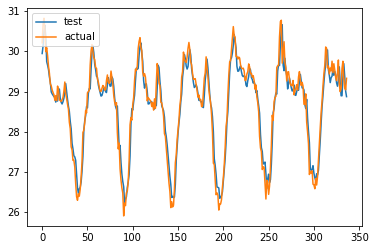

In [ ]:
plt.plot(test_results['Test Predictions'], label="test")
plt.plot(test_results['Actuals'],  label="actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
model2= Sequential()
model2.add(InputLayer((5,1)))
model2.add(LSTM(32,activation='relu',return_sequences=True))
model2.add(LSTM(32,activation='relu',return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(1,'linear'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 32)             4352      
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
27/38 [====================>.........] - ETA: 0s - loss: 22.2818 - root_mean_squared_error: 4.7204

38/38 [==============================] - 8s 145ms/step - loss: 22.4331 - root_mean_squared_error: 4.7364 - val_loss: 1.4833 - val_root_mean_squared_error: 1.2179
Epoch 2/100
38/38 [==============================] - 0s 6ms/step - loss: 21.2764 - root_mean_squared_error: 4.6126 - val_loss: 1.9619 - val_root_mean_squared_error: 1.4007
Epoch 3/100
36/38 [===========================>..] - ETA: 0s - loss: 21.6775 - root_mean_squared_error: 4.6559

38/38 [==============================] - 4s 108ms/step - loss: 22.0220 - root_mean_squared_error: 4.6928 - val_loss: 0.8508 - val_root_mean_squared_error: 0.9224
Epoch 4/100
38/38 [==============================] - 0s 6ms/step - loss: 21.7730 - root_mean_squared_error: 4.6662 - val_loss: 1.7005 - val_root_mean_squared_error: 1.3040
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 20.6439 - root_mean_squared_error: 4.5436 - val_loss: 1.2901 - val_root_mean_squared_error: 1.1358
Epoch 6/100
38/38 [==============================] - 0s 5ms/step - loss: 20.9694 - root_mean_squared_error: 4.5792 - val_loss: 1.4436 - val_root_mean_squared_error: 1.2015
Epoch 7/100
38/38 [==============================] - 0s 6ms/step - loss: 21.2612 - root_mean_squared_error: 4.6110 - val_loss: 1.6006 - val_root_mean_squared_error: 1.2652
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 21.3112 - root_mean_squared_error: 4.6164 - val_loss: 0.9194 - val_root_mean_

38/38 [==============================] - 4s 111ms/step - loss: 19.5694 - root_mean_squared_error: 4.4237 - val_loss: 0.7779 - val_root_mean_squared_error: 0.8820
Epoch 14/100
38/38 [==============================] - 0s 6ms/step - loss: 21.9143 - root_mean_squared_error: 4.6813 - val_loss: 1.5425 - val_root_mean_squared_error: 1.2420
Epoch 15/100
38/38 [==============================] - 0s 5ms/step - loss: 20.3963 - root_mean_squared_error: 4.5162 - val_loss: 1.0178 - val_root_mean_squared_error: 1.0089
Epoch 16/100
38/38 [==============================] - 0s 5ms/step - loss: 20.1781 - root_mean_squared_error: 4.4920 - val_loss: 1.0560 - val_root_mean_squared_error: 1.0276
Epoch 17/100
38/38 [==============================] - 0s 9ms/step - loss: 20.3432 - root_mean_squared_error: 4.5103 - val_loss: 1.4970 - val_root_mean_squared_error: 1.2235
Epoch 18/100
38/38 [==============================] - 0s 9ms/step - loss: 20.3677 - root_mean_squared_error: 4.5131 - val_loss: 1.1883 - val_root_

38/38 [==============================] - 3s 75ms/step - loss: 18.5481 - root_mean_squared_error: 4.3067 - val_loss: 0.7110 - val_root_mean_squared_error: 0.8432
Epoch 26/100
38/38 [==============================] - 0s 5ms/step - loss: 20.5696 - root_mean_squared_error: 4.5354 - val_loss: 1.7490 - val_root_mean_squared_error: 1.3225
Epoch 27/100
38/38 [==============================] - 0s 6ms/step - loss: 18.5442 - root_mean_squared_error: 4.3063 - val_loss: 1.6010 - val_root_mean_squared_error: 1.2653
Epoch 28/100
38/38 [==============================] - 0s 5ms/step - loss: 20.0115 - root_mean_squared_error: 4.4734 - val_loss: 1.2579 - val_root_mean_squared_error: 1.1216
Epoch 29/100
38/38 [==============================] - 0s 5ms/step - loss: 18.2836 - root_mean_squared_error: 4.2759 - val_loss: 1.0149 - val_root_mean_squared_error: 1.0074
Epoch 30/100
38/38 [==============================] - 0s 6ms/step - loss: 19.3455 - root_mean_squared_error: 4.3984 - val_loss: 0.7432 - val_root_m

38/38 [==============================] - 4s 101ms/step - loss: 14.3055 - root_mean_squared_error: 3.7823 - val_loss: 0.5472 - val_root_mean_squared_error: 0.7397
Epoch 49/100
38/38 [==============================] - 0s 6ms/step - loss: 14.9836 - root_mean_squared_error: 3.8709 - val_loss: 1.3515 - val_root_mean_squared_error: 1.1625
Epoch 50/100
37/38 [============================>.] - ETA: 0s - loss: 15.1085 - root_mean_squared_error: 3.8870

38/38 [==============================] - 3s 70ms/step - loss: 15.0396 - root_mean_squared_error: 3.8781 - val_loss: 0.5471 - val_root_mean_squared_error: 0.7397
Epoch 51/100
38/38 [==============================] - 0s 5ms/step - loss: 13.8247 - root_mean_squared_error: 3.7182 - val_loss: 0.6425 - val_root_mean_squared_error: 0.8016
Epoch 52/100
38/38 [==============================] - 0s 6ms/step - loss: 13.7855 - root_mean_squared_error: 3.7129 - val_loss: 0.6268 - val_root_mean_squared_error: 0.7917
Epoch 53/100
38/38 [==============================] - 0s 6ms/step - loss: 13.9144 - root_mean_squared_error: 3.7302 - val_loss: 1.9508 - val_root_mean_squared_error: 1.3967
Epoch 54/100
33/38 [=========================>....] - ETA: 0s - loss: 14.6450 - root_mean_squared_error: 3.8269

38/38 [==============================] - 3s 85ms/step - loss: 14.6273 - root_mean_squared_error: 3.8246 - val_loss: 0.5283 - val_root_mean_squared_error: 0.7269
Epoch 55/100
38/38 [==============================] - 0s 5ms/step - loss: 13.0604 - root_mean_squared_error: 3.6139 - val_loss: 0.6512 - val_root_mean_squared_error: 0.8070
Epoch 56/100
38/38 [==============================] - 0s 6ms/step - loss: 13.2957 - root_mean_squared_error: 3.6463 - val_loss: 0.6044 - val_root_mean_squared_error: 0.7775
Epoch 57/100
38/38 [==============================] - 0s 6ms/step - loss: 15.2812 - root_mean_squared_error: 3.9091 - val_loss: 0.5440 - val_root_mean_squared_error: 0.7376
Epoch 58/100
38/38 [==============================] - 0s 6ms/step - loss: 14.0313 - root_mean_squared_error: 3.7458 - val_loss: 1.7047 - val_root_mean_squared_error: 1.3056
Epoch 59/100
38/38 [==============================] - 0s 5ms/step - loss: 14.0874 - root_mean_squared_error: 3.7533 - val_loss: 0.7847 - val_root_m

38/38 [==============================] - 3s 82ms/step - loss: 12.7649 - root_mean_squared_error: 3.5728 - val_loss: 0.4658 - val_root_mean_squared_error: 0.6825
Epoch 67/100
38/38 [==============================] - 0s 5ms/step - loss: 13.6047 - root_mean_squared_error: 3.6885 - val_loss: 1.6752 - val_root_mean_squared_error: 1.2943
Epoch 68/100
38/38 [==============================] - 0s 5ms/step - loss: 11.9200 - root_mean_squared_error: 3.4525 - val_loss: 0.5050 - val_root_mean_squared_error: 0.7106
Epoch 69/100
38/38 [==============================] - 0s 5ms/step - loss: 13.6973 - root_mean_squared_error: 3.7010 - val_loss: 1.1253 - val_root_mean_squared_error: 1.0608
Epoch 70/100
38/38 [==============================] - 0s 5ms/step - loss: 12.9154 - root_mean_squared_error: 3.5938 - val_loss: 0.6021 - val_root_mean_squared_error: 0.7759
Epoch 71/100
38/38 [==============================] - 0s 6ms/step - loss: 12.8074 - root_mean_squared_error: 3.5787 - val_loss: 0.7609 - val_root_m

38/38 [==============================] - 3s 72ms/step - loss: 12.8910 - root_mean_squared_error: 3.5904 - val_loss: 0.4306 - val_root_mean_squared_error: 0.6562
Epoch 78/100
38/38 [==============================] - 0s 6ms/step - loss: 12.6953 - root_mean_squared_error: 3.5630 - val_loss: 0.5047 - val_root_mean_squared_error: 0.7104
Epoch 79/100
38/38 [==============================] - 0s 5ms/step - loss: 13.2066 - root_mean_squared_error: 3.6341 - val_loss: 0.8133 - val_root_mean_squared_error: 0.9018
Epoch 80/100
38/38 [==============================] - 0s 5ms/step - loss: 12.2295 - root_mean_squared_error: 3.4971 - val_loss: 0.6411 - val_root_mean_squared_error: 0.8007
Epoch 81/100
38/38 [==============================] - 0s 6ms/step - loss: 12.4356 - root_mean_squared_error: 3.5264 - val_loss: 1.4941 - val_root_mean_squared_error: 1.2223
Epoch 82/100
34/38 [=========================>....] - ETA: 0s - loss: 12.1560 - root_mean_squared_error: 3.4866

38/38 [==============================] - 3s 92ms/step - loss: 12.4834 - root_mean_squared_error: 3.5332 - val_loss: 0.4098 - val_root_mean_squared_error: 0.6402
Epoch 83/100
38/38 [==============================] - 0s 8ms/step - loss: 12.2084 - root_mean_squared_error: 3.4941 - val_loss: 1.5174 - val_root_mean_squared_error: 1.2318
Epoch 84/100
38/38 [==============================] - 0s 8ms/step - loss: 13.0228 - root_mean_squared_error: 3.6087 - val_loss: 0.6811 - val_root_mean_squared_error: 0.8253
Epoch 85/100
38/38 [==============================] - 0s 8ms/step - loss: 11.4602 - root_mean_squared_error: 3.3853 - val_loss: 0.8027 - val_root_mean_squared_error: 0.8960
Epoch 86/100
38/38 [==============================] - 0s 8ms/step - loss: 12.8842 - root_mean_squared_error: 3.5895 - val_loss: 0.4263 - val_root_mean_squared_error: 0.6530
Epoch 87/100
38/38 [==============================] - 0s 7ms/step - loss: 12.0816 - root_mean_squared_error: 3.4759 - val_loss: 0.5186 - val_root_m

38/38 [==============================] - 3s 72ms/step - loss: 11.2360 - root_mean_squared_error: 3.3520 - val_loss: 0.3500 - val_root_mean_squared_error: 0.5916
Epoch 91/100
38/38 [==============================] - 0s 5ms/step - loss: 11.5939 - root_mean_squared_error: 3.4050 - val_loss: 0.8953 - val_root_mean_squared_error: 0.9462
Epoch 92/100
35/38 [==========================>...] - ETA: 0s - loss: 12.5847 - root_mean_squared_error: 3.5475

38/38 [==============================] - 3s 86ms/step - loss: 12.4133 - root_mean_squared_error: 3.5232 - val_loss: 0.3382 - val_root_mean_squared_error: 0.5816
Epoch 93/100
38/38 [==============================] - 0s 6ms/step - loss: 11.9261 - root_mean_squared_error: 3.4534 - val_loss: 0.7558 - val_root_mean_squared_error: 0.8694
Epoch 94/100
38/38 [==============================] - 0s 5ms/step - loss: 12.8577 - root_mean_squared_error: 3.5858 - val_loss: 1.7193 - val_root_mean_squared_error: 1.3112
Epoch 95/100
38/38 [==============================] - 0s 6ms/step - loss: 12.8871 - root_mean_squared_error: 3.5899 - val_loss: 0.6268 - val_root_mean_squared_error: 0.7917
Epoch 96/100
38/38 [==============================] - 0s 6ms/step - loss: 12.9597 - root_mean_squared_error: 3.6000 - val_loss: 0.3857 - val_root_mean_squared_error: 0.6211
Epoch 97/100
38/38 [==============================] - 0s 5ms/step - loss: 12.0449 - root_mean_squared_error: 3.4706 - val_loss: 0.4285 - val_root_m

38/38 [==============================] - 3s 71ms/step - loss: 11.7568 - root_mean_squared_error: 3.4288 - val_loss: 0.3238 - val_root_mean_squared_error: 0.5690
Epoch 99/100
38/38 [==============================] - 0s 6ms/step - loss: 12.1307 - root_mean_squared_error: 3.4829 - val_loss: 0.3392 - val_root_mean_squared_error: 0.5824
Epoch 100/100
38/38 [==============================] - 0s 6ms/step - loss: 11.0892 - root_mean_squared_error: 3.3300 - val_loss: 1.2419 - val_root_mean_squared_error: 1.1144


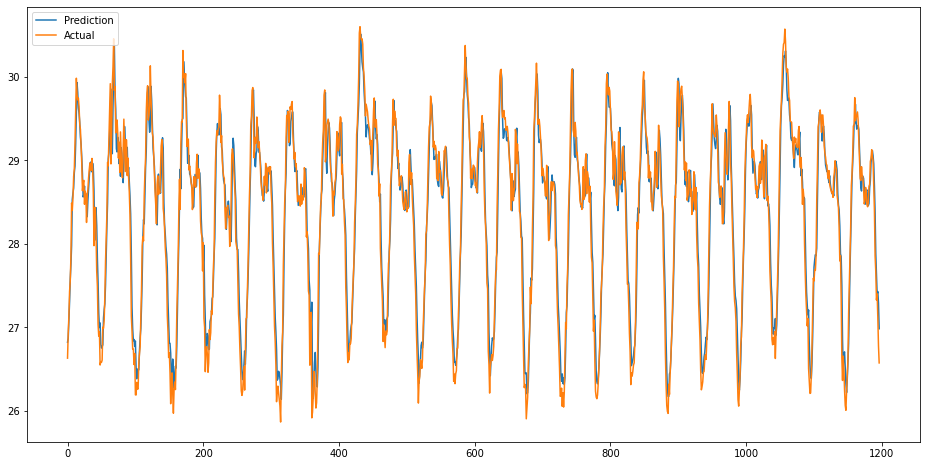

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,25.854200,26.632265
1,25.837631,26.929441
2,25.893862,27.136853
3,26.059820,27.430147
4,26.252256,27.557853
...,...,...
1192,27.315950,27.329412
1193,27.037563,27.402324
1194,26.834223,27.120941
1195,26.630877,26.780676


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model2.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model2.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
msg=f'R Squared Score on the test set is {R_sq:6.4f} '
print(msg)

11/11 [==============================] - 0s 2ms/step - loss: 1.1916 - root_mean_squared_error: 1.0916
root_mean_squared_error: 109.16%
R Squared Score on the test set is 0.4583 


In [ ]:
model3= Sequential()
model3.add(InputLayer((5,1)))
model3.add(LSTM(32,activation='relu',return_sequences=True))
model3.add(LSTM(64,activation='relu',return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(1,'linear'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 5, 32)             4352      
                                                                 
 lstm_12 (LSTM)              (None, 64)                24832     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 29,249
Trainable params: 29,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
32/38 [========================>.....] - ETA: 0s - loss: 846.7090 - root_mean_squared_error: 29.0983

38/38 [==============================] - 6s 109ms/step - loss: 840.1783 - root_mean_squared_error: 28.9858 - val_loss: 806.9862 - val_root_mean_squared_error: 28.4075
Epoch 2/100
29/38 [=====================>........] - ETA: 0s - loss: 774.1674 - root_mean_squared_error: 27.8239

38/38 [==============================] - 4s 98ms/step - loss: 767.7899 - root_mean_squared_error: 27.7090 - val_loss: 733.3765 - val_root_mean_squared_error: 27.0809
Epoch 3/100
37/38 [============================>.] - ETA: 0s - loss: 674.1106 - root_mean_squared_error: 25.9636

38/38 [==============================] - 4s 103ms/step - loss: 673.0181 - root_mean_squared_error: 25.9426 - val_loss: 598.1091 - val_root_mean_squared_error: 24.4563
Epoch 4/100
35/38 [==========================>...] - ETA: 0s - loss: 464.7170 - root_mean_squared_error: 21.5573

38/38 [==============================] - 3s 89ms/step - loss: 452.7302 - root_mean_squared_error: 21.2775 - val_loss: 242.6514 - val_root_mean_squared_error: 15.5773
Epoch 5/100
35/38 [==========================>...] - ETA: 0s - loss: 85.0224 - root_mean_squared_error: 9.2208  

38/38 [==============================] - 3s 76ms/step - loss: 81.1298 - root_mean_squared_error: 9.0072 - val_loss: 3.4975 - val_root_mean_squared_error: 1.8702
Epoch 6/100
33/38 [=========================>....] - ETA: 0s - loss: 21.8303 - root_mean_squared_error: 4.6723

38/38 [==============================] - 3s 80ms/step - loss: 21.4959 - root_mean_squared_error: 4.6364 - val_loss: 2.2938 - val_root_mean_squared_error: 1.5145
Epoch 7/100
33/38 [=========================>....] - ETA: 0s - loss: 19.8486 - root_mean_squared_error: 4.4552

38/38 [==============================] - 4s 100ms/step - loss: 19.6050 - root_mean_squared_error: 4.4278 - val_loss: 1.9369 - val_root_mean_squared_error: 1.3917
Epoch 8/100
38/38 [==============================] - 0s 6ms/step - loss: 20.1423 - root_mean_squared_error: 4.4880 - val_loss: 2.0558 - val_root_mean_squared_error: 1.4338
Epoch 9/100
32/38 [========================>.....] - ETA: 0s - loss: 18.4135 - root_mean_squared_error: 4.2911

38/38 [==============================] - 3s 75ms/step - loss: 18.9650 - root_mean_squared_error: 4.3549 - val_loss: 1.9278 - val_root_mean_squared_error: 1.3884
Epoch 10/100
38/38 [==============================] - 0s 6ms/step - loss: 16.9821 - root_mean_squared_error: 4.1209 - val_loss: 1.9994 - val_root_mean_squared_error: 1.4140
Epoch 11/100
30/38 [======================>.......] - ETA: 0s - loss: 19.6932 - root_mean_squared_error: 4.4377

38/38 [==============================] - 3s 71ms/step - loss: 19.7028 - root_mean_squared_error: 4.4388 - val_loss: 1.6945 - val_root_mean_squared_error: 1.3017
Epoch 12/100
35/38 [==========================>...] - ETA: 0s - loss: 18.1700 - root_mean_squared_error: 4.2626

38/38 [==============================] - 4s 107ms/step - loss: 18.0470 - root_mean_squared_error: 4.2482 - val_loss: 1.6341 - val_root_mean_squared_error: 1.2783
Epoch 13/100
37/38 [============================>.] - ETA: 0s - loss: 17.3003 - root_mean_squared_error: 4.1594

38/38 [==============================] - 3s 74ms/step - loss: 17.3915 - root_mean_squared_error: 4.1703 - val_loss: 1.4813 - val_root_mean_squared_error: 1.2171
Epoch 14/100
38/38 [==============================] - 0s 6ms/step - loss: 17.7815 - root_mean_squared_error: 4.2168 - val_loss: 1.5302 - val_root_mean_squared_error: 1.2370
Epoch 15/100
36/38 [===========================>..] - ETA: 0s - loss: 15.6840 - root_mean_squared_error: 3.9603

38/38 [==============================] - 3s 70ms/step - loss: 15.6405 - root_mean_squared_error: 3.9548 - val_loss: 1.3365 - val_root_mean_squared_error: 1.1561
Epoch 16/100
30/38 [======================>.......] - ETA: 0s - loss: 17.2001 - root_mean_squared_error: 4.1473

38/38 [==============================] - 3s 92ms/step - loss: 17.1987 - root_mean_squared_error: 4.1471 - val_loss: 1.2976 - val_root_mean_squared_error: 1.1391
Epoch 17/100
38/38 [==============================] - 0s 6ms/step - loss: 15.8621 - root_mean_squared_error: 3.9827 - val_loss: 1.8241 - val_root_mean_squared_error: 1.3506
Epoch 18/100
38/38 [==============================] - 0s 7ms/step - loss: 15.3867 - root_mean_squared_error: 3.9226 - val_loss: 2.1647 - val_root_mean_squared_error: 1.4713
Epoch 19/100
38/38 [==============================] - 0s 6ms/step - loss: 16.0181 - root_mean_squared_error: 4.0023 - val_loss: 1.3458 - val_root_mean_squared_error: 1.1601
Epoch 20/100
38/38 [==============================] - 0s 6ms/step - loss: 15.4615 - root_mean_squared_error: 3.9321 - val_loss: 2.3636 - val_root_mean_squared_error: 1.5374
Epoch 21/100
38/38 [==============================] - 0s 7ms/step - loss: 15.7030 - root_mean_squared_error: 3.9627 - val_loss: 1.6085 - val_root_m

38/38 [==============================] - 3s 86ms/step - loss: 16.1680 - root_mean_squared_error: 4.0209 - val_loss: 1.1116 - val_root_mean_squared_error: 1.0543
Epoch 24/100
38/38 [==============================] - 0s 6ms/step - loss: 14.4202 - root_mean_squared_error: 3.7974 - val_loss: 1.4683 - val_root_mean_squared_error: 1.2117
Epoch 25/100
38/38 [==============================] - 0s 6ms/step - loss: 14.1799 - root_mean_squared_error: 3.7656 - val_loss: 1.1506 - val_root_mean_squared_error: 1.0726
Epoch 26/100
34/38 [=========================>....] - ETA: 0s - loss: 13.6488 - root_mean_squared_error: 3.6944

38/38 [==============================] - 3s 72ms/step - loss: 13.6635 - root_mean_squared_error: 3.6964 - val_loss: 1.0081 - val_root_mean_squared_error: 1.0040
Epoch 27/100
30/38 [======================>.......] - ETA: 0s - loss: 14.9575 - root_mean_squared_error: 3.8675

38/38 [==============================] - 3s 93ms/step - loss: 14.8262 - root_mean_squared_error: 3.8505 - val_loss: 0.8939 - val_root_mean_squared_error: 0.9455
Epoch 28/100
38/38 [==============================] - 0s 6ms/step - loss: 13.8237 - root_mean_squared_error: 3.7180 - val_loss: 1.1557 - val_root_mean_squared_error: 1.0750
Epoch 29/100
38/38 [==============================] - 0s 7ms/step - loss: 13.0979 - root_mean_squared_error: 3.6191 - val_loss: 1.0630 - val_root_mean_squared_error: 1.0310
Epoch 30/100
33/38 [=========================>....] - ETA: 0s - loss: 13.4180 - root_mean_squared_error: 3.6631

38/38 [==============================] - 4s 107ms/step - loss: 13.4661 - root_mean_squared_error: 3.6696 - val_loss: 0.8047 - val_root_mean_squared_error: 0.8970
Epoch 31/100
38/38 [==============================] - 0s 10ms/step - loss: 13.5965 - root_mean_squared_error: 3.6873 - val_loss: 1.3407 - val_root_mean_squared_error: 1.1579
Epoch 32/100
38/38 [==============================] - 0s 8ms/step - loss: 13.6116 - root_mean_squared_error: 3.6894 - val_loss: 1.1247 - val_root_mean_squared_error: 1.0605
Epoch 33/100
31/38 [=======================>......] - ETA: 0s - loss: 12.9908 - root_mean_squared_error: 3.6043

38/38 [==============================] - 3s 72ms/step - loss: 13.0134 - root_mean_squared_error: 3.6074 - val_loss: 0.7306 - val_root_mean_squared_error: 0.8547
Epoch 34/100
38/38 [==============================] - 0s 6ms/step - loss: 13.7010 - root_mean_squared_error: 3.7015 - val_loss: 1.3310 - val_root_mean_squared_error: 1.1537
Epoch 35/100
38/38 [==============================] - 0s 6ms/step - loss: 12.7498 - root_mean_squared_error: 3.5707 - val_loss: 0.7392 - val_root_mean_squared_error: 0.8598
Epoch 36/100
38/38 [==============================] - 0s 7ms/step - loss: 12.2501 - root_mean_squared_error: 3.5000 - val_loss: 1.8046 - val_root_mean_squared_error: 1.3433
Epoch 37/100
38/38 [==============================] - 0s 6ms/step - loss: 12.3469 - root_mean_squared_error: 3.5138 - val_loss: 0.9204 - val_root_mean_squared_error: 0.9594
Epoch 38/100
38/38 [==============================] - 0s 6ms/step - loss: 12.5277 - root_mean_squared_error: 3.5394 - val_loss: 1.3796 - val_root_m

38/38 [==============================] - 3s 94ms/step - loss: 12.5672 - root_mean_squared_error: 3.5450 - val_loss: 0.6886 - val_root_mean_squared_error: 0.8298
Epoch 40/100
38/38 [==============================] - 0s 6ms/step - loss: 12.7069 - root_mean_squared_error: 3.5647 - val_loss: 1.0002 - val_root_mean_squared_error: 1.0001
Epoch 41/100
38/38 [==============================] - 0s 6ms/step - loss: 11.4104 - root_mean_squared_error: 3.3779 - val_loss: 1.6899 - val_root_mean_squared_error: 1.3000
Epoch 42/100
38/38 [==============================] - 0s 7ms/step - loss: 11.7775 - root_mean_squared_error: 3.4318 - val_loss: 1.7645 - val_root_mean_squared_error: 1.3284
Epoch 43/100
29/38 [=====================>........] - ETA: 0s - loss: 11.8151 - root_mean_squared_error: 3.4373

38/38 [==============================] - 3s 84ms/step - loss: 12.1465 - root_mean_squared_error: 3.4852 - val_loss: 0.6680 - val_root_mean_squared_error: 0.8173
Epoch 44/100
38/38 [==============================] - 0s 8ms/step - loss: 12.0560 - root_mean_squared_error: 3.4722 - val_loss: 1.2188 - val_root_mean_squared_error: 1.1040
Epoch 45/100
38/38 [==============================] - 0s 9ms/step - loss: 12.7000 - root_mean_squared_error: 3.5637 - val_loss: 0.7647 - val_root_mean_squared_error: 0.8745
Epoch 46/100
38/38 [==============================] - 0s 9ms/step - loss: 11.4594 - root_mean_squared_error: 3.3852 - val_loss: 0.7188 - val_root_mean_squared_error: 0.8478
Epoch 47/100
38/38 [==============================] - 0s 7ms/step - loss: 12.0500 - root_mean_squared_error: 3.4713 - val_loss: 0.7025 - val_root_mean_squared_error: 0.8382
Epoch 48/100
38/38 [==============================] - 0s 6ms/step - loss: 11.6120 - root_mean_squared_error: 3.4076 - val_loss: 1.0393 - val_root_m

38/38 [==============================] - 3s 71ms/step - loss: 11.3782 - root_mean_squared_error: 3.3732 - val_loss: 0.5951 - val_root_mean_squared_error: 0.7714
Epoch 54/100
38/38 [==============================] - 0s 7ms/step - loss: 12.0634 - root_mean_squared_error: 3.4732 - val_loss: 0.6364 - val_root_mean_squared_error: 0.7977
Epoch 55/100
38/38 [==============================] - 0s 7ms/step - loss: 11.2319 - root_mean_squared_error: 3.3514 - val_loss: 0.7218 - val_root_mean_squared_error: 0.8496
Epoch 56/100
32/38 [========================>.....] - ETA: 0s - loss: 11.7617 - root_mean_squared_error: 3.4295

38/38 [==============================] - 3s 90ms/step - loss: 11.7512 - root_mean_squared_error: 3.4280 - val_loss: 0.5400 - val_root_mean_squared_error: 0.7349
Epoch 57/100
38/38 [==============================] - 0s 6ms/step - loss: 10.8753 - root_mean_squared_error: 3.2978 - val_loss: 0.7850 - val_root_mean_squared_error: 0.8860
Epoch 58/100
38/38 [==============================] - 0s 6ms/step - loss: 12.0765 - root_mean_squared_error: 3.4751 - val_loss: 0.5417 - val_root_mean_squared_error: 0.7360
Epoch 59/100
32/38 [========================>.....] - ETA: 0s - loss: 11.3103 - root_mean_squared_error: 3.3631

38/38 [==============================] - 3s 86ms/step - loss: 11.3076 - root_mean_squared_error: 3.3627 - val_loss: 0.5360 - val_root_mean_squared_error: 0.7321
Epoch 60/100
38/38 [==============================] - 0s 9ms/step - loss: 11.4574 - root_mean_squared_error: 3.3849 - val_loss: 0.8125 - val_root_mean_squared_error: 0.9014
Epoch 61/100
38/38 [==============================] - 0s 7ms/step - loss: 11.7516 - root_mean_squared_error: 3.4281 - val_loss: 0.8493 - val_root_mean_squared_error: 0.9216
Epoch 62/100
33/38 [=========================>....] - ETA: 0s - loss: 11.1374 - root_mean_squared_error: 3.3373

38/38 [==============================] - 3s 75ms/step - loss: 10.8942 - root_mean_squared_error: 3.3006 - val_loss: 0.5102 - val_root_mean_squared_error: 0.7143
Epoch 63/100
38/38 [==============================] - 0s 5ms/step - loss: 11.2706 - root_mean_squared_error: 3.3572 - val_loss: 0.5715 - val_root_mean_squared_error: 0.7560
Epoch 64/100
38/38 [==============================] - 0s 6ms/step - loss: 9.5828 - root_mean_squared_error: 3.0956 - val_loss: 0.5941 - val_root_mean_squared_error: 0.7708
Epoch 65/100
38/38 [==============================] - 0s 6ms/step - loss: 11.6396 - root_mean_squared_error: 3.4117 - val_loss: 0.9457 - val_root_mean_squared_error: 0.9725
Epoch 66/100
31/38 [=======================>......] - ETA: 0s - loss: 11.4731 - root_mean_squared_error: 3.3872

38/38 [==============================] - 3s 91ms/step - loss: 11.1993 - root_mean_squared_error: 3.3465 - val_loss: 0.4814 - val_root_mean_squared_error: 0.6938
Epoch 67/100
38/38 [==============================] - 0s 6ms/step - loss: 10.4846 - root_mean_squared_error: 3.2380 - val_loss: 0.6682 - val_root_mean_squared_error: 0.8175
Epoch 68/100
38/38 [==============================] - 0s 7ms/step - loss: 10.2764 - root_mean_squared_error: 3.2057 - val_loss: 0.8641 - val_root_mean_squared_error: 0.9296
Epoch 69/100
38/38 [==============================] - 0s 7ms/step - loss: 10.5107 - root_mean_squared_error: 3.2420 - val_loss: 0.8655 - val_root_mean_squared_error: 0.9303
Epoch 70/100
38/38 [==============================] - 0s 7ms/step - loss: 10.8322 - root_mean_squared_error: 3.2912 - val_loss: 0.5260 - val_root_mean_squared_error: 0.7253
Epoch 71/100
38/38 [==============================] - 0s 7ms/step - loss: 11.5236 - root_mean_squared_error: 3.3946 - val_loss: 0.5295 - val_root_m

38/38 [==============================] - 3s 84ms/step - loss: 9.7789 - root_mean_squared_error: 3.1271 - val_loss: 0.4352 - val_root_mean_squared_error: 0.6597
Epoch 85/100
38/38 [==============================] - 0s 6ms/step - loss: 11.1906 - root_mean_squared_error: 3.3452 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7071
Epoch 86/100
38/38 [==============================] - 0s 6ms/step - loss: 10.3606 - root_mean_squared_error: 3.2188 - val_loss: 0.8826 - val_root_mean_squared_error: 0.9395
Epoch 87/100
38/38 [==============================] - 0s 6ms/step - loss: 10.4433 - root_mean_squared_error: 3.2316 - val_loss: 0.7819 - val_root_mean_squared_error: 0.8843
Epoch 88/100
38/38 [==============================] - 0s 6ms/step - loss: 11.4067 - root_mean_squared_error: 3.3774 - val_loss: 0.4397 - val_root_mean_squared_error: 0.6631
Epoch 89/100
38/38 [==============================] - 1s 15ms/step - loss: 10.2228 - root_mean_squared_error: 3.1973 - val_loss: 0.6916 - val_root_m

38/38 [==============================] - 3s 74ms/step - loss: 11.0493 - root_mean_squared_error: 3.3241 - val_loss: 0.4337 - val_root_mean_squared_error: 0.6585
Epoch 91/100
38/38 [==============================] - 0s 6ms/step - loss: 9.4830 - root_mean_squared_error: 3.0795 - val_loss: 0.8424 - val_root_mean_squared_error: 0.9178
Epoch 92/100
38/38 [==============================] - 0s 7ms/step - loss: 10.1892 - root_mean_squared_error: 3.1920 - val_loss: 0.5195 - val_root_mean_squared_error: 0.7208
Epoch 93/100
38/38 [==============================] - 0s 6ms/step - loss: 10.8316 - root_mean_squared_error: 3.2911 - val_loss: 0.5200 - val_root_mean_squared_error: 0.7211
Epoch 94/100
38/38 [==============================] - 0s 6ms/step - loss: 9.8825 - root_mean_squared_error: 3.1436 - val_loss: 0.9351 - val_root_mean_squared_error: 0.9670
Epoch 95/100
38/38 [==============================] - 0s 6ms/step - loss: 9.9061 - root_mean_squared_error: 3.1474 - val_loss: 0.5611 - val_root_mean

38/38 [==============================] - 4s 101ms/step - loss: 11.2866 - root_mean_squared_error: 3.3595 - val_loss: 0.3985 - val_root_mean_squared_error: 0.6313
Epoch 100/100
38/38 [==============================] - 0s 9ms/step - loss: 9.8604 - root_mean_squared_error: 3.1401 - val_loss: 0.4445 - val_root_mean_squared_error: 0.6667


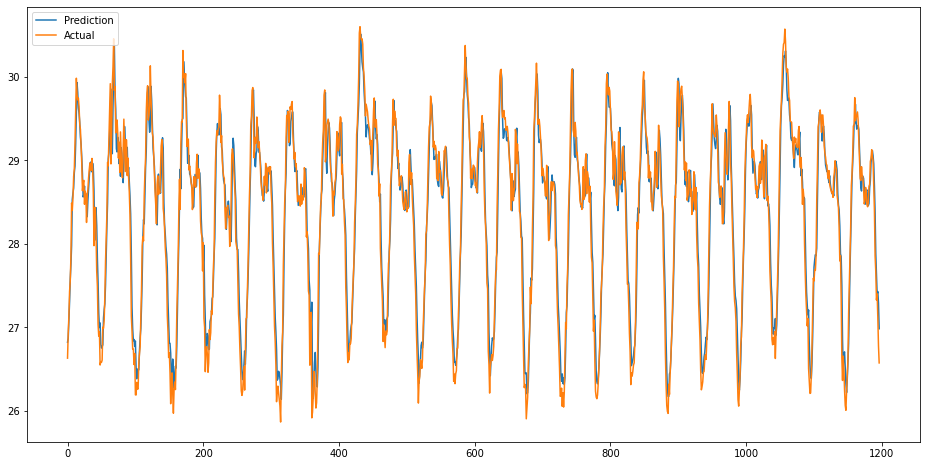

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model3.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 0s 2ms/step


,Train Predictions,Actuals
0,26.831696,26.632265
1,26.675505,26.929441
2,26.691908,27.136853
3,26.870583,27.430147
4,27.042774,27.557853
...,...,...
1192,28.226242,27.329412
1193,27.988705,27.402324
1194,27.817402,27.120941
1195,27.535530,26.780676


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model3.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model3.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
msg=f'R Squared Score on the test set is {R_sq:6.4f} '
print(msg)

11/11 [==============================] - 0s 3ms/step - loss: 0.4167 - root_mean_squared_error: 0.6455
root_mean_squared_error: 64.55%
R Squared Score on the test set is 0.7014 


In [ ]:
model4= Sequential()
model4.add(InputLayer((5,1)))
model4.add(LSTM(128,activation='relu',return_sequences=True))
model4.add(LSTM(128,activation='relu',return_sequences=False))
model4.add(Dropout(0.2))
model4.add(Dense(1,'linear'))
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 5, 128)            66560     
                                                                 
 lstm_14 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=750, callbacks=[cp1])

Epoch 1/750
36/38 [===========================>..] - ETA: 0s - loss: 4.1111 - root_mean_squared_error: 2.0276

38/38 [==============================] - 6s 111ms/step - loss: 4.0901 - root_mean_squared_error: 2.0224 - val_loss: 0.0841 - val_root_mean_squared_error: 0.2901
Epoch 2/750
38/38 [==============================] - 1s 16ms/step - loss: 3.9352 - root_mean_squared_error: 1.9837 - val_loss: 0.3558 - val_root_mean_squared_error: 0.5965
Epoch 3/750
38/38 [==============================] - 1s 15ms/step - loss: 3.5344 - root_mean_squared_error: 1.8800 - val_loss: 0.0842 - val_root_mean_squared_error: 0.2902
Epoch 4/750
38/38 [==============================] - 1s 15ms/step - loss: 3.8043 - root_mean_squared_error: 1.9504 - val_loss: 0.5059 - val_root_mean_squared_error: 0.7113
Epoch 5/750
38/38 [==============================] - 1s 16ms/step - loss: 3.9495 - root_mean_squared_error: 1.9873 - val_loss: 0.1733 - val_root_mean_squared_error: 0.4163
Epoch 6/750
38/38 [==============================] - 1s 16ms/step - loss: 4.0418 - root_mean_squared_error: 2.0104 - val_loss: 0.4297 - val_root_mean_s

38/38 [==============================] - 4s 103ms/step - loss: 3.5578 - root_mean_squared_error: 1.8862 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 8/750
38/38 [==============================] - 1s 15ms/step - loss: 3.6113 - root_mean_squared_error: 1.9004 - val_loss: 0.0934 - val_root_mean_squared_error: 0.3055
Epoch 9/750
38/38 [==============================] - 1s 15ms/step - loss: 4.0111 - root_mean_squared_error: 2.0028 - val_loss: 0.2269 - val_root_mean_squared_error: 0.4763
Epoch 10/750
38/38 [==============================] - 1s 15ms/step - loss: 3.8574 - root_mean_squared_error: 1.9640 - val_loss: 0.1247 - val_root_mean_squared_error: 0.3531
Epoch 11/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7178 - root_mean_squared_error: 1.9282 - val_loss: 0.1322 - val_root_mean_squared_error: 0.3636
Epoch 12/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7758 - root_mean_squared_error: 1.9431 - val_loss: 0.1087 - val_root_mea

38/38 [==============================] - 3s 83ms/step - loss: 3.9468 - root_mean_squared_error: 1.9866 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2714
Epoch 15/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7309 - root_mean_squared_error: 1.9316 - val_loss: 0.0782 - val_root_mean_squared_error: 0.2797
Epoch 16/750
38/38 [==============================] - 1s 16ms/step - loss: 3.9203 - root_mean_squared_error: 1.9800 - val_loss: 0.4122 - val_root_mean_squared_error: 0.6420
Epoch 17/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7202 - root_mean_squared_error: 1.9288 - val_loss: 0.1766 - val_root_mean_squared_error: 0.4203
Epoch 18/750
38/38 [==============================] - 1s 18ms/step - loss: 3.8525 - root_mean_squared_error: 1.9628 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3299
Epoch 19/750
38/38 [==============================] - 1s 26ms/step - loss: 3.8122 - root_mean_squared_error: 1.9525 - val_loss: 0.1285 - val_root_me

38/38 [==============================] - 5s 135ms/step - loss: 3.8612 - root_mean_squared_error: 1.9650 - val_loss: 0.0726 - val_root_mean_squared_error: 0.2694
Epoch 21/750
36/38 [===========================>..] - ETA: 0s - loss: 3.9368 - root_mean_squared_error: 1.9841

38/38 [==============================] - 3s 81ms/step - loss: 3.9282 - root_mean_squared_error: 1.9820 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2684
Epoch 22/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7387 - root_mean_squared_error: 1.9336 - val_loss: 0.1185 - val_root_mean_squared_error: 0.3442
Epoch 23/750
38/38 [==============================] - 1s 15ms/step - loss: 3.7594 - root_mean_squared_error: 1.9389 - val_loss: 0.1017 - val_root_mean_squared_error: 0.3190
Epoch 24/750
38/38 [==============================] - 1s 15ms/step - loss: 4.0351 - root_mean_squared_error: 2.0088 - val_loss: 1.3863 - val_root_mean_squared_error: 1.1774
Epoch 25/750
38/38 [==============================] - 1s 15ms/step - loss: 3.9636 - root_mean_squared_error: 1.9909 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2706
Epoch 26/750
38/38 [==============================] - 1s 16ms/step - loss: 3.9762 - root_mean_squared_error: 1.9940 - val_loss: 0.0919 - val_root_me

38/38 [==============================] - 3s 81ms/step - loss: 3.5397 - root_mean_squared_error: 1.8814 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2618
Epoch 38/750
38/38 [==============================] - 1s 15ms/step - loss: 3.5651 - root_mean_squared_error: 1.8881 - val_loss: 0.2033 - val_root_mean_squared_error: 0.4509
Epoch 39/750
38/38 [==============================] - 1s 15ms/step - loss: 3.4929 - root_mean_squared_error: 1.8689 - val_loss: 0.5482 - val_root_mean_squared_error: 0.7404
Epoch 40/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7248 - root_mean_squared_error: 1.9300 - val_loss: 0.1750 - val_root_mean_squared_error: 0.4184
Epoch 41/750
38/38 [==============================] - 1s 15ms/step - loss: 3.6175 - root_mean_squared_error: 1.9020 - val_loss: 0.1053 - val_root_mean_squared_error: 0.3246
Epoch 42/750
38/38 [==============================] - 1s 14ms/step - loss: 3.6665 - root_mean_squared_error: 1.9148 - val_loss: 0.0817 - val_root_me

38/38 [==============================] - 5s 122ms/step - loss: 3.5705 - root_mean_squared_error: 1.8896 - val_loss: 0.0676 - val_root_mean_squared_error: 0.2600
Epoch 103/750
38/38 [==============================] - 1s 14ms/step - loss: 3.3334 - root_mean_squared_error: 1.8257 - val_loss: 0.0695 - val_root_mean_squared_error: 0.2636
Epoch 104/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7735 - root_mean_squared_error: 1.9426 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2922
Epoch 105/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7885 - root_mean_squared_error: 1.9464 - val_loss: 0.0899 - val_root_mean_squared_error: 0.2998
Epoch 106/750
38/38 [==============================] - 1s 15ms/step - loss: 3.7160 - root_mean_squared_error: 1.9277 - val_loss: 0.0930 - val_root_mean_squared_error: 0.3050
Epoch 107/750
38/38 [==============================] - 1s 16ms/step - loss: 3.6669 - root_mean_squared_error: 1.9149 - val_loss: 0.2065 - val_r

38/38 [==============================] - 4s 101ms/step - loss: 3.5529 - root_mean_squared_error: 1.8849 - val_loss: 0.0668 - val_root_mean_squared_error: 0.2584
Epoch 154/750
38/38 [==============================] - 1s 19ms/step - loss: 3.6037 - root_mean_squared_error: 1.8983 - val_loss: 0.1131 - val_root_mean_squared_error: 0.3363
Epoch 155/750
38/38 [==============================] - 1s 16ms/step - loss: 3.4376 - root_mean_squared_error: 1.8541 - val_loss: 0.2666 - val_root_mean_squared_error: 0.5163
Epoch 156/750
38/38 [==============================] - 1s 15ms/step - loss: 3.8144 - root_mean_squared_error: 1.9531 - val_loss: 0.0695 - val_root_mean_squared_error: 0.2635
Epoch 157/750
38/38 [==============================] - 1s 14ms/step - loss: 3.8027 - root_mean_squared_error: 1.9501 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3688
Epoch 158/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7138 - root_mean_squared_error: 1.9271 - val_loss: 0.1011 - val_r

38/38 [==============================] - 3s 82ms/step - loss: 3.5400 - root_mean_squared_error: 1.8815 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2572
Epoch 183/750
38/38 [==============================] - 1s 16ms/step - loss: 3.6306 - root_mean_squared_error: 1.9054 - val_loss: 0.1245 - val_root_mean_squared_error: 0.3528
Epoch 184/750
38/38 [==============================] - 1s 16ms/step - loss: 3.5369 - root_mean_squared_error: 1.8807 - val_loss: 0.0721 - val_root_mean_squared_error: 0.2686
Epoch 185/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2587 - root_mean_squared_error: 1.8052 - val_loss: 0.3731 - val_root_mean_squared_error: 0.6108
Epoch 186/750
38/38 [==============================] - 1s 20ms/step - loss: 3.3573 - root_mean_squared_error: 1.8323 - val_loss: 0.0737 - val_root_mean_squared_error: 0.2715
Epoch 187/750
38/38 [==============================] - ETA: 0s - loss: 3.5900 - root_mean_squared_error: 1.8947

38/38 [==============================] - 4s 98ms/step - loss: 3.5900 - root_mean_squared_error: 1.8947 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2525
Epoch 188/750
38/38 [==============================] - 1s 16ms/step - loss: 3.5058 - root_mean_squared_error: 1.8724 - val_loss: 0.2780 - val_root_mean_squared_error: 0.5273
Epoch 189/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3981 - root_mean_squared_error: 1.8434 - val_loss: 0.1318 - val_root_mean_squared_error: 0.3631
Epoch 190/750
37/38 [============================>.] - ETA: 0s - loss: 3.3527 - root_mean_squared_error: 1.8310

38/38 [==============================] - 4s 105ms/step - loss: 3.3567 - root_mean_squared_error: 1.8321 - val_loss: 0.0609 - val_root_mean_squared_error: 0.2468
Epoch 191/750
38/38 [==============================] - 1s 16ms/step - loss: 3.7122 - root_mean_squared_error: 1.9267 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3575
Epoch 192/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2632 - root_mean_squared_error: 1.8064 - val_loss: 0.3034 - val_root_mean_squared_error: 0.5508
Epoch 193/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3715 - root_mean_squared_error: 1.8362 - val_loss: 0.1046 - val_root_mean_squared_error: 0.3235
Epoch 194/750
38/38 [==============================] - 1s 15ms/step - loss: 3.6236 - root_mean_squared_error: 1.9036 - val_loss: 0.1847 - val_root_mean_squared_error: 0.4298
Epoch 195/750
38/38 [==============================] - 1s 16ms/step - loss: 3.5904 - root_mean_squared_error: 1.8948 - val_loss: 0.0665 - val_r

38/38 [==============================] - 3s 85ms/step - loss: 3.2678 - root_mean_squared_error: 1.8077 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2438
Epoch 303/750
38/38 [==============================] - 1s 16ms/step - loss: 3.3832 - root_mean_squared_error: 1.8394 - val_loss: 0.3471 - val_root_mean_squared_error: 0.5892
Epoch 304/750
38/38 [==============================] - 1s 15ms/step - loss: 3.6338 - root_mean_squared_error: 1.9063 - val_loss: 0.0607 - val_root_mean_squared_error: 0.2463
Epoch 305/750
38/38 [==============================] - 1s 16ms/step - loss: 3.1204 - root_mean_squared_error: 1.7665 - val_loss: 0.0772 - val_root_mean_squared_error: 0.2779
Epoch 306/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2184 - root_mean_squared_error: 1.7940 - val_loss: 0.0858 - val_root_mean_squared_error: 0.2929
Epoch 307/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2785 - root_mean_squared_error: 1.8107 - val_loss: 0.1116 - val_ro

38/38 [==============================] - 4s 98ms/step - loss: 3.3347 - root_mean_squared_error: 1.8261 - val_loss: 0.0555 - val_root_mean_squared_error: 0.2356
Epoch 331/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3093 - root_mean_squared_error: 1.8191 - val_loss: 0.0811 - val_root_mean_squared_error: 0.2848
Epoch 332/750
38/38 [==============================] - 1s 15ms/step - loss: 3.1707 - root_mean_squared_error: 1.7806 - val_loss: 0.0894 - val_root_mean_squared_error: 0.2991
Epoch 333/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2974 - root_mean_squared_error: 1.8159 - val_loss: 0.0730 - val_root_mean_squared_error: 0.2702
Epoch 334/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2730 - root_mean_squared_error: 1.8092 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 335/750
38/38 [==============================] - 1s 16ms/step - loss: 3.3033 - root_mean_squared_error: 1.8175 - val_loss: 0.0584 - val_ro

38/38 [==============================] - 4s 119ms/step - loss: 3.1974 - root_mean_squared_error: 1.7881 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2349
Epoch 440/750
38/38 [==============================] - 1s 15ms/step - loss: 3.0346 - root_mean_squared_error: 1.7420 - val_loss: 0.1182 - val_root_mean_squared_error: 0.3438
Epoch 441/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3180 - root_mean_squared_error: 1.8215 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3008
Epoch 442/750
38/38 [==============================] - 1s 17ms/step - loss: 3.1815 - root_mean_squared_error: 1.7837 - val_loss: 0.2907 - val_root_mean_squared_error: 0.5392
Epoch 443/750
38/38 [==============================] - 1s 16ms/step - loss: 3.0729 - root_mean_squared_error: 1.7530 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2403
Epoch 444/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2053 - root_mean_squared_error: 1.7903 - val_loss: 0.1073 - val_r

38/38 [==============================] - 3s 85ms/step - loss: 3.1589 - root_mean_squared_error: 1.7773 - val_loss: 0.0542 - val_root_mean_squared_error: 0.2329
Epoch 481/750
38/38 [==============================] - 1s 17ms/step - loss: 3.4541 - root_mean_squared_error: 1.8585 - val_loss: 0.2680 - val_root_mean_squared_error: 0.5176
Epoch 482/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2677 - root_mean_squared_error: 1.8077 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2646
Epoch 483/750
38/38 [==============================] - 1s 15ms/step - loss: 3.1471 - root_mean_squared_error: 1.7740 - val_loss: 0.2713 - val_root_mean_squared_error: 0.5209
Epoch 484/750
38/38 [==============================] - 1s 15ms/step - loss: 3.5232 - root_mean_squared_error: 1.8770 - val_loss: 0.1168 - val_root_mean_squared_error: 0.3418
Epoch 485/750
38/38 [==============================] - 1s 15ms/step - loss: 3.0408 - root_mean_squared_error: 1.7438 - val_loss: 0.0816 - val_ro

38/38 [==============================] - 4s 97ms/step - loss: 3.2777 - root_mean_squared_error: 1.8104 - val_loss: 0.0534 - val_root_mean_squared_error: 0.2310
Epoch 506/750
36/38 [===========================>..] - ETA: 0s - loss: 3.1154 - root_mean_squared_error: 1.7651

38/38 [==============================] - 4s 119ms/step - loss: 3.1076 - root_mean_squared_error: 1.7628 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2277
Epoch 507/750
38/38 [==============================] - 1s 16ms/step - loss: 3.3067 - root_mean_squared_error: 1.8184 - val_loss: 0.1023 - val_root_mean_squared_error: 0.3198
Epoch 508/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2157 - root_mean_squared_error: 1.7932 - val_loss: 0.0610 - val_root_mean_squared_error: 0.2470
Epoch 509/750
38/38 [==============================] - 1s 16ms/step - loss: 3.4933 - root_mean_squared_error: 1.8690 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2618
Epoch 510/750
38/38 [==============================] - 1s 16ms/step - loss: 3.3049 - root_mean_squared_error: 1.8179 - val_loss: 0.0944 - val_root_mean_squared_error: 0.3073
Epoch 511/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3340 - root_mean_squared_error: 1.8259 - val_loss: 0.0764 - val_r

38/38 [==============================] - 4s 103ms/step - loss: 2.9215 - root_mean_squared_error: 1.7093 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2275
Epoch 517/750
38/38 [==============================] - 1s 17ms/step - loss: 3.1596 - root_mean_squared_error: 1.7775 - val_loss: 0.1059 - val_root_mean_squared_error: 0.3255
Epoch 518/750
38/38 [==============================] - 1s 16ms/step - loss: 3.1852 - root_mean_squared_error: 1.7847 - val_loss: 0.2470 - val_root_mean_squared_error: 0.4970
Epoch 519/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2474 - root_mean_squared_error: 1.8021 - val_loss: 0.0882 - val_root_mean_squared_error: 0.2969
Epoch 520/750
38/38 [==============================] - 1s 16ms/step - loss: 3.0936 - root_mean_squared_error: 1.7589 - val_loss: 0.0605 - val_root_mean_squared_error: 0.2461
Epoch 521/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2480 - root_mean_squared_error: 1.8022 - val_loss: 0.4693 - val_r

38/38 [==============================] - 3s 83ms/step - loss: 3.3068 - root_mean_squared_error: 1.8185 - val_loss: 0.0508 - val_root_mean_squared_error: 0.2253
Epoch 639/750
38/38 [==============================] - 1s 17ms/step - loss: 2.8360 - root_mean_squared_error: 1.6841 - val_loss: 0.2476 - val_root_mean_squared_error: 0.4976
Epoch 640/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2125 - root_mean_squared_error: 1.7923 - val_loss: 0.2511 - val_root_mean_squared_error: 0.5011
Epoch 641/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2331 - root_mean_squared_error: 1.7981 - val_loss: 0.0578 - val_root_mean_squared_error: 0.2405
Epoch 642/750
38/38 [==============================] - 1s 19ms/step - loss: 2.9909 - root_mean_squared_error: 1.7294 - val_loss: 0.1056 - val_root_mean_squared_error: 0.3250
Epoch 643/750
38/38 [==============================] - 1s 26ms/step - loss: 3.2355 - root_mean_squared_error: 1.7987 - val_loss: 0.0525 - val_ro

38/38 [==============================] - 4s 96ms/step - loss: 3.0016 - root_mean_squared_error: 1.7325 - val_loss: 0.0500 - val_root_mean_squared_error: 0.2236
Epoch 660/750
38/38 [==============================] - 1s 26ms/step - loss: 3.3263 - root_mean_squared_error: 1.8238 - val_loss: 0.3153 - val_root_mean_squared_error: 0.5615
Epoch 661/750
38/38 [==============================] - 1s 16ms/step - loss: 3.4940 - root_mean_squared_error: 1.8692 - val_loss: 0.2035 - val_root_mean_squared_error: 0.4511
Epoch 662/750
38/38 [==============================] - 1s 16ms/step - loss: 3.4083 - root_mean_squared_error: 1.8462 - val_loss: 0.1549 - val_root_mean_squared_error: 0.3936
Epoch 663/750
38/38 [==============================] - 1s 15ms/step - loss: 3.1917 - root_mean_squared_error: 1.7865 - val_loss: 0.1923 - val_root_mean_squared_error: 0.4385
Epoch 664/750
38/38 [==============================] - 1s 16ms/step - loss: 3.0812 - root_mean_squared_error: 1.7553 - val_loss: 0.0766 - val_ro

38/38 [==============================] - 5s 124ms/step - loss: 3.0555 - root_mean_squared_error: 1.7480 - val_loss: 0.0500 - val_root_mean_squared_error: 0.2235
Epoch 677/750
37/38 [============================>.] - ETA: 0s - loss: 3.1347 - root_mean_squared_error: 1.7705

38/38 [==============================] - 3s 85ms/step - loss: 3.1502 - root_mean_squared_error: 1.7749 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2195
Epoch 678/750
38/38 [==============================] - 1s 16ms/step - loss: 2.8362 - root_mean_squared_error: 1.6841 - val_loss: 0.2257 - val_root_mean_squared_error: 0.4751
Epoch 679/750
38/38 [==============================] - 1s 16ms/step - loss: 3.1375 - root_mean_squared_error: 1.7713 - val_loss: 0.1382 - val_root_mean_squared_error: 0.3718
Epoch 680/750
38/38 [==============================] - 1s 16ms/step - loss: 3.1771 - root_mean_squared_error: 1.7824 - val_loss: 0.1845 - val_root_mean_squared_error: 0.4295
Epoch 681/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3364 - root_mean_squared_error: 1.8266 - val_loss: 0.3736 - val_root_mean_squared_error: 0.6112
Epoch 682/750
38/38 [==============================] - 1s 15ms/step - loss: 3.3295 - root_mean_squared_error: 1.8247 - val_loss: 0.3092 - val_ro

38/38 [==============================] - 3s 84ms/step - loss: 2.9316 - root_mean_squared_error: 1.7122 - val_loss: 0.0480 - val_root_mean_squared_error: 0.2191
Epoch 714/750
38/38 [==============================] - 1s 17ms/step - loss: 3.1382 - root_mean_squared_error: 1.7715 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 715/750
38/38 [==============================] - 1s 15ms/step - loss: 3.2067 - root_mean_squared_error: 1.7907 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2629
Epoch 716/750
38/38 [==============================] - 1s 17ms/step - loss: 3.0860 - root_mean_squared_error: 1.7567 - val_loss: 0.1559 - val_root_mean_squared_error: 0.3948
Epoch 717/750
38/38 [==============================] - 1s 16ms/step - loss: 3.2572 - root_mean_squared_error: 1.8048 - val_loss: 0.2572 - val_root_mean_squared_error: 0.5072
Epoch 718/750
38/38 [==============================] - 1s 17ms/step - loss: 3.1517 - root_mean_squared_error: 1.7753 - val_loss: 0.0524 - val_ro

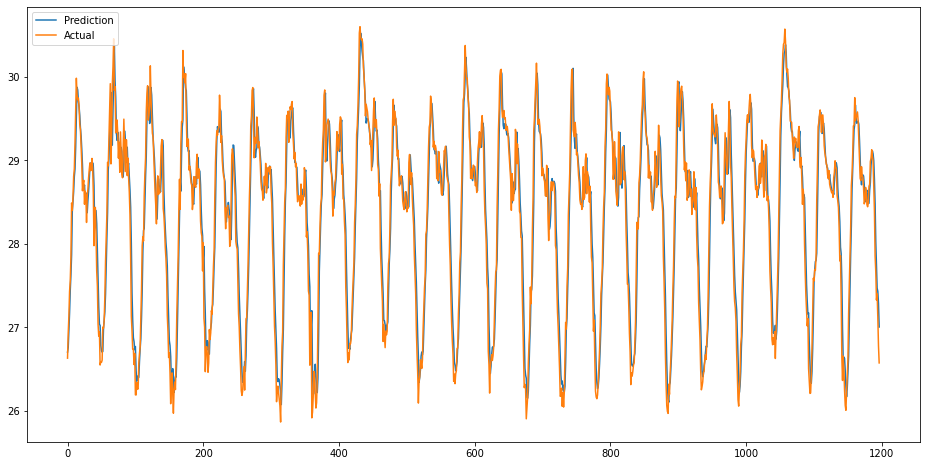

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model4.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 0s 4ms/step


,Train Predictions,Actuals
0,26.713648,26.632265
1,26.718847,26.929441
2,26.992062,27.136853
3,27.202566,27.430147
4,27.486807,27.557853
...,...,...
1192,27.610231,27.329412
1193,27.302031,27.402324
1194,27.370672,27.120941
1195,27.141169,26.780676


In [ ]:
test_predictions = model4.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 5ms/step


,Train Predictions,Actuals
0,29.916830,30.214529
1,30.149088,30.674529
2,30.581587,30.824618
3,30.705194,30.533147
4,30.380463,29.993765
...,...,...
332,29.439129,29.754206
333,29.677197,29.331500
334,29.269590,29.083529
335,28.995790,29.043529


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model4.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model4.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 4ms/step - loss: 0.0755 - root_mean_squared_error: 0.2748
root_mean_squared_error: 27.48%
R Squared Score on the train set is 0.9439
R Squared Score on the test set is 0.9436


In [ ]:
model5= Sequential()
model5.add(InputLayer((5,1)))
model5.add(LSTM(32,activation='relu',return_sequences=True))
model5.add(LSTM(64,activation='relu',return_sequences=True))
model5.add(LSTM(128,activation='relu',return_sequences=True))
model5.add(LSTM(128,activation='relu',return_sequences=True))
model5.add(LSTM(256,activation='relu',return_sequences=False))
model5.add(Dropout(0.2))
model5.add(Dense(1,'linear'))
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 5, 64)             24832     
                                                                 
 lstm_2 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_3 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_4 (LSTM)               (None, 256)               394240    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=750, callbacks=[cp1])

Epoch 1/750
37/38 [============================>.] - ETA: 0s - loss: 802.3596 - root_mean_squared_error: 28.3260

38/38 [==============================] - 21s 252ms/step - loss: 802.5227 - root_mean_squared_error: 28.3288 - val_loss: 801.3750 - val_root_mean_squared_error: 28.3086
Epoch 2/750
37/38 [============================>.] - ETA: 0s - loss: 738.1886 - root_mean_squared_error: 27.1696

38/38 [==============================] - 8s 227ms/step - loss: 735.2090 - root_mean_squared_error: 27.1147 - val_loss: 412.5336 - val_root_mean_squared_error: 20.3109
Epoch 3/750
37/38 [============================>.] - ETA: 0s - loss: 72.1099 - root_mean_squared_error: 8.4918

38/38 [==============================] - 8s 207ms/step - loss: 71.4962 - root_mean_squared_error: 8.4555 - val_loss: 20.1515 - val_root_mean_squared_error: 4.4890
Epoch 4/750
37/38 [============================>.] - ETA: 0s - loss: 16.0312 - root_mean_squared_error: 4.0039

38/38 [==============================] - 8s 222ms/step - loss: 15.9717 - root_mean_squared_error: 3.9965 - val_loss: 15.0456 - val_root_mean_squared_error: 3.8789
Epoch 5/750
37/38 [============================>.] - ETA: 0s - loss: 14.4099 - root_mean_squared_error: 3.7960

38/38 [==============================] - 9s 230ms/step - loss: 14.3855 - root_mean_squared_error: 3.7928 - val_loss: 13.8603 - val_root_mean_squared_error: 3.7229
Epoch 6/750
37/38 [============================>.] - ETA: 0s - loss: 13.6012 - root_mean_squared_error: 3.6880

38/38 [==============================] - 8s 211ms/step - loss: 13.6225 - root_mean_squared_error: 3.6909 - val_loss: 12.5491 - val_root_mean_squared_error: 3.5425
Epoch 7/750
37/38 [============================>.] - ETA: 0s - loss: 12.8910 - root_mean_squared_error: 3.5904

38/38 [==============================] - 10s 264ms/step - loss: 12.8995 - root_mean_squared_error: 3.5916 - val_loss: 11.2940 - val_root_mean_squared_error: 3.3607
Epoch 8/750
38/38 [==============================] - ETA: 0s - loss: 11.3589 - root_mean_squared_error: 3.3703

38/38 [==============================] - 8s 225ms/step - loss: 11.3589 - root_mean_squared_error: 3.3703 - val_loss: 10.3467 - val_root_mean_squared_error: 3.2166
Epoch 9/750
37/38 [============================>.] - ETA: 0s - loss: 10.7804 - root_mean_squared_error: 3.2833

38/38 [==============================] - 8s 209ms/step - loss: 10.7700 - root_mean_squared_error: 3.2818 - val_loss: 8.9146 - val_root_mean_squared_error: 2.9857
Epoch 10/750
38/38 [==============================] - ETA: 0s - loss: 9.7684 - root_mean_squared_error: 3.1254

38/38 [==============================] - 9s 230ms/step - loss: 9.7684 - root_mean_squared_error: 3.1254 - val_loss: 7.6998 - val_root_mean_squared_error: 2.7748
Epoch 11/750
38/38 [==============================] - ETA: 0s - loss: 8.8137 - root_mean_squared_error: 2.9688

38/38 [==============================] - 9s 246ms/step - loss: 8.8137 - root_mean_squared_error: 2.9688 - val_loss: 6.4503 - val_root_mean_squared_error: 2.5398
Epoch 12/750
37/38 [============================>.] - ETA: 0s - loss: 7.9146 - root_mean_squared_error: 2.8133

38/38 [==============================] - 8s 208ms/step - loss: 7.8686 - root_mean_squared_error: 2.8051 - val_loss: 5.3213 - val_root_mean_squared_error: 2.3068
Epoch 13/750
37/38 [============================>.] - ETA: 0s - loss: 7.1597 - root_mean_squared_error: 2.6758

38/38 [==============================] - 9s 234ms/step - loss: 7.1429 - root_mean_squared_error: 2.6726 - val_loss: 4.2212 - val_root_mean_squared_error: 2.0545
Epoch 14/750
37/38 [============================>.] - ETA: 0s - loss: 5.7195 - root_mean_squared_error: 2.3915

38/38 [==============================] - 8s 226ms/step - loss: 5.7108 - root_mean_squared_error: 2.3897 - val_loss: 3.3148 - val_root_mean_squared_error: 1.8206
Epoch 15/750
37/38 [============================>.] - ETA: 0s - loss: 5.3295 - root_mean_squared_error: 2.3086

38/38 [==============================] - 8s 214ms/step - loss: 5.2951 - root_mean_squared_error: 2.3011 - val_loss: 2.8716 - val_root_mean_squared_error: 1.6946
Epoch 16/750
37/38 [============================>.] - ETA: 0s - loss: 5.0484 - root_mean_squared_error: 2.2469

38/38 [==============================] - 9s 234ms/step - loss: 5.0370 - root_mean_squared_error: 2.2443 - val_loss: 2.2154 - val_root_mean_squared_error: 1.4884
Epoch 17/750
37/38 [============================>.] - ETA: 0s - loss: 4.3713 - root_mean_squared_error: 2.0908

38/38 [==============================] - 8s 226ms/step - loss: 4.3726 - root_mean_squared_error: 2.0911 - val_loss: 2.1122 - val_root_mean_squared_error: 1.4533
Epoch 18/750
37/38 [============================>.] - ETA: 0s - loss: 4.3378 - root_mean_squared_error: 2.0827

38/38 [==============================] - 8s 210ms/step - loss: 4.3253 - root_mean_squared_error: 2.0797 - val_loss: 1.8118 - val_root_mean_squared_error: 1.3460
Epoch 19/750
38/38 [==============================] - ETA: 0s - loss: 4.2062 - root_mean_squared_error: 2.0509

38/38 [==============================] - 9s 236ms/step - loss: 4.2062 - root_mean_squared_error: 2.0509 - val_loss: 1.5122 - val_root_mean_squared_error: 1.2297
Epoch 20/750
38/38 [==============================] - 2s 53ms/step - loss: 3.9649 - root_mean_squared_error: 1.9912 - val_loss: 2.2102 - val_root_mean_squared_error: 1.4867
Epoch 21/750
38/38 [==============================] - 1s 39ms/step - loss: 3.8985 - root_mean_squared_error: 1.9745 - val_loss: 1.5711 - val_root_mean_squared_error: 1.2535
Epoch 22/750
38/38 [==============================] - 2s 52ms/step - loss: 3.6218 - root_mean_squared_error: 1.9031 - val_loss: 1.5878 - val_root_mean_squared_error: 1.2601
Epoch 23/750
38/38 [==============================] - ETA: 0s - loss: 3.6991 - root_mean_squared_error: 1.9233

38/38 [==============================] - 8s 226ms/step - loss: 3.6991 - root_mean_squared_error: 1.9233 - val_loss: 1.2670 - val_root_mean_squared_error: 1.1256
Epoch 24/750
38/38 [==============================] - 2s 40ms/step - loss: 3.4423 - root_mean_squared_error: 1.8553 - val_loss: 1.6462 - val_root_mean_squared_error: 1.2831
Epoch 25/750
37/38 [============================>.] - ETA: 0s - loss: 3.5085 - root_mean_squared_error: 1.8731

38/38 [==============================] - 8s 225ms/step - loss: 3.5024 - root_mean_squared_error: 1.8715 - val_loss: 1.1977 - val_root_mean_squared_error: 1.0944
Epoch 26/750
38/38 [==============================] - 1s 39ms/step - loss: 3.5701 - root_mean_squared_error: 1.8895 - val_loss: 1.4218 - val_root_mean_squared_error: 1.1924
Epoch 27/750
38/38 [==============================] - 2s 40ms/step - loss: 3.4077 - root_mean_squared_error: 1.8460 - val_loss: 1.3899 - val_root_mean_squared_error: 1.1789
Epoch 28/750
37/38 [============================>.] - ETA: 0s - loss: 3.6871 - root_mean_squared_error: 1.9202

38/38 [==============================] - 8s 224ms/step - loss: 3.6783 - root_mean_squared_error: 1.9179 - val_loss: 1.1920 - val_root_mean_squared_error: 1.0918
Epoch 29/750
37/38 [============================>.] - ETA: 0s - loss: 3.1769 - root_mean_squared_error: 1.7824

38/38 [==============================] - 8s 222ms/step - loss: 3.1784 - root_mean_squared_error: 1.7828 - val_loss: 1.0861 - val_root_mean_squared_error: 1.0422
Epoch 30/750
38/38 [==============================] - 2s 54ms/step - loss: 3.2725 - root_mean_squared_error: 1.8090 - val_loss: 1.1694 - val_root_mean_squared_error: 1.0814
Epoch 31/750
37/38 [============================>.] - ETA: 0s - loss: 3.3401 - root_mean_squared_error: 1.8276

38/38 [==============================] - 8s 208ms/step - loss: 3.3274 - root_mean_squared_error: 1.8241 - val_loss: 1.0301 - val_root_mean_squared_error: 1.0149
Epoch 32/750
38/38 [==============================] - 1s 39ms/step - loss: 3.1535 - root_mean_squared_error: 1.7758 - val_loss: 1.0465 - val_root_mean_squared_error: 1.0230
Epoch 33/750
38/38 [==============================] - ETA: 0s - loss: 3.2130 - root_mean_squared_error: 1.7925

38/38 [==============================] - 9s 238ms/step - loss: 3.2130 - root_mean_squared_error: 1.7925 - val_loss: 0.9526 - val_root_mean_squared_error: 0.9760
Epoch 34/750
37/38 [============================>.] - ETA: 0s - loss: 3.2880 - root_mean_squared_error: 1.8133

38/38 [==============================] - 8s 228ms/step - loss: 3.2814 - root_mean_squared_error: 1.8115 - val_loss: 0.9307 - val_root_mean_squared_error: 0.9647
Epoch 35/750
38/38 [==============================] - 2s 40ms/step - loss: 3.0275 - root_mean_squared_error: 1.7400 - val_loss: 2.0460 - val_root_mean_squared_error: 1.4304
Epoch 36/750
37/38 [============================>.] - ETA: 0s - loss: 2.9846 - root_mean_squared_error: 1.7276

38/38 [==============================] - 9s 229ms/step - loss: 2.9743 - root_mean_squared_error: 1.7246 - val_loss: 0.8785 - val_root_mean_squared_error: 0.9373
Epoch 37/750
38/38 [==============================] - 2s 48ms/step - loss: 2.8565 - root_mean_squared_error: 1.6901 - val_loss: 0.9084 - val_root_mean_squared_error: 0.9531
Epoch 38/750
38/38 [==============================] - 1s 39ms/step - loss: 2.9534 - root_mean_squared_error: 1.7186 - val_loss: 0.9879 - val_root_mean_squared_error: 0.9939
Epoch 39/750
38/38 [==============================] - 1s 39ms/step - loss: 3.2728 - root_mean_squared_error: 1.8091 - val_loss: 1.3079 - val_root_mean_squared_error: 1.1436
Epoch 40/750
38/38 [==============================] - 1s 39ms/step - loss: 3.0641 - root_mean_squared_error: 1.7504 - val_loss: 1.0564 - val_root_mean_squared_error: 1.0278
Epoch 41/750
37/38 [============================>.] - ETA: 0s - loss: 2.9855 - root_mean_squared_error: 1.7279

38/38 [==============================] - 8s 225ms/step - loss: 2.9727 - root_mean_squared_error: 1.7242 - val_loss: 0.7637 - val_root_mean_squared_error: 0.8739
Epoch 42/750
38/38 [==============================] - ETA: 0s - loss: 2.8707 - root_mean_squared_error: 1.6943

38/38 [==============================] - 8s 211ms/step - loss: 2.8707 - root_mean_squared_error: 1.6943 - val_loss: 0.7430 - val_root_mean_squared_error: 0.8620
Epoch 43/750
38/38 [==============================] - 2s 55ms/step - loss: 2.9648 - root_mean_squared_error: 1.7219 - val_loss: 1.4630 - val_root_mean_squared_error: 1.2095
Epoch 44/750
37/38 [============================>.] - ETA: 0s - loss: 2.7918 - root_mean_squared_error: 1.6709

38/38 [==============================] - 8s 224ms/step - loss: 2.7797 - root_mean_squared_error: 1.6673 - val_loss: 0.7144 - val_root_mean_squared_error: 0.8452
Epoch 45/750
38/38 [==============================] - 2s 39ms/step - loss: 2.8484 - root_mean_squared_error: 1.6877 - val_loss: 1.0403 - val_root_mean_squared_error: 1.0200
Epoch 46/750
37/38 [============================>.] - ETA: 0s - loss: 2.8707 - root_mean_squared_error: 1.6943

38/38 [==============================] - 9s 250ms/step - loss: 2.8620 - root_mean_squared_error: 1.6917 - val_loss: 0.6522 - val_root_mean_squared_error: 0.8076
Epoch 47/750
38/38 [==============================] - 2s 42ms/step - loss: 2.4155 - root_mean_squared_error: 1.5542 - val_loss: 0.6703 - val_root_mean_squared_error: 0.8187
Epoch 48/750
38/38 [==============================] - 2s 41ms/step - loss: 2.7372 - root_mean_squared_error: 1.6545 - val_loss: 0.6930 - val_root_mean_squared_error: 0.8325
Epoch 49/750
38/38 [==============================] - ETA: 0s - loss: 2.7135 - root_mean_squared_error: 1.6473

38/38 [==============================] - 9s 233ms/step - loss: 2.7135 - root_mean_squared_error: 1.6473 - val_loss: 0.5890 - val_root_mean_squared_error: 0.7675
Epoch 50/750
38/38 [==============================] - 2s 41ms/step - loss: 2.6531 - root_mean_squared_error: 1.6288 - val_loss: 1.2255 - val_root_mean_squared_error: 1.1070
Epoch 51/750
38/38 [==============================] - 2s 41ms/step - loss: 2.5920 - root_mean_squared_error: 1.6100 - val_loss: 0.5901 - val_root_mean_squared_error: 0.7682
Epoch 52/750
38/38 [==============================] - 2s 41ms/step - loss: 2.7336 - root_mean_squared_error: 1.6534 - val_loss: 0.5964 - val_root_mean_squared_error: 0.7723
Epoch 53/750
38/38 [==============================] - 2s 60ms/step - loss: 2.6431 - root_mean_squared_error: 1.6258 - val_loss: 0.6681 - val_root_mean_squared_error: 0.8174
Epoch 54/750
37/38 [============================>.] - ETA: 0s - loss: 2.8006 - root_mean_squared_error: 1.6735

38/38 [==============================] - 10s 260ms/step - loss: 2.7997 - root_mean_squared_error: 1.6732 - val_loss: 0.5236 - val_root_mean_squared_error: 0.7236
Epoch 55/750
37/38 [============================>.] - ETA: 0s - loss: 2.7161 - root_mean_squared_error: 1.6481

38/38 [==============================] - 9s 231ms/step - loss: 2.7102 - root_mean_squared_error: 1.6463 - val_loss: 0.4791 - val_root_mean_squared_error: 0.6922
Epoch 56/750
38/38 [==============================] - 2s 40ms/step - loss: 2.4327 - root_mean_squared_error: 1.5597 - val_loss: 0.6262 - val_root_mean_squared_error: 0.7914
Epoch 57/750
38/38 [==============================] - ETA: 0s - loss: 2.5565 - root_mean_squared_error: 1.5989

38/38 [==============================] - 9s 252ms/step - loss: 2.5565 - root_mean_squared_error: 1.5989 - val_loss: 0.4723 - val_root_mean_squared_error: 0.6873
Epoch 58/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3014 - root_mean_squared_error: 1.5170 - val_loss: 0.5483 - val_root_mean_squared_error: 0.7405
Epoch 59/750
37/38 [============================>.] - ETA: 0s - loss: 2.4795 - root_mean_squared_error: 1.5747

38/38 [==============================] - 9s 230ms/step - loss: 2.4830 - root_mean_squared_error: 1.5757 - val_loss: 0.4694 - val_root_mean_squared_error: 0.6852
Epoch 60/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3457 - root_mean_squared_error: 1.5316 - val_loss: 0.5520 - val_root_mean_squared_error: 0.7429
Epoch 61/750
38/38 [==============================] - 1s 39ms/step - loss: 2.4417 - root_mean_squared_error: 1.5626 - val_loss: 0.5053 - val_root_mean_squared_error: 0.7108
Epoch 62/750
38/38 [==============================] - 2s 40ms/step - loss: 2.4649 - root_mean_squared_error: 1.5700 - val_loss: 0.6282 - val_root_mean_squared_error: 0.7926
Epoch 63/750
38/38 [==============================] - ETA: 0s - loss: 2.5561 - root_mean_squared_error: 1.5988

38/38 [==============================] - 8s 228ms/step - loss: 2.5561 - root_mean_squared_error: 1.5988 - val_loss: 0.4673 - val_root_mean_squared_error: 0.6836
Epoch 64/750
37/38 [============================>.] - ETA: 0s - loss: 2.4598 - root_mean_squared_error: 1.5684

38/38 [==============================] - 8s 212ms/step - loss: 2.4465 - root_mean_squared_error: 1.5641 - val_loss: 0.4020 - val_root_mean_squared_error: 0.6341
Epoch 65/750
38/38 [==============================] - 2s 54ms/step - loss: 2.2013 - root_mean_squared_error: 1.4837 - val_loss: 0.4846 - val_root_mean_squared_error: 0.6961
Epoch 66/750
38/38 [==============================] - ETA: 0s - loss: 2.3998 - root_mean_squared_error: 1.5491

38/38 [==============================] - 9s 229ms/step - loss: 2.3998 - root_mean_squared_error: 1.5491 - val_loss: 0.3182 - val_root_mean_squared_error: 0.5641
Epoch 67/750
38/38 [==============================] - ETA: 0s - loss: 2.3947 - root_mean_squared_error: 1.5475

38/38 [==============================] - 8s 228ms/step - loss: 2.3947 - root_mean_squared_error: 1.5475 - val_loss: 0.3028 - val_root_mean_squared_error: 0.5503
Epoch 68/750
38/38 [==============================] - 2s 39ms/step - loss: 2.3703 - root_mean_squared_error: 1.5396 - val_loss: 0.4081 - val_root_mean_squared_error: 0.6388
Epoch 69/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3748 - root_mean_squared_error: 1.5410 - val_loss: 0.8928 - val_root_mean_squared_error: 0.9449
Epoch 70/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3061 - root_mean_squared_error: 1.5186 - val_loss: 0.3302 - val_root_mean_squared_error: 0.5746
Epoch 71/750
38/38 [==============================] - 2s 41ms/step - loss: 2.4247 - root_mean_squared_error: 1.5571 - val_loss: 0.5282 - val_root_mean_squared_error: 0.7268
Epoch 72/750
37/38 [============================>.] - ETA: 0s - loss: 2.1897 - root_mean_squared_error: 1.4798

38/38 [==============================] - 9s 235ms/step - loss: 2.1875 - root_mean_squared_error: 1.4790 - val_loss: 0.2591 - val_root_mean_squared_error: 0.5090
Epoch 73/750
38/38 [==============================] - 1s 39ms/step - loss: 2.3103 - root_mean_squared_error: 1.5200 - val_loss: 0.3728 - val_root_mean_squared_error: 0.6105
Epoch 74/750
38/38 [==============================] - 2s 47ms/step - loss: 2.3982 - root_mean_squared_error: 1.5486 - val_loss: 0.4913 - val_root_mean_squared_error: 0.7010
Epoch 75/750
38/38 [==============================] - 2s 62ms/step - loss: 2.3327 - root_mean_squared_error: 1.5273 - val_loss: 0.4083 - val_root_mean_squared_error: 0.6390
Epoch 76/750
37/38 [============================>.] - ETA: 0s - loss: 2.2161 - root_mean_squared_error: 1.4887

38/38 [==============================] - 9s 235ms/step - loss: 2.2209 - root_mean_squared_error: 1.4903 - val_loss: 0.2360 - val_root_mean_squared_error: 0.4858
Epoch 77/750
38/38 [==============================] - 2s 40ms/step - loss: 2.2683 - root_mean_squared_error: 1.5061 - val_loss: 0.6223 - val_root_mean_squared_error: 0.7889
Epoch 78/750
38/38 [==============================] - 2s 41ms/step - loss: 2.1967 - root_mean_squared_error: 1.4821 - val_loss: 0.4438 - val_root_mean_squared_error: 0.6662
Epoch 79/750
38/38 [==============================] - ETA: 0s - loss: 2.3239 - root_mean_squared_error: 1.5244

38/38 [==============================] - 9s 243ms/step - loss: 2.3239 - root_mean_squared_error: 1.5244 - val_loss: 0.1581 - val_root_mean_squared_error: 0.3976
Epoch 80/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0379 - root_mean_squared_error: 1.4275 - val_loss: 0.3731 - val_root_mean_squared_error: 0.6109
Epoch 81/750
38/38 [==============================] - 2s 40ms/step - loss: 2.4602 - root_mean_squared_error: 1.5685 - val_loss: 0.5056 - val_root_mean_squared_error: 0.7110
Epoch 82/750
38/38 [==============================] - 2s 51ms/step - loss: 2.3474 - root_mean_squared_error: 1.5321 - val_loss: 0.5395 - val_root_mean_squared_error: 0.7345
Epoch 83/750
38/38 [==============================] - 2s 60ms/step - loss: 2.2895 - root_mean_squared_error: 1.5131 - val_loss: 0.4621 - val_root_mean_squared_error: 0.6797
Epoch 84/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1043 - root_mean_squared_error: 1.4506 - val_loss: 0.3309 - val_root_m

38/38 [==============================] - 8s 220ms/step - loss: 2.1750 - root_mean_squared_error: 1.4748 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3366
Epoch 86/750
38/38 [==============================] - 3s 68ms/step - loss: 2.2457 - root_mean_squared_error: 1.4986 - val_loss: 0.1518 - val_root_mean_squared_error: 0.3897
Epoch 87/750
38/38 [==============================] - 1s 39ms/step - loss: 2.3527 - root_mean_squared_error: 1.5338 - val_loss: 0.8274 - val_root_mean_squared_error: 0.9096
Epoch 88/750
38/38 [==============================] - 1s 39ms/step - loss: 2.4556 - root_mean_squared_error: 1.5670 - val_loss: 0.1274 - val_root_mean_squared_error: 0.3569
Epoch 89/750
38/38 [==============================] - 2s 41ms/step - loss: 2.2712 - root_mean_squared_error: 1.5070 - val_loss: 0.2062 - val_root_mean_squared_error: 0.4541
Epoch 90/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3084 - root_mean_squared_error: 1.5193 - val_loss: 0.2323 - val_root_m

38/38 [==============================] - 9s 230ms/step - loss: 2.0772 - root_mean_squared_error: 1.4413 - val_loss: 0.0952 - val_root_mean_squared_error: 0.3085
Epoch 92/750
37/38 [============================>.] - ETA: 0s - loss: 2.0210 - root_mean_squared_error: 1.4216

38/38 [==============================] - 8s 223ms/step - loss: 2.0315 - root_mean_squared_error: 1.4253 - val_loss: 0.0890 - val_root_mean_squared_error: 0.2983
Epoch 93/750
38/38 [==============================] - ETA: 0s - loss: 2.3003 - root_mean_squared_error: 1.5167

38/38 [==============================] - 9s 241ms/step - loss: 2.3003 - root_mean_squared_error: 1.5167 - val_loss: 0.0842 - val_root_mean_squared_error: 0.2901
Epoch 94/750
38/38 [==============================] - 2s 40ms/step - loss: 2.2476 - root_mean_squared_error: 1.4992 - val_loss: 0.1007 - val_root_mean_squared_error: 0.3173
Epoch 95/750
38/38 [==============================] - ETA: 0s - loss: 2.0984 - root_mean_squared_error: 1.4486

38/38 [==============================] - 9s 233ms/step - loss: 2.0984 - root_mean_squared_error: 1.4486 - val_loss: 0.0832 - val_root_mean_squared_error: 0.2885
Epoch 96/750
38/38 [==============================] - 1s 39ms/step - loss: 2.3144 - root_mean_squared_error: 1.5213 - val_loss: 0.1998 - val_root_mean_squared_error: 0.4470
Epoch 97/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0321 - root_mean_squared_error: 1.4255 - val_loss: 0.2698 - val_root_mean_squared_error: 0.5194
Epoch 98/750
38/38 [==============================] - 1s 39ms/step - loss: 2.0686 - root_mean_squared_error: 1.4383 - val_loss: 0.1018 - val_root_mean_squared_error: 0.3190
Epoch 99/750
38/38 [==============================] - 2s 51ms/step - loss: 2.2749 - root_mean_squared_error: 1.5083 - val_loss: 0.3383 - val_root_mean_squared_error: 0.5816
Epoch 100/750
38/38 [==============================] - 2s 62ms/step - loss: 2.1531 - root_mean_squared_error: 1.4673 - val_loss: 0.5654 - val_root_

38/38 [==============================] - 9s 232ms/step - loss: 2.2359 - root_mean_squared_error: 1.4953 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2695
Epoch 104/750
38/38 [==============================] - 2s 45ms/step - loss: 2.3202 - root_mean_squared_error: 1.5232 - val_loss: 0.1059 - val_root_mean_squared_error: 0.3254
Epoch 105/750
38/38 [==============================] - 2s 40ms/step - loss: 2.3465 - root_mean_squared_error: 1.5318 - val_loss: 0.1328 - val_root_mean_squared_error: 0.3644
Epoch 106/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1051 - root_mean_squared_error: 1.4509 - val_loss: 0.4246 - val_root_mean_squared_error: 0.6516
Epoch 107/750
38/38 [==============================] - 1s 39ms/step - loss: 2.0149 - root_mean_squared_error: 1.4195 - val_loss: 0.4425 - val_root_mean_squared_error: 0.6652
Epoch 108/750
38/38 [==============================] - 2s 40ms/step - loss: 2.2451 - root_mean_squared_error: 1.4984 - val_loss: 0.4235 - val_r

38/38 [==============================] - 12s 313ms/step - loss: 2.2272 - root_mean_squared_error: 1.4924 - val_loss: 0.0663 - val_root_mean_squared_error: 0.2574
Epoch 110/750
38/38 [==============================] - 2s 54ms/step - loss: 2.0621 - root_mean_squared_error: 1.4360 - val_loss: 0.2804 - val_root_mean_squared_error: 0.5296
Epoch 111/750
38/38 [==============================] - 2s 50ms/step - loss: 2.1036 - root_mean_squared_error: 1.4504 - val_loss: 0.4642 - val_root_mean_squared_error: 0.6813
Epoch 112/750
38/38 [==============================] - 2s 65ms/step - loss: 2.1974 - root_mean_squared_error: 1.4824 - val_loss: 0.1151 - val_root_mean_squared_error: 0.3393
Epoch 113/750
38/38 [==============================] - 2s 47ms/step - loss: 2.1391 - root_mean_squared_error: 1.4626 - val_loss: 0.1854 - val_root_mean_squared_error: 0.4306
Epoch 114/750
38/38 [==============================] - 1s 39ms/step - loss: 2.0531 - root_mean_squared_error: 1.4329 - val_loss: 0.1900 - val_

38/38 [==============================] - 9s 238ms/step - loss: 2.0605 - root_mean_squared_error: 1.4355 - val_loss: 0.0601 - val_root_mean_squared_error: 0.2452
Epoch 137/750
38/38 [==============================] - 2s 40ms/step - loss: 2.2413 - root_mean_squared_error: 1.4971 - val_loss: 0.9256 - val_root_mean_squared_error: 0.9621
Epoch 138/750
38/38 [==============================] - ETA: 0s - loss: 2.0375 - root_mean_squared_error: 1.4274

38/38 [==============================] - 9s 238ms/step - loss: 2.0375 - root_mean_squared_error: 1.4274 - val_loss: 0.0525 - val_root_mean_squared_error: 0.2291
Epoch 139/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0945 - root_mean_squared_error: 1.4472 - val_loss: 0.1278 - val_root_mean_squared_error: 0.3575
Epoch 140/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0608 - root_mean_squared_error: 1.4356 - val_loss: 0.0904 - val_root_mean_squared_error: 0.3007
Epoch 141/750
38/38 [==============================] - 2s 40ms/step - loss: 1.9887 - root_mean_squared_error: 1.4102 - val_loss: 0.2715 - val_root_mean_squared_error: 0.5210
Epoch 142/750
38/38 [==============================] - 3s 69ms/step - loss: 2.0599 - root_mean_squared_error: 1.4352 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2556
Epoch 143/750
38/38 [==============================] - 2s 43ms/step - loss: 1.9988 - root_mean_squared_error: 1.4138 - val_loss: 0.0550 - val_r

38/38 [==============================] - 8s 214ms/step - loss: 2.1339 - root_mean_squared_error: 1.4608 - val_loss: 0.0467 - val_root_mean_squared_error: 0.2160
Epoch 175/750
38/38 [==============================] - 2s 44ms/step - loss: 1.9501 - root_mean_squared_error: 1.3965 - val_loss: 0.1612 - val_root_mean_squared_error: 0.4014
Epoch 176/750
38/38 [==============================] - 3s 67ms/step - loss: 2.0238 - root_mean_squared_error: 1.4226 - val_loss: 0.1218 - val_root_mean_squared_error: 0.3490
Epoch 177/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1111 - root_mean_squared_error: 1.4530 - val_loss: 0.0987 - val_root_mean_squared_error: 0.3142
Epoch 178/750
38/38 [==============================] - 1s 39ms/step - loss: 2.0383 - root_mean_squared_error: 1.4277 - val_loss: 0.1142 - val_root_mean_squared_error: 0.3379
Epoch 179/750
38/38 [==============================] - 1s 39ms/step - loss: 1.9280 - root_mean_squared_error: 1.3885 - val_loss: 0.2376 - val_r

38/38 [==============================] - 9s 232ms/step - loss: 2.1054 - root_mean_squared_error: 1.4510 - val_loss: 0.0451 - val_root_mean_squared_error: 0.2124
Epoch 227/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1634 - root_mean_squared_error: 1.4708 - val_loss: 0.0498 - val_root_mean_squared_error: 0.2232
Epoch 228/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1148 - root_mean_squared_error: 1.4542 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 229/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1748 - root_mean_squared_error: 1.4747 - val_loss: 1.1051 - val_root_mean_squared_error: 1.0512
Epoch 230/750
38/38 [==============================] - 2s 40ms/step - loss: 2.1588 - root_mean_squared_error: 1.4693 - val_loss: 0.0651 - val_root_mean_squared_error: 0.2552
Epoch 231/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0618 - root_mean_squared_error: 1.4359 - val_loss: 0.0719 - val_r

38/38 [==============================] - 9s 233ms/step - loss: 2.0676 - root_mean_squared_error: 1.4379 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1967
Epoch 256/750
38/38 [==============================] - 2s 40ms/step - loss: 2.2148 - root_mean_squared_error: 1.4882 - val_loss: 0.0547 - val_root_mean_squared_error: 0.2339
Epoch 257/750
38/38 [==============================] - 1s 39ms/step - loss: 1.9518 - root_mean_squared_error: 1.3971 - val_loss: 0.1354 - val_root_mean_squared_error: 0.3679
Epoch 258/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0712 - root_mean_squared_error: 1.4392 - val_loss: 0.2304 - val_root_mean_squared_error: 0.4800
Epoch 259/750
38/38 [==============================] - 2s 63ms/step - loss: 2.0812 - root_mean_squared_error: 1.4426 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2189
Epoch 260/750
38/38 [==============================] - 2s 47ms/step - loss: 1.9590 - root_mean_squared_error: 1.3996 - val_loss: 0.2886 - val_r

38/38 [==============================] - 8s 217ms/step - loss: 1.9213 - root_mean_squared_error: 1.3861 - val_loss: 0.0385 - val_root_mean_squared_error: 0.1962
Epoch 345/750
38/38 [==============================] - 2s 57ms/step - loss: 1.9806 - root_mean_squared_error: 1.4073 - val_loss: 0.0688 - val_root_mean_squared_error: 0.2623
Epoch 346/750
38/38 [==============================] - 2s 56ms/step - loss: 2.1487 - root_mean_squared_error: 1.4659 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2403
Epoch 347/750
38/38 [==============================] - 2s 42ms/step - loss: 2.1015 - root_mean_squared_error: 1.4496 - val_loss: 0.0521 - val_root_mean_squared_error: 0.2282
Epoch 348/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0221 - root_mean_squared_error: 1.4220 - val_loss: 0.0992 - val_root_mean_squared_error: 0.3150
Epoch 349/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0359 - root_mean_squared_error: 1.4268 - val_loss: 0.1256 - val_r

38/38 [==============================] - 9s 234ms/step - loss: 1.9020 - root_mean_squared_error: 1.3791 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1930
Epoch 411/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0582 - root_mean_squared_error: 1.4346 - val_loss: 0.0905 - val_root_mean_squared_error: 0.3008
Epoch 412/750
38/38 [==============================] - 2s 40ms/step - loss: 1.9759 - root_mean_squared_error: 1.4057 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2095
Epoch 413/750
38/38 [==============================] - 1s 39ms/step - loss: 1.9488 - root_mean_squared_error: 1.3960 - val_loss: 0.1665 - val_root_mean_squared_error: 0.4081
Epoch 414/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0152 - root_mean_squared_error: 1.4196 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2731
Epoch 415/750
38/38 [==============================] - 2s 40ms/step - loss: 2.0980 - root_mean_squared_error: 1.4485 - val_loss: 0.5054 - val_r

38/38 [==============================] - 8s 224ms/step - loss: 2.0326 - root_mean_squared_error: 1.4257 - val_loss: 0.0370 - val_root_mean_squared_error: 0.1923
Epoch 548/750
38/38 [==============================] - 2s 52ms/step - loss: 1.8897 - root_mean_squared_error: 1.3747 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2016
Epoch 549/750
38/38 [==============================] - 2s 61ms/step - loss: 2.0427 - root_mean_squared_error: 1.4292 - val_loss: 0.1497 - val_root_mean_squared_error: 0.3869
Epoch 550/750
38/38 [==============================] - 2s 41ms/step - loss: 1.9742 - root_mean_squared_error: 1.4051 - val_loss: 0.0428 - val_root_mean_squared_error: 0.2068
Epoch 551/750
38/38 [==============================] - 2s 41ms/step - loss: 1.8978 - root_mean_squared_error: 1.3776 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 552/750
38/38 [==============================] - 2s 41ms/step - loss: 2.0808 - root_mean_squared_error: 1.4425 - val_loss: 0.1788 - val_r

38/38 [==============================] - 8s 220ms/step - loss: 1.9502 - root_mean_squared_error: 1.3965 - val_loss: 0.0355 - val_root_mean_squared_error: 0.1885
Epoch 644/750
38/38 [==============================] - 2s 40ms/step - loss: 1.9791 - root_mean_squared_error: 1.4068 - val_loss: 0.0482 - val_root_mean_squared_error: 0.2195
Epoch 645/750
38/38 [==============================] - 2s 41ms/step - loss: 1.8818 - root_mean_squared_error: 1.3718 - val_loss: 0.1334 - val_root_mean_squared_error: 0.3653
Epoch 646/750
38/38 [==============================] - 2s 40ms/step - loss: 1.8194 - root_mean_squared_error: 1.3489 - val_loss: 0.0419 - val_root_mean_squared_error: 0.2046
Epoch 647/750
38/38 [==============================] - 2s 40ms/step - loss: 1.8473 - root_mean_squared_error: 1.3592 - val_loss: 0.0815 - val_root_mean_squared_error: 0.2855
Epoch 648/750
38/38 [==============================] - 2s 39ms/step - loss: 1.9282 - root_mean_squared_error: 1.3886 - val_loss: 0.0909 - val_r

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

NameError: ignored

<Figure size 1152x576 with 0 Axes>

In [ ]:
train_predictions = model5.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 1s 15ms/step


,Train Predictions,Actuals
0,26.876141,26.632265
1,26.968819,26.929441
2,27.262451,27.136853
3,27.505768,27.430147
4,27.839005,27.557853
...,...,...
1192,27.643867,27.329412
1193,27.313808,27.402324
1194,27.405785,27.120941
1195,27.248360,26.780676


In [ ]:
test_predictions = model5.predict(X_test).flatten()
test_results1 = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results1

11/11 [==============================] - 0s 14ms/step


,Train Predictions,Actuals
0,29.963223,30.214529
1,30.048328,30.674529
2,30.213974,30.824618
3,30.310946,30.533147
4,30.291229,29.993765
...,...,...
332,29.498604,29.754206
333,29.793030,29.331500
334,29.467894,29.083529
335,29.144196,29.043529


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model5.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model5.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 10ms/step - loss: 0.0731 - root_mean_squared_error: 0.2704
root_mean_squared_error: 27.04%
R Squared Score on the train set is 0.9385
R Squared Score on the test set is 0.9455


In [ ]:
model6= Sequential()
model6.add(InputLayer((5,1)))
model6.add(LSTM(256,activation='relu',return_sequences=True))
model6.add(LSTM(256,activation='relu',return_sequences=True))
model6.add(LSTM(256,activation='relu',return_sequences=False))
model6.add(Dropout(0.2))
model6.add(Dense(1,'linear'))
model6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_46 (LSTM)              (None, 5, 256)            264192    
                                                                 
 lstm_47 (LSTM)              (None, 5, 256)            525312    
                                                                 
 lstm_48 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
Total params: 1,315,073
Trainable params: 1,315,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model2/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model6.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[cp1])

Epoch 1/1000
37/38 [============================>.] - ETA: 0s - loss: 666.6384 - root_mean_squared_error: 25.8193

38/38 [==============================] - 10s 184ms/step - loss: 660.7917 - root_mean_squared_error: 25.7059 - val_loss: 76.5673 - val_root_mean_squared_error: 8.7503
Epoch 2/1000
37/38 [============================>.] - ETA: 0s - loss: 30.7403 - root_mean_squared_error: 5.5444

38/38 [==============================] - 9s 229ms/step - loss: 30.4786 - root_mean_squared_error: 5.5207 - val_loss: 4.8096 - val_root_mean_squared_error: 2.1931
Epoch 3/1000
38/38 [==============================] - ETA: 0s - loss: 8.6915 - root_mean_squared_error: 2.9481

38/38 [==============================] - 7s 177ms/step - loss: 8.6915 - root_mean_squared_error: 2.9481 - val_loss: 3.9261 - val_root_mean_squared_error: 1.9814
Epoch 4/1000
37/38 [============================>.] - ETA: 0s - loss: 7.5811 - root_mean_squared_error: 2.7534

38/38 [==============================] - 6s 156ms/step - loss: 7.6133 - root_mean_squared_error: 2.7592 - val_loss: 3.6043 - val_root_mean_squared_error: 1.8985
Epoch 5/1000
38/38 [==============================] - ETA: 0s - loss: 7.9267 - root_mean_squared_error: 2.8154

38/38 [==============================] - 7s 178ms/step - loss: 7.9267 - root_mean_squared_error: 2.8154 - val_loss: 3.3840 - val_root_mean_squared_error: 1.8396
Epoch 6/1000
37/38 [============================>.] - ETA: 0s - loss: 6.9433 - root_mean_squared_error: 2.6350

38/38 [==============================] - 6s 158ms/step - loss: 6.9635 - root_mean_squared_error: 2.6388 - val_loss: 2.9683 - val_root_mean_squared_error: 1.7229
Epoch 7/1000
38/38 [==============================] - ETA: 0s - loss: 7.0246 - root_mean_squared_error: 2.6504

38/38 [==============================] - 7s 177ms/step - loss: 7.0246 - root_mean_squared_error: 2.6504 - val_loss: 2.6550 - val_root_mean_squared_error: 1.6294
Epoch 8/1000
37/38 [============================>.] - ETA: 0s - loss: 6.2065 - root_mean_squared_error: 2.4913

38/38 [==============================] - 6s 158ms/step - loss: 6.2363 - root_mean_squared_error: 2.4973 - val_loss: 2.3777 - val_root_mean_squared_error: 1.5420
Epoch 9/1000
38/38 [==============================] - ETA: 0s - loss: 5.8877 - root_mean_squared_error: 2.4265

38/38 [==============================] - 7s 182ms/step - loss: 5.8877 - root_mean_squared_error: 2.4265 - val_loss: 1.8328 - val_root_mean_squared_error: 1.3538
Epoch 10/1000
37/38 [============================>.] - ETA: 0s - loss: 5.4061 - root_mean_squared_error: 2.3251

38/38 [==============================] - 7s 191ms/step - loss: 5.3994 - root_mean_squared_error: 2.3237 - val_loss: 1.5840 - val_root_mean_squared_error: 1.2586
Epoch 11/1000
37/38 [============================>.] - ETA: 0s - loss: 5.0194 - root_mean_squared_error: 2.2404

38/38 [==============================] - 7s 181ms/step - loss: 5.0032 - root_mean_squared_error: 2.2368 - val_loss: 1.3550 - val_root_mean_squared_error: 1.1640
Epoch 12/1000
37/38 [============================>.] - ETA: 0s - loss: 5.1317 - root_mean_squared_error: 2.2653

38/38 [==============================] - 6s 158ms/step - loss: 5.1365 - root_mean_squared_error: 2.2664 - val_loss: 1.2819 - val_root_mean_squared_error: 1.1322
Epoch 13/1000
37/38 [============================>.] - ETA: 0s - loss: 4.5745 - root_mean_squared_error: 2.1388

38/38 [==============================] - 7s 181ms/step - loss: 4.5648 - root_mean_squared_error: 2.1365 - val_loss: 1.1984 - val_root_mean_squared_error: 1.0947
Epoch 14/1000
38/38 [==============================] - ETA: 0s - loss: 4.2083 - root_mean_squared_error: 2.0514

38/38 [==============================] - 6s 156ms/step - loss: 4.2083 - root_mean_squared_error: 2.0514 - val_loss: 1.0250 - val_root_mean_squared_error: 1.0124
Epoch 15/1000
37/38 [============================>.] - ETA: 0s - loss: 4.6537 - root_mean_squared_error: 2.1572

38/38 [==============================] - 7s 181ms/step - loss: 4.6719 - root_mean_squared_error: 2.1615 - val_loss: 0.9362 - val_root_mean_squared_error: 0.9676
Epoch 16/1000
38/38 [==============================] - 2s 62ms/step - loss: 4.4847 - root_mean_squared_error: 2.1177 - val_loss: 0.9429 - val_root_mean_squared_error: 0.9711
Epoch 17/1000
37/38 [============================>.] - ETA: 0s - loss: 3.8287 - root_mean_squared_error: 1.9567

38/38 [==============================] - 10s 257ms/step - loss: 3.8096 - root_mean_squared_error: 1.9518 - val_loss: 0.8192 - val_root_mean_squared_error: 0.9051
Epoch 18/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.5487 - root_mean_squared_error: 1.8838 - val_loss: 0.8436 - val_root_mean_squared_error: 0.9185
Epoch 19/1000
38/38 [==============================] - 2s 62ms/step - loss: 4.0315 - root_mean_squared_error: 2.0079 - val_loss: 1.5518 - val_root_mean_squared_error: 1.2457
Epoch 20/1000
38/38 [==============================] - ETA: 0s - loss: 3.5947 - root_mean_squared_error: 1.8960

38/38 [==============================] - 7s 175ms/step - loss: 3.5947 - root_mean_squared_error: 1.8960 - val_loss: 0.7446 - val_root_mean_squared_error: 0.8629
Epoch 21/1000
37/38 [============================>.] - ETA: 0s - loss: 3.7261 - root_mean_squared_error: 1.9303

38/38 [==============================] - 6s 157ms/step - loss: 3.7275 - root_mean_squared_error: 1.9307 - val_loss: 0.7262 - val_root_mean_squared_error: 0.8522
Epoch 22/1000
38/38 [==============================] - 3s 66ms/step - loss: 3.4304 - root_mean_squared_error: 1.8521 - val_loss: 1.0389 - val_root_mean_squared_error: 1.0193
Epoch 23/1000
38/38 [==============================] - 3s 80ms/step - loss: 3.5210 - root_mean_squared_error: 1.8764 - val_loss: 0.9334 - val_root_mean_squared_error: 0.9661
Epoch 24/1000
38/38 [==============================] - ETA: 0s - loss: 3.4492 - root_mean_squared_error: 1.8572

38/38 [==============================] - 6s 156ms/step - loss: 3.4492 - root_mean_squared_error: 1.8572 - val_loss: 0.7066 - val_root_mean_squared_error: 0.8406
Epoch 25/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.1916 - root_mean_squared_error: 1.7865 - val_loss: 0.7315 - val_root_mean_squared_error: 0.8553
Epoch 26/1000
38/38 [==============================] - 3s 79ms/step - loss: 3.2898 - root_mean_squared_error: 1.8138 - val_loss: 0.7228 - val_root_mean_squared_error: 0.8502
Epoch 27/1000
37/38 [============================>.] - ETA: 0s - loss: 3.5701 - root_mean_squared_error: 1.8895

38/38 [==============================] - 6s 161ms/step - loss: 3.5635 - root_mean_squared_error: 1.8877 - val_loss: 0.6460 - val_root_mean_squared_error: 0.8037
Epoch 28/1000
37/38 [============================>.] - ETA: 0s - loss: 3.4877 - root_mean_squared_error: 1.8675

38/38 [==============================] - 6s 168ms/step - loss: 3.4707 - root_mean_squared_error: 1.8630 - val_loss: 0.6432 - val_root_mean_squared_error: 0.8020
Epoch 29/1000
38/38 [==============================] - ETA: 0s - loss: 3.3218 - root_mean_squared_error: 1.8226

38/38 [==============================] - 6s 163ms/step - loss: 3.3218 - root_mean_squared_error: 1.8226 - val_loss: 0.6370 - val_root_mean_squared_error: 0.7981
Epoch 30/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.5911 - root_mean_squared_error: 1.8950 - val_loss: 1.0307 - val_root_mean_squared_error: 1.0152
Epoch 31/1000
38/38 [==============================] - 2s 64ms/step - loss: 3.3975 - root_mean_squared_error: 1.8432 - val_loss: 1.0310 - val_root_mean_squared_error: 1.0154
Epoch 32/1000
38/38 [==============================] - 3s 87ms/step - loss: 3.5212 - root_mean_squared_error: 1.8765 - val_loss: 0.7350 - val_root_mean_squared_error: 0.8573
Epoch 33/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.3108 - root_mean_squared_error: 1.8196 - val_loss: 0.7952 - val_root_mean_squared_error: 0.8917
Epoch 34/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.7867 - root_mean_squared_error: 1.9459 - val_loss: 1.4531 - val_r

38/38 [==============================] - 6s 156ms/step - loss: 3.3006 - root_mean_squared_error: 1.8168 - val_loss: 0.5867 - val_root_mean_squared_error: 0.7660
Epoch 45/1000
38/38 [==============================] - 3s 68ms/step - loss: 3.5244 - root_mean_squared_error: 1.8773 - val_loss: 0.6798 - val_root_mean_squared_error: 0.8245
Epoch 46/1000
38/38 [==============================] - 3s 78ms/step - loss: 3.3672 - root_mean_squared_error: 1.8350 - val_loss: 0.6309 - val_root_mean_squared_error: 0.7943
Epoch 47/1000
38/38 [==============================] - 2s 60ms/step - loss: 3.4644 - root_mean_squared_error: 1.8613 - val_loss: 0.6912 - val_root_mean_squared_error: 0.8314
Epoch 48/1000
38/38 [==============================] - 2s 60ms/step - loss: 3.2974 - root_mean_squared_error: 1.8159 - val_loss: 0.7927 - val_root_mean_squared_error: 0.8903
Epoch 49/1000
37/38 [============================>.] - ETA: 0s - loss: 3.1484 - root_mean_squared_error: 1.7744

38/38 [==============================] - 7s 176ms/step - loss: 3.1482 - root_mean_squared_error: 1.7743 - val_loss: 0.5578 - val_root_mean_squared_error: 0.7469
Epoch 50/1000
38/38 [==============================] - 2s 64ms/step - loss: 3.0875 - root_mean_squared_error: 1.7571 - val_loss: 0.6206 - val_root_mean_squared_error: 0.7878
Epoch 51/1000
37/38 [============================>.] - ETA: 0s - loss: 3.3349 - root_mean_squared_error: 1.8262

38/38 [==============================] - 6s 157ms/step - loss: 3.3489 - root_mean_squared_error: 1.8300 - val_loss: 0.5469 - val_root_mean_squared_error: 0.7395
Epoch 52/1000
38/38 [==============================] - 2s 64ms/step - loss: 3.2103 - root_mean_squared_error: 1.7917 - val_loss: 0.5576 - val_root_mean_squared_error: 0.7467
Epoch 53/1000
38/38 [==============================] - 3s 83ms/step - loss: 3.6047 - root_mean_squared_error: 1.8986 - val_loss: 0.6670 - val_root_mean_squared_error: 0.8167
Epoch 54/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.4449 - root_mean_squared_error: 1.8560 - val_loss: 0.7142 - val_root_mean_squared_error: 0.8451
Epoch 55/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.4361 - root_mean_squared_error: 1.8537 - val_loss: 1.1814 - val_root_mean_squared_error: 1.0869
Epoch 56/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.5461 - root_mean_squared_error: 1.8831 - val_loss: 0.7361 - val_r

38/38 [==============================] - 6s 166ms/step - loss: 3.2593 - root_mean_squared_error: 1.8054 - val_loss: 0.5307 - val_root_mean_squared_error: 0.7285
Epoch 62/1000
38/38 [==============================] - 3s 71ms/step - loss: 3.3245 - root_mean_squared_error: 1.8233 - val_loss: 1.0393 - val_root_mean_squared_error: 1.0195
Epoch 63/1000
37/38 [============================>.] - ETA: 0s - loss: 3.0275 - root_mean_squared_error: 1.7400

38/38 [==============================] - 6s 155ms/step - loss: 3.0238 - root_mean_squared_error: 1.7389 - val_loss: 0.5284 - val_root_mean_squared_error: 0.7269
Epoch 64/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.3976 - root_mean_squared_error: 1.8433 - val_loss: 2.5906 - val_root_mean_squared_error: 1.6095
Epoch 65/1000
38/38 [==============================] - 3s 84ms/step - loss: 4.0046 - root_mean_squared_error: 2.0011 - val_loss: 0.6544 - val_root_mean_squared_error: 0.8089
Epoch 66/1000
38/38 [==============================] - ETA: 0s - loss: 3.1454 - root_mean_squared_error: 1.7735

38/38 [==============================] - 6s 157ms/step - loss: 3.1454 - root_mean_squared_error: 1.7735 - val_loss: 0.5206 - val_root_mean_squared_error: 0.7216
Epoch 67/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0064 - root_mean_squared_error: 1.7339 - val_loss: 0.5709 - val_root_mean_squared_error: 0.7556
Epoch 68/1000
38/38 [==============================] - 3s 72ms/step - loss: 3.0481 - root_mean_squared_error: 1.7459 - val_loss: 0.6224 - val_root_mean_squared_error: 0.7889
Epoch 69/1000
38/38 [==============================] - 3s 74ms/step - loss: 3.0010 - root_mean_squared_error: 1.7323 - val_loss: 0.6608 - val_root_mean_squared_error: 0.8129
Epoch 70/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9108 - root_mean_squared_error: 1.7061 - val_loss: 0.5552 - val_root_mean_squared_error: 0.7451
Epoch 71/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0255 - root_mean_squared_error: 1.7394 - val_loss: 1.2089 - val_r

38/38 [==============================] - 7s 175ms/step - loss: 2.9678 - root_mean_squared_error: 1.7227 - val_loss: 0.4878 - val_root_mean_squared_error: 0.6985
Epoch 73/1000
38/38 [==============================] - 2s 60ms/step - loss: 3.1808 - root_mean_squared_error: 1.7835 - val_loss: 0.6008 - val_root_mean_squared_error: 0.7751
Epoch 74/1000
37/38 [============================>.] - ETA: 0s - loss: 3.1128 - root_mean_squared_error: 1.7643

38/38 [==============================] - 6s 158ms/step - loss: 3.1056 - root_mean_squared_error: 1.7623 - val_loss: 0.4621 - val_root_mean_squared_error: 0.6798
Epoch 75/1000
38/38 [==============================] - 3s 68ms/step - loss: 3.4081 - root_mean_squared_error: 1.8461 - val_loss: 0.6479 - val_root_mean_squared_error: 0.8049
Epoch 76/1000
38/38 [==============================] - 3s 78ms/step - loss: 3.0970 - root_mean_squared_error: 1.7598 - val_loss: 0.5101 - val_root_mean_squared_error: 0.7142
Epoch 77/1000
38/38 [==============================] - 2s 60ms/step - loss: 3.1502 - root_mean_squared_error: 1.7749 - val_loss: 0.8909 - val_root_mean_squared_error: 0.9439
Epoch 78/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.0846 - root_mean_squared_error: 1.7563 - val_loss: 0.4938 - val_root_mean_squared_error: 0.7027
Epoch 79/1000
37/38 [============================>.] - ETA: 0s - loss: 3.0565 - root_mean_squared_error: 1.7483

38/38 [==============================] - 6s 172ms/step - loss: 3.0459 - root_mean_squared_error: 1.7452 - val_loss: 0.4530 - val_root_mean_squared_error: 0.6731
Epoch 80/1000
38/38 [==============================] - 3s 66ms/step - loss: 3.2280 - root_mean_squared_error: 1.7967 - val_loss: 0.4562 - val_root_mean_squared_error: 0.6754
Epoch 81/1000
37/38 [============================>.] - ETA: 0s - loss: 3.0046 - root_mean_squared_error: 1.7334

38/38 [==============================] - 6s 156ms/step - loss: 3.0014 - root_mean_squared_error: 1.7324 - val_loss: 0.4502 - val_root_mean_squared_error: 0.6710
Epoch 82/1000
38/38 [==============================] - ETA: 0s - loss: 3.1287 - root_mean_squared_error: 1.7688

38/38 [==============================] - 11s 284ms/step - loss: 3.1287 - root_mean_squared_error: 1.7688 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6613
Epoch 83/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.0703 - root_mean_squared_error: 1.7522 - val_loss: 1.0069 - val_root_mean_squared_error: 1.0034
Epoch 84/1000
38/38 [==============================] - ETA: 0s - loss: 3.0840 - root_mean_squared_error: 1.7561

38/38 [==============================] - 7s 179ms/step - loss: 3.0840 - root_mean_squared_error: 1.7561 - val_loss: 0.4307 - val_root_mean_squared_error: 0.6562
Epoch 85/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.2818 - root_mean_squared_error: 1.8116 - val_loss: 0.4401 - val_root_mean_squared_error: 0.6634
Epoch 86/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.8929 - root_mean_squared_error: 1.7009 - val_loss: 0.7603 - val_root_mean_squared_error: 0.8720
Epoch 87/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.1183 - root_mean_squared_error: 1.7659 - val_loss: 0.7729 - val_root_mean_squared_error: 0.8792
Epoch 88/1000
38/38 [==============================] - 3s 86ms/step - loss: 2.9359 - root_mean_squared_error: 1.7135 - val_loss: 0.4585 - val_root_mean_squared_error: 0.6771
Epoch 89/1000
37/38 [============================>.] - ETA: 0s - loss: 3.0518 - root_mean_squared_error: 1.7469

38/38 [==============================] - 6s 156ms/step - loss: 3.0462 - root_mean_squared_error: 1.7453 - val_loss: 0.4141 - val_root_mean_squared_error: 0.6435
Epoch 90/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.9001 - root_mean_squared_error: 1.9749 - val_loss: 0.9734 - val_root_mean_squared_error: 0.9866
Epoch 91/1000
38/38 [==============================] - 3s 70ms/step - loss: 3.7270 - root_mean_squared_error: 1.9306 - val_loss: 0.6966 - val_root_mean_squared_error: 0.8346
Epoch 92/1000
38/38 [==============================] - 3s 74ms/step - loss: 3.1422 - root_mean_squared_error: 1.7726 - val_loss: 0.4518 - val_root_mean_squared_error: 0.6721
Epoch 93/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0782 - root_mean_squared_error: 1.7545 - val_loss: 0.8815 - val_root_mean_squared_error: 0.9389
Epoch 94/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0492 - root_mean_squared_error: 1.7462 - val_loss: 0.4582 - val_r

38/38 [==============================] - 7s 173ms/step - loss: 2.9874 - root_mean_squared_error: 1.7284 - val_loss: 0.4127 - val_root_mean_squared_error: 0.6424
Epoch 103/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.8763 - root_mean_squared_error: 1.6960 - val_loss: 0.7986 - val_root_mean_squared_error: 0.8937
Epoch 104/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.4770 - root_mean_squared_error: 1.8647 - val_loss: 1.7862 - val_root_mean_squared_error: 1.3365
Epoch 105/1000
38/38 [==============================] - 3s 81ms/step - loss: 3.3274 - root_mean_squared_error: 1.8241 - val_loss: 0.5011 - val_root_mean_squared_error: 0.7079
Epoch 106/1000
37/38 [============================>.] - ETA: 0s - loss: 3.1680 - root_mean_squared_error: 1.7799

38/38 [==============================] - 6s 162ms/step - loss: 3.1708 - root_mean_squared_error: 1.7807 - val_loss: 0.4083 - val_root_mean_squared_error: 0.6390
Epoch 107/1000
37/38 [============================>.] - ETA: 0s - loss: 3.1726 - root_mean_squared_error: 1.7812

38/38 [==============================] - 6s 171ms/step - loss: 3.1679 - root_mean_squared_error: 1.7799 - val_loss: 0.3720 - val_root_mean_squared_error: 0.6099
Epoch 108/1000
38/38 [==============================] - 3s 67ms/step - loss: 2.8892 - root_mean_squared_error: 1.6998 - val_loss: 0.4529 - val_root_mean_squared_error: 0.6730
Epoch 109/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9663 - root_mean_squared_error: 1.7223 - val_loss: 0.5792 - val_root_mean_squared_error: 0.7611
Epoch 110/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.8506 - root_mean_squared_error: 1.6884 - val_loss: 0.5018 - val_root_mean_squared_error: 0.7084
Epoch 111/1000
37/38 [============================>.] - ETA: 0s - loss: 2.9509 - root_mean_squared_error: 1.7178

38/38 [==============================] - 6s 172ms/step - loss: 2.9664 - root_mean_squared_error: 1.7223 - val_loss: 0.3398 - val_root_mean_squared_error: 0.5829
Epoch 112/1000
38/38 [==============================] - ETA: 0s - loss: 2.9691 - root_mean_squared_error: 1.7231

38/38 [==============================] - 6s 157ms/step - loss: 2.9691 - root_mean_squared_error: 1.7231 - val_loss: 0.3277 - val_root_mean_squared_error: 0.5724
Epoch 113/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.1077 - root_mean_squared_error: 1.7629 - val_loss: 1.0657 - val_root_mean_squared_error: 1.0323
Epoch 114/1000
38/38 [==============================] - 3s 75ms/step - loss: 2.8394 - root_mean_squared_error: 1.6851 - val_loss: 0.4193 - val_root_mean_squared_error: 0.6476
Epoch 115/1000
38/38 [==============================] - ETA: 0s - loss: 2.9136 - root_mean_squared_error: 1.7069

38/38 [==============================] - 7s 174ms/step - loss: 2.9136 - root_mean_squared_error: 1.7069 - val_loss: 0.3045 - val_root_mean_squared_error: 0.5518
Epoch 116/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9294 - root_mean_squared_error: 1.7116 - val_loss: 0.6822 - val_root_mean_squared_error: 0.8260
Epoch 117/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.0747 - root_mean_squared_error: 1.7535 - val_loss: 0.3181 - val_root_mean_squared_error: 0.5640
Epoch 118/1000
38/38 [==============================] - 3s 86ms/step - loss: 2.9764 - root_mean_squared_error: 1.7252 - val_loss: 1.1384 - val_root_mean_squared_error: 1.0670
Epoch 119/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0112 - root_mean_squared_error: 1.7353 - val_loss: 0.8080 - val_root_mean_squared_error: 0.8989
Epoch 120/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.8539 - root_mean_squared_error: 1.6893 - val_loss: 0.4299 - 

38/38 [==============================] - 7s 186ms/step - loss: 3.0827 - root_mean_squared_error: 1.7558 - val_loss: 0.3036 - val_root_mean_squared_error: 0.5510
Epoch 124/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0092 - root_mean_squared_error: 1.7347 - val_loss: 0.5117 - val_root_mean_squared_error: 0.7153
Epoch 125/1000
37/38 [============================>.] - ETA: 0s - loss: 2.7676 - root_mean_squared_error: 1.6636

38/38 [==============================] - 7s 179ms/step - loss: 2.7910 - root_mean_squared_error: 1.6706 - val_loss: 0.2939 - val_root_mean_squared_error: 0.5421
Epoch 126/1000
37/38 [============================>.] - ETA: 0s - loss: 2.9733 - root_mean_squared_error: 1.7243

38/38 [==============================] - 6s 162ms/step - loss: 2.9946 - root_mean_squared_error: 1.7305 - val_loss: 0.2738 - val_root_mean_squared_error: 0.5233
Epoch 127/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.1361 - root_mean_squared_error: 1.7709 - val_loss: 0.3212 - val_root_mean_squared_error: 0.5667
Epoch 128/1000
38/38 [==============================] - 3s 74ms/step - loss: 2.8505 - root_mean_squared_error: 1.6883 - val_loss: 0.3401 - val_root_mean_squared_error: 0.5832
Epoch 129/1000
38/38 [==============================] - 3s 73ms/step - loss: 2.9478 - root_mean_squared_error: 1.7169 - val_loss: 0.2865 - val_root_mean_squared_error: 0.5353
Epoch 130/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.0997 - root_mean_squared_error: 1.7606 - val_loss: 0.9450 - val_root_mean_squared_error: 0.9721
Epoch 131/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.3160 - root_mean_squared_error: 1.8210 - val_loss: 0.3638 - 

38/38 [==============================] - 7s 182ms/step - loss: 3.4131 - root_mean_squared_error: 1.8475 - val_loss: 0.2615 - val_root_mean_squared_error: 0.5114
Epoch 139/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.9754 - root_mean_squared_error: 1.7249 - val_loss: 1.3587 - val_root_mean_squared_error: 1.1656
Epoch 140/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.8475 - root_mean_squared_error: 1.6875 - val_loss: 0.4374 - val_root_mean_squared_error: 0.6613
Epoch 141/1000
38/38 [==============================] - 2s 60ms/step - loss: 2.8705 - root_mean_squared_error: 1.6943 - val_loss: 0.2742 - val_root_mean_squared_error: 0.5236
Epoch 142/1000
38/38 [==============================] - ETA: 0s - loss: 2.9611 - root_mean_squared_error: 1.7208

38/38 [==============================] - 7s 186ms/step - loss: 2.9611 - root_mean_squared_error: 1.7208 - val_loss: 0.2533 - val_root_mean_squared_error: 0.5033
Epoch 143/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9999 - root_mean_squared_error: 1.7320 - val_loss: 0.3566 - val_root_mean_squared_error: 0.5972
Epoch 144/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.9369 - root_mean_squared_error: 1.7137 - val_loss: 0.2635 - val_root_mean_squared_error: 0.5133
Epoch 145/1000
38/38 [==============================] - ETA: 0s - loss: 2.7496 - root_mean_squared_error: 1.6582

38/38 [==============================] - 7s 181ms/step - loss: 2.7496 - root_mean_squared_error: 1.6582 - val_loss: 0.2494 - val_root_mean_squared_error: 0.4994
Epoch 146/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9974 - root_mean_squared_error: 1.7313 - val_loss: 0.3397 - val_root_mean_squared_error: 0.5829
Epoch 147/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.9152 - root_mean_squared_error: 1.7074 - val_loss: 0.2679 - val_root_mean_squared_error: 0.5176
Epoch 148/1000
38/38 [==============================] - ETA: 0s - loss: 2.8145 - root_mean_squared_error: 1.6776

38/38 [==============================] - 7s 177ms/step - loss: 2.8145 - root_mean_squared_error: 1.6776 - val_loss: 0.2182 - val_root_mean_squared_error: 0.4671
Epoch 149/1000
38/38 [==============================] - 2s 61ms/step - loss: 3.0859 - root_mean_squared_error: 1.7567 - val_loss: 0.2292 - val_root_mean_squared_error: 0.4788
Epoch 150/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.9541 - root_mean_squared_error: 1.7187 - val_loss: 0.3307 - val_root_mean_squared_error: 0.5751
Epoch 151/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.9563 - root_mean_squared_error: 1.7194 - val_loss: 2.0529 - val_root_mean_squared_error: 1.4328
Epoch 152/1000
38/38 [==============================] - 3s 75ms/step - loss: 3.4355 - root_mean_squared_error: 1.8535 - val_loss: 0.6406 - val_root_mean_squared_error: 0.8004
Epoch 153/1000
38/38 [==============================] - 3s 77ms/step - loss: 2.7591 - root_mean_squared_error: 1.6611 - val_loss: 0.3298 - 

38/38 [==============================] - 6s 161ms/step - loss: 2.7980 - root_mean_squared_error: 1.6727 - val_loss: 0.2073 - val_root_mean_squared_error: 0.4553
Epoch 155/1000
38/38 [==============================] - 2s 62ms/step - loss: 3.0990 - root_mean_squared_error: 1.7604 - val_loss: 0.2254 - val_root_mean_squared_error: 0.4747
Epoch 156/1000
38/38 [==============================] - 3s 86ms/step - loss: 2.9032 - root_mean_squared_error: 1.7039 - val_loss: 0.5593 - val_root_mean_squared_error: 0.7479
Epoch 157/1000
38/38 [==============================] - 2s 63ms/step - loss: 3.3727 - root_mean_squared_error: 1.8365 - val_loss: 0.8921 - val_root_mean_squared_error: 0.9445
Epoch 158/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.8020 - root_mean_squared_error: 1.6739 - val_loss: 0.5360 - val_root_mean_squared_error: 0.7321
Epoch 159/1000
38/38 [==============================] - 2s 61ms/step - loss: 2.9856 - root_mean_squared_error: 1.7279 - val_loss: 0.2671 - 

38/38 [==============================] - 6s 157ms/step - loss: 2.6117 - root_mean_squared_error: 1.6161 - val_loss: 0.1772 - val_root_mean_squared_error: 0.4210
Epoch 168/1000
38/38 [==============================] - 3s 93ms/step - loss: 2.8975 - root_mean_squared_error: 1.7022 - val_loss: 0.4990 - val_root_mean_squared_error: 0.7064
Epoch 169/1000
38/38 [==============================] - 3s 83ms/step - loss: 2.6660 - root_mean_squared_error: 1.6328 - val_loss: 0.1948 - val_root_mean_squared_error: 0.4414
Epoch 170/1000
37/38 [============================>.] - ETA: 0s - loss: 3.0118 - root_mean_squared_error: 1.7354

38/38 [==============================] - 6s 163ms/step - loss: 3.0052 - root_mean_squared_error: 1.7336 - val_loss: 0.1633 - val_root_mean_squared_error: 0.4041
Epoch 171/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.7185 - root_mean_squared_error: 1.6488 - val_loss: 0.2474 - val_root_mean_squared_error: 0.4974
Epoch 172/1000
38/38 [==============================] - 3s 74ms/step - loss: 2.9001 - root_mean_squared_error: 1.7030 - val_loss: 0.1731 - val_root_mean_squared_error: 0.4161
Epoch 173/1000
38/38 [==============================] - 3s 71ms/step - loss: 2.8202 - root_mean_squared_error: 1.6793 - val_loss: 0.2740 - val_root_mean_squared_error: 0.5234
Epoch 174/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.8137 - root_mean_squared_error: 1.6774 - val_loss: 0.2113 - val_root_mean_squared_error: 0.4597
Epoch 175/1000
37/38 [============================>.] - ETA: 0s - loss: 2.8547 - root_mean_squared_error: 1.6896

38/38 [==============================] - 11s 303ms/step - loss: 2.8785 - root_mean_squared_error: 1.6966 - val_loss: 0.1613 - val_root_mean_squared_error: 0.4016
Epoch 176/1000
38/38 [==============================] - 2s 65ms/step - loss: 3.0590 - root_mean_squared_error: 1.7490 - val_loss: 0.3120 - val_root_mean_squared_error: 0.5586
Epoch 177/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.7387 - root_mean_squared_error: 1.6549 - val_loss: 0.6606 - val_root_mean_squared_error: 0.8128
Epoch 178/1000
38/38 [==============================] - ETA: 0s - loss: 3.1926 - root_mean_squared_error: 1.7868

38/38 [==============================] - 7s 179ms/step - loss: 3.1926 - root_mean_squared_error: 1.7868 - val_loss: 0.1469 - val_root_mean_squared_error: 0.3833
Epoch 179/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.6331 - root_mean_squared_error: 1.6227 - val_loss: 0.1942 - val_root_mean_squared_error: 0.4407
Epoch 180/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.7355 - root_mean_squared_error: 1.6539 - val_loss: 0.2974 - val_root_mean_squared_error: 0.5453
Epoch 181/1000
38/38 [==============================] - 3s 69ms/step - loss: 2.8595 - root_mean_squared_error: 1.6910 - val_loss: 0.2708 - val_root_mean_squared_error: 0.5204
Epoch 182/1000
38/38 [==============================] - 3s 77ms/step - loss: 2.8962 - root_mean_squared_error: 1.7018 - val_loss: 0.1894 - val_root_mean_squared_error: 0.4352
Epoch 183/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9122 - root_mean_squared_error: 1.7065 - val_loss: 0.4617 - 

38/38 [==============================] - 6s 173ms/step - loss: 2.7226 - root_mean_squared_error: 1.6500 - val_loss: 0.1405 - val_root_mean_squared_error: 0.3748
Epoch 186/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.6965 - root_mean_squared_error: 1.6421 - val_loss: 0.1638 - val_root_mean_squared_error: 0.4047
Epoch 187/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.7197 - root_mean_squared_error: 1.6491 - val_loss: 0.5099 - val_root_mean_squared_error: 0.7141
Epoch 188/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.8351 - root_mean_squared_error: 1.6838 - val_loss: 0.2197 - val_root_mean_squared_error: 0.4687
Epoch 189/1000
38/38 [==============================] - 2s 66ms/step - loss: 2.7043 - root_mean_squared_error: 1.6445 - val_loss: 0.4988 - val_root_mean_squared_error: 0.7063
Epoch 190/1000
38/38 [==============================] - ETA: 0s - loss: 2.8789 - root_mean_squared_error: 1.6967

38/38 [==============================] - 7s 181ms/step - loss: 2.8789 - root_mean_squared_error: 1.6967 - val_loss: 0.1333 - val_root_mean_squared_error: 0.3651
Epoch 191/1000
37/38 [============================>.] - ETA: 0s - loss: 2.5464 - root_mean_squared_error: 1.5957

38/38 [==============================] - 6s 173ms/step - loss: 2.5542 - root_mean_squared_error: 1.5982 - val_loss: 0.1173 - val_root_mean_squared_error: 0.3425
Epoch 192/1000
38/38 [==============================] - 3s 71ms/step - loss: 2.6963 - root_mean_squared_error: 1.6421 - val_loss: 0.4206 - val_root_mean_squared_error: 0.6485
Epoch 193/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.8045 - root_mean_squared_error: 1.6746 - val_loss: 0.2977 - val_root_mean_squared_error: 0.5456
Epoch 194/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.7757 - root_mean_squared_error: 1.6660 - val_loss: 0.7657 - val_root_mean_squared_error: 0.8750
Epoch 195/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.9899 - root_mean_squared_error: 1.7291 - val_loss: 0.1589 - val_root_mean_squared_error: 0.3986
Epoch 196/1000
38/38 [==============================] - 3s 81ms/step - loss: 3.0257 - root_mean_squared_error: 1.7395 - val_loss: 0.1841 - 

38/38 [==============================] - 6s 158ms/step - loss: 2.9146 - root_mean_squared_error: 1.7072 - val_loss: 0.1052 - val_root_mean_squared_error: 0.3244
Epoch 203/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.8563 - root_mean_squared_error: 1.6901 - val_loss: 0.1415 - val_root_mean_squared_error: 0.3762
Epoch 204/1000
38/38 [==============================] - 3s 78ms/step - loss: 2.6938 - root_mean_squared_error: 1.6413 - val_loss: 0.2493 - val_root_mean_squared_error: 0.4993
Epoch 205/1000
38/38 [==============================] - 3s 67ms/step - loss: 2.5536 - root_mean_squared_error: 1.5980 - val_loss: 0.3617 - val_root_mean_squared_error: 0.6015
Epoch 206/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.8854 - root_mean_squared_error: 1.6986 - val_loss: 0.2157 - val_root_mean_squared_error: 0.4645
Epoch 207/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.8519 - root_mean_squared_error: 1.6888 - val_loss: 0.2685 - 

38/38 [==============================] - 6s 161ms/step - loss: 2.6520 - root_mean_squared_error: 1.6285 - val_loss: 0.1021 - val_root_mean_squared_error: 0.3195
Epoch 226/1000
38/38 [==============================] - 3s 68ms/step - loss: 2.7833 - root_mean_squared_error: 1.6683 - val_loss: 0.4382 - val_root_mean_squared_error: 0.6620
Epoch 227/1000
38/38 [==============================] - 3s 79ms/step - loss: 2.6664 - root_mean_squared_error: 1.6329 - val_loss: 0.2349 - val_root_mean_squared_error: 0.4847
Epoch 228/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.9451 - root_mean_squared_error: 1.7161 - val_loss: 0.1208 - val_root_mean_squared_error: 0.3475
Epoch 229/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.6221 - root_mean_squared_error: 1.6193 - val_loss: 0.9118 - val_root_mean_squared_error: 0.9549
Epoch 230/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.8561 - root_mean_squared_error: 1.6900 - val_loss: 0.2989 - 

38/38 [==============================] - 6s 166ms/step - loss: 2.7807 - root_mean_squared_error: 1.6676 - val_loss: 0.1021 - val_root_mean_squared_error: 0.3195
Epoch 240/1000
38/38 [==============================] - 3s 76ms/step - loss: 2.6424 - root_mean_squared_error: 1.6255 - val_loss: 0.9471 - val_root_mean_squared_error: 0.9732
Epoch 241/1000
38/38 [==============================] - ETA: 0s - loss: 2.7844 - root_mean_squared_error: 1.6687

38/38 [==============================] - 6s 159ms/step - loss: 2.7844 - root_mean_squared_error: 1.6687 - val_loss: 0.0994 - val_root_mean_squared_error: 0.3153
Epoch 242/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.6638 - root_mean_squared_error: 1.6321 - val_loss: 0.3767 - val_root_mean_squared_error: 0.6138
Epoch 243/1000
38/38 [==============================] - 3s 82ms/step - loss: 2.5901 - root_mean_squared_error: 1.6094 - val_loss: 0.2848 - val_root_mean_squared_error: 0.5336
Epoch 244/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.5238 - root_mean_squared_error: 1.5887 - val_loss: 0.4461 - val_root_mean_squared_error: 0.6679
Epoch 245/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.7782 - root_mean_squared_error: 1.6668 - val_loss: 0.2691 - val_root_mean_squared_error: 0.5187
Epoch 246/1000
37/38 [============================>.] - ETA: 0s - loss: 2.5912 - root_mean_squared_error: 1.6097

38/38 [==============================] - 7s 178ms/step - loss: 2.5892 - root_mean_squared_error: 1.6091 - val_loss: 0.0841 - val_root_mean_squared_error: 0.2900
Epoch 247/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.7889 - root_mean_squared_error: 1.6700 - val_loss: 0.5183 - val_root_mean_squared_error: 0.7199
Epoch 248/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.9874 - root_mean_squared_error: 1.7284 - val_loss: 0.5595 - val_root_mean_squared_error: 0.7480
Epoch 249/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.9019 - root_mean_squared_error: 1.7035 - val_loss: 0.1017 - val_root_mean_squared_error: 0.3189
Epoch 250/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.7313 - root_mean_squared_error: 1.6527 - val_loss: 0.4833 - val_root_mean_squared_error: 0.6952
Epoch 251/1000
38/38 [==============================] - 3s 82ms/step - loss: 2.6583 - root_mean_squared_error: 1.6304 - val_loss: 0.0926 - 

38/38 [==============================] - 7s 175ms/step - loss: 2.6499 - root_mean_squared_error: 1.6278 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 265/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.6568 - root_mean_squared_error: 1.6300 - val_loss: 0.2245 - val_root_mean_squared_error: 0.4738
Epoch 266/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.8026 - root_mean_squared_error: 1.6741 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2918
Epoch 267/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.6570 - root_mean_squared_error: 1.6300 - val_loss: 0.1100 - val_root_mean_squared_error: 0.3317
Epoch 268/1000
38/38 [==============================] - 3s 72ms/step - loss: 2.5559 - root_mean_squared_error: 1.5987 - val_loss: 0.0916 - val_root_mean_squared_error: 0.3027
Epoch 269/1000
37/38 [============================>.] - ETA: 0s - loss: 2.3844 - root_mean_squared_error: 1.5442

38/38 [==============================] - 7s 174ms/step - loss: 2.3922 - root_mean_squared_error: 1.5467 - val_loss: 0.0786 - val_root_mean_squared_error: 0.2804
Epoch 270/1000
38/38 [==============================] - ETA: 0s - loss: 2.5595 - root_mean_squared_error: 1.5999

38/38 [==============================] - 7s 175ms/step - loss: 2.5595 - root_mean_squared_error: 1.5999 - val_loss: 0.0734 - val_root_mean_squared_error: 0.2709
Epoch 271/1000
38/38 [==============================] - 3s 67ms/step - loss: 2.9634 - root_mean_squared_error: 1.7215 - val_loss: 0.1937 - val_root_mean_squared_error: 0.4401
Epoch 272/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.9884 - root_mean_squared_error: 1.7287 - val_loss: 0.6523 - val_root_mean_squared_error: 0.8076
Epoch 273/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.8681 - root_mean_squared_error: 1.6935 - val_loss: 0.1397 - val_root_mean_squared_error: 0.3738
Epoch 274/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.5244 - root_mean_squared_error: 1.5888 - val_loss: 0.1005 - val_root_mean_squared_error: 0.3170
Epoch 275/1000
38/38 [==============================] - 3s 82ms/step - loss: 2.6491 - root_mean_squared_error: 1.6276 - val_loss: 0.1400 - 

38/38 [==============================] - 7s 179ms/step - loss: 2.4052 - root_mean_squared_error: 1.5509 - val_loss: 0.0610 - val_root_mean_squared_error: 0.2469
Epoch 366/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.4742 - root_mean_squared_error: 1.5729 - val_loss: 0.0712 - val_root_mean_squared_error: 0.2669
Epoch 367/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.6353 - root_mean_squared_error: 1.6234 - val_loss: 0.1795 - val_root_mean_squared_error: 0.4236
Epoch 368/1000
38/38 [==============================] - 3s 79ms/step - loss: 2.4356 - root_mean_squared_error: 1.5606 - val_loss: 0.0930 - val_root_mean_squared_error: 0.3050
Epoch 369/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.6735 - root_mean_squared_error: 1.6351 - val_loss: 0.1130 - val_root_mean_squared_error: 0.3362
Epoch 370/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.3935 - root_mean_squared_error: 1.5471 - val_loss: 0.0627 - 

38/38 [==============================] - 6s 165ms/step - loss: 2.4974 - root_mean_squared_error: 1.5803 - val_loss: 0.0590 - val_root_mean_squared_error: 0.2430
Epoch 372/1000
38/38 [==============================] - 3s 76ms/step - loss: 2.5302 - root_mean_squared_error: 1.5906 - val_loss: 0.0786 - val_root_mean_squared_error: 0.2804
Epoch 373/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.3420 - root_mean_squared_error: 1.5304 - val_loss: 0.0733 - val_root_mean_squared_error: 0.2707
Epoch 374/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.5929 - root_mean_squared_error: 1.6102 - val_loss: 0.1126 - val_root_mean_squared_error: 0.3355
Epoch 375/1000
38/38 [==============================] - 2s 62ms/step - loss: 2.7074 - root_mean_squared_error: 1.6454 - val_loss: 0.3655 - val_root_mean_squared_error: 0.6046
Epoch 376/1000
38/38 [==============================] - 3s 73ms/step - loss: 2.5475 - root_mean_squared_error: 1.5961 - val_loss: 0.0807 - 

38/38 [==============================] - 6s 166ms/step - loss: 2.3757 - root_mean_squared_error: 1.5413 - val_loss: 0.0550 - val_root_mean_squared_error: 0.2345
Epoch 431/1000
38/38 [==============================] - 2s 66ms/step - loss: 2.4350 - root_mean_squared_error: 1.5605 - val_loss: 0.0650 - val_root_mean_squared_error: 0.2550
Epoch 432/1000
38/38 [==============================] - 3s 83ms/step - loss: 2.6394 - root_mean_squared_error: 1.6246 - val_loss: 0.2122 - val_root_mean_squared_error: 0.4606
Epoch 433/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.4788 - root_mean_squared_error: 1.5744 - val_loss: 0.1953 - val_root_mean_squared_error: 0.4419
Epoch 434/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.2366 - root_mean_squared_error: 1.4955 - val_loss: 0.0680 - val_root_mean_squared_error: 0.2608
Epoch 435/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.3880 - root_mean_squared_error: 1.5453 - val_loss: 0.0861 - 

38/38 [==============================] - 7s 175ms/step - loss: 2.0675 - root_mean_squared_error: 1.4379 - val_loss: 0.0535 - val_root_mean_squared_error: 0.2314
Epoch 474/1000
38/38 [==============================] - 2s 66ms/step - loss: 2.2542 - root_mean_squared_error: 1.5014 - val_loss: 0.1366 - val_root_mean_squared_error: 0.3696
Epoch 475/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.5236 - root_mean_squared_error: 1.5886 - val_loss: 0.3770 - val_root_mean_squared_error: 0.6140
Epoch 476/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.4313 - root_mean_squared_error: 1.5593 - val_loss: 0.3019 - val_root_mean_squared_error: 0.5495
Epoch 477/1000
38/38 [==============================] - 3s 67ms/step - loss: 2.5550 - root_mean_squared_error: 1.5985 - val_loss: 0.0636 - val_root_mean_squared_error: 0.2521
Epoch 478/1000
38/38 [==============================] - 3s 80ms/step - loss: 2.3255 - root_mean_squared_error: 1.5250 - val_loss: 0.3000 - 

38/38 [==============================] - 6s 169ms/step - loss: 2.4198 - root_mean_squared_error: 1.5556 - val_loss: 0.0507 - val_root_mean_squared_error: 0.2251
Epoch 524/1000
38/38 [==============================] - 3s 72ms/step - loss: 2.3584 - root_mean_squared_error: 1.5357 - val_loss: 0.2503 - val_root_mean_squared_error: 0.5003
Epoch 525/1000
38/38 [==============================] - ETA: 0s - loss: 2.3619 - root_mean_squared_error: 1.5368

38/38 [==============================] - 6s 165ms/step - loss: 2.3619 - root_mean_squared_error: 1.5368 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 526/1000
38/38 [==============================] - 3s 68ms/step - loss: 2.5337 - root_mean_squared_error: 1.5918 - val_loss: 0.4227 - val_root_mean_squared_error: 0.6502
Epoch 527/1000
38/38 [==============================] - 3s 79ms/step - loss: 2.4601 - root_mean_squared_error: 1.5685 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2661
Epoch 528/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.4348 - root_mean_squared_error: 1.5604 - val_loss: 0.0627 - val_root_mean_squared_error: 0.2505
Epoch 529/1000
38/38 [==============================] - 2s 63ms/step - loss: 2.5711 - root_mean_squared_error: 1.6035 - val_loss: 0.0584 - val_root_mean_squared_error: 0.2416
Epoch 530/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.4197 - root_mean_squared_error: 1.5555 - val_loss: 0.0637 - 

38/38 [==============================] - 6s 167ms/step - loss: 2.1453 - root_mean_squared_error: 1.4647 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 609/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.1812 - root_mean_squared_error: 1.4769 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2305
Epoch 610/1000
38/38 [==============================] - 3s 76ms/step - loss: 2.2228 - root_mean_squared_error: 1.4909 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2247
Epoch 611/1000
38/38 [==============================] - 3s 72ms/step - loss: 2.1335 - root_mean_squared_error: 1.4606 - val_loss: 0.4555 - val_root_mean_squared_error: 0.6749
Epoch 612/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.0852 - root_mean_squared_error: 1.4440 - val_loss: 0.6920 - val_root_mean_squared_error: 0.8319
Epoch 613/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.3368 - root_mean_squared_error: 1.5287 - val_loss: 0.2266 - 

38/38 [==============================] - 7s 181ms/step - loss: 1.9684 - root_mean_squared_error: 1.4030 - val_loss: 0.0455 - val_root_mean_squared_error: 0.2133
Epoch 732/1000
38/38 [==============================] - 2s 64ms/step - loss: 1.9985 - root_mean_squared_error: 1.4137 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2220
Epoch 733/1000
38/38 [==============================] - 2s 64ms/step - loss: 2.1877 - root_mean_squared_error: 1.4791 - val_loss: 0.1060 - val_root_mean_squared_error: 0.3256
Epoch 734/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.1702 - root_mean_squared_error: 1.4731 - val_loss: 0.0470 - val_root_mean_squared_error: 0.2168
Epoch 735/1000
38/38 [==============================] - 3s 70ms/step - loss: 2.2370 - root_mean_squared_error: 1.4957 - val_loss: 0.0465 - val_root_mean_squared_error: 0.2156
Epoch 736/1000
38/38 [==============================] - 3s 79ms/step - loss: 2.0611 - root_mean_squared_error: 1.4356 - val_loss: 0.0519 - 

38/38 [==============================] - 6s 171ms/step - loss: 2.0081 - root_mean_squared_error: 1.4171 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2111
Epoch 812/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.0752 - root_mean_squared_error: 1.4406 - val_loss: 0.0801 - val_root_mean_squared_error: 0.2829
Epoch 813/1000
38/38 [==============================] - 3s 71ms/step - loss: 2.1451 - root_mean_squared_error: 1.4646 - val_loss: 0.0523 - val_root_mean_squared_error: 0.2286
Epoch 814/1000
38/38 [==============================] - 3s 78ms/step - loss: 1.9956 - root_mean_squared_error: 1.4127 - val_loss: 0.3920 - val_root_mean_squared_error: 0.6261
Epoch 815/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.0411 - root_mean_squared_error: 1.4287 - val_loss: 0.1464 - val_root_mean_squared_error: 0.3826
Epoch 816/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.1549 - root_mean_squared_error: 1.4680 - val_loss: 0.0471 - 

38/38 [==============================] - 6s 171ms/step - loss: 2.1003 - root_mean_squared_error: 1.4492 - val_loss: 0.0445 - val_root_mean_squared_error: 0.2109
Epoch 920/1000
38/38 [==============================] - 3s 80ms/step - loss: 1.9101 - root_mean_squared_error: 1.3820 - val_loss: 0.0448 - val_root_mean_squared_error: 0.2118
Epoch 921/1000
38/38 [==============================] - 2s 66ms/step - loss: 2.0393 - root_mean_squared_error: 1.4280 - val_loss: 0.0692 - val_root_mean_squared_error: 0.2632
Epoch 922/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.1051 - root_mean_squared_error: 1.4509 - val_loss: 0.2771 - val_root_mean_squared_error: 0.5264
Epoch 923/1000
38/38 [==============================] - 2s 65ms/step - loss: 2.2067 - root_mean_squared_error: 1.4855 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2229
Epoch 924/1000
38/38 [==============================] - 3s 77ms/step - loss: 2.0255 - root_mean_squared_error: 1.4232 - val_loss: 0.0494 - 

38/38 [==============================] - 7s 179ms/step - loss: 1.8009 - root_mean_squared_error: 1.3420 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2096
Epoch 947/1000
38/38 [==============================] - 2s 64ms/step - loss: 1.9771 - root_mean_squared_error: 1.4061 - val_loss: 0.0848 - val_root_mean_squared_error: 0.2912
Epoch 948/1000
38/38 [==============================] - 2s 64ms/step - loss: 1.9062 - root_mean_squared_error: 1.3806 - val_loss: 0.4631 - val_root_mean_squared_error: 0.6805
Epoch 949/1000
38/38 [==============================] - 3s 66ms/step - loss: 1.8855 - root_mean_squared_error: 1.3731 - val_loss: 0.0577 - val_root_mean_squared_error: 0.2402
Epoch 950/1000
38/38 [==============================] - 2s 65ms/step - loss: 1.9570 - root_mean_squared_error: 1.3989 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2220
Epoch 951/1000
38/38 [==============================] - 3s 83ms/step - loss: 1.9010 - root_mean_squared_error: 1.3788 - val_loss: 0.0980 - 

38/38 [==============================] - 14s 372ms/step - loss: 1.8748 - root_mean_squared_error: 1.3692 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 964/1000
38/38 [==============================] - 3s 67ms/step - loss: 1.9563 - root_mean_squared_error: 1.3987 - val_loss: 0.0490 - val_root_mean_squared_error: 0.2214
Epoch 965/1000
38/38 [==============================] - 3s 85ms/step - loss: 1.9266 - root_mean_squared_error: 1.3880 - val_loss: 0.1071 - val_root_mean_squared_error: 0.3273
Epoch 966/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.0033 - root_mean_squared_error: 1.4154 - val_loss: 0.0483 - val_root_mean_squared_error: 0.2197
Epoch 967/1000
38/38 [==============================] - 2s 65ms/step - loss: 1.9644 - root_mean_squared_error: 1.4016 - val_loss: 0.0721 - val_root_mean_squared_error: 0.2685
Epoch 968/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.0700 - root_mean_squared_error: 1.4388 - val_loss: 0.0756 -

38/38 [==============================] - 6s 166ms/step - loss: 1.8836 - root_mean_squared_error: 1.3725 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2082
Epoch 973/1000
38/38 [==============================] - 3s 85ms/step - loss: 1.9871 - root_mean_squared_error: 1.4096 - val_loss: 0.2507 - val_root_mean_squared_error: 0.5007
Epoch 974/1000
38/38 [==============================] - 2s 66ms/step - loss: 1.9104 - root_mean_squared_error: 1.3822 - val_loss: 0.1578 - val_root_mean_squared_error: 0.3973
Epoch 975/1000
38/38 [==============================] - 2s 66ms/step - loss: 2.0768 - root_mean_squared_error: 1.4411 - val_loss: 0.0592 - val_root_mean_squared_error: 0.2434
Epoch 976/1000
38/38 [==============================] - ETA: 0s - loss: 2.0410 - root_mean_squared_error: 1.4286

38/38 [==============================] - 7s 181ms/step - loss: 2.0410 - root_mean_squared_error: 1.4286 - val_loss: 0.0410 - val_root_mean_squared_error: 0.2025
Epoch 977/1000
38/38 [==============================] - 3s 66ms/step - loss: 1.7480 - root_mean_squared_error: 1.3221 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2159
Epoch 978/1000
38/38 [==============================] - 3s 66ms/step - loss: 2.0027 - root_mean_squared_error: 1.4152 - val_loss: 0.0439 - val_root_mean_squared_error: 0.2095
Epoch 979/1000
38/38 [==============================] - 3s 66ms/step - loss: 1.8647 - root_mean_squared_error: 1.3655 - val_loss: 0.1485 - val_root_mean_squared_error: 0.3854
Epoch 980/1000
38/38 [==============================] - 3s 69ms/step - loss: 1.8560 - root_mean_squared_error: 1.3623 - val_loss: 0.0420 - val_root_mean_squared_error: 0.2050
Epoch 981/1000
38/38 [==============================] - 3s 83ms/step - loss: 2.1073 - root_mean_squared_error: 1.4517 - val_loss: 0.0462 - 

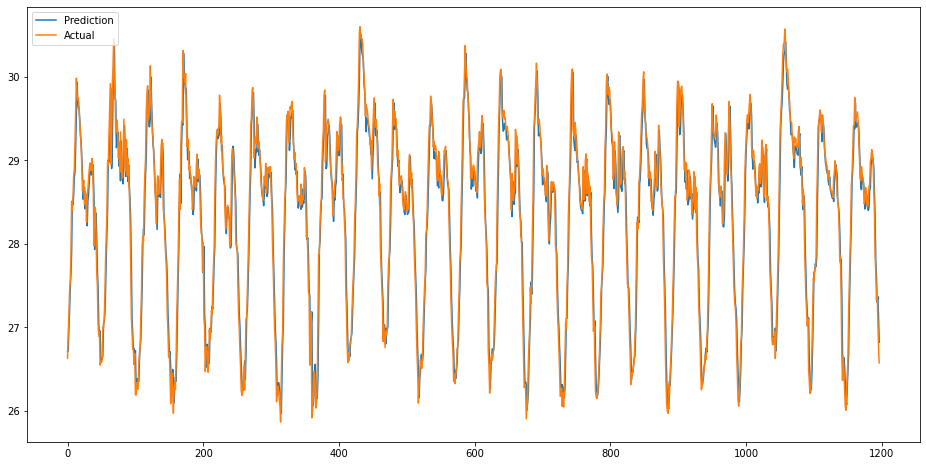

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model6.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 1s 17ms/step


,Train Predictions,Actuals
0,26.304358,26.632265
1,26.302896,26.929441
2,26.571039,27.136853
3,26.796028,27.430147
4,27.089006,27.557853
...,...,...
1192,27.023481,27.329412
1193,26.751223,27.402324
1194,26.861216,27.120941
1195,26.662071,26.780676


In [ ]:
test_predictions = model6.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 14ms/step


,Train Predictions,Actuals
0,29.397898,30.214529
1,29.573845,30.674529
2,29.959696,30.824618
3,30.073597,30.533147
4,29.728615,29.993765
...,...,...
332,28.883017,29.754206
333,29.168882,29.331500
334,28.716036,29.083529
335,28.379059,29.043529


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model6.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model6.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 14ms/step - loss: 0.4271 - root_mean_squared_error: 0.6535
root_mean_squared_error: 65.35%
R Squared Score on the train set is 0.7554
R Squared Score on the test set is 0.7478


In [ ]:
model7= Sequential()
model7.add(InputLayer((5,1)))
model7.add(LSTM(32,activation='relu',return_sequences=True))
model7.add(LSTM(64,activation='relu',return_sequences=True))
model7.add(LSTM(128,activation='relu',return_sequences=True))
model7.add(LSTM(128,activation='relu',return_sequences=True))
model7.add(LSTM(256,activation='selu',return_sequences=True))
model7.add(LSTM(512,activation='selu',return_sequences=False))
model7.add(Dropout(0.2))
model7.add(Dense(1,'linear'))
model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 5, 32)             4352      
                                                                 
 lstm_6 (LSTM)               (None, 5, 64)             24832     
                                                                 
 lstm_7 (LSTM)               (None, 5, 128)            98816     
                                                                 
 lstm_8 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_9 (LSTM)               (None, 5, 256)            394240    
                                                                 
 lstm_10 (LSTM)              (None, 512)               1574912   
                                                                 
 dropout_1 (Dropout)         (None, 512)              

In [ ]:
cp1 = ModelCheckpoint('model8/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model7.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=700, callbacks=[cp1])

Epoch 1/700
36/38 [===========================>..] - ETA: 0s - loss: 674.5764 - root_mean_squared_error: 25.9726

KeyboardInterrupt: ignored

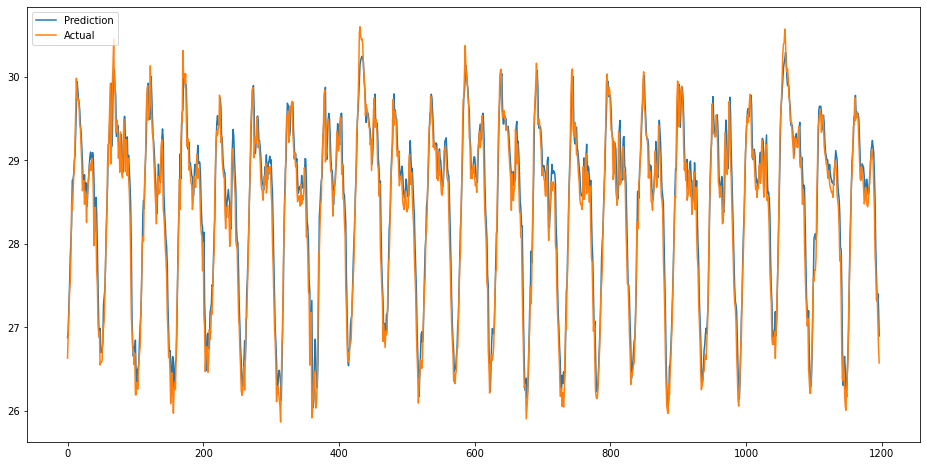

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
train_predictions = model7.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 3s 31ms/step


,Train Predictions,Actuals
0,26.571529,26.632265
1,26.687323,26.929441
2,26.936316,27.136853
3,27.165499,27.430147
4,27.483429,27.557853
...,...,...
1192,27.114271,27.329412
1193,26.853069,27.402324
1194,26.960232,27.120941
1195,26.879387,26.780676


In [ ]:
test_predictions = model7.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 20ms/step


,Train Predictions,Actuals
0,29.929792,30.214529
1,30.127625,30.674529
2,30.441502,30.824618
3,30.632866,30.533147
4,30.431665,29.993765
...,...,...
332,29.251986,29.754206
333,29.656002,29.331500
334,29.387947,29.083529
335,29.003201,29.043529


In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model7.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model7.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 19ms/step - loss: 0.0784 - root_mean_squared_error: 0.2800
root_mean_squared_error: 28.00%
R Squared Score on the train set is 0.9446
R Squared Score on the test set is 0.9420


In [ ]:
model8= Sequential()
model8.add(InputLayer((5,1)))
model8.add(GRU(32,activation='relu',return_sequences=True))
model8.add(GRU(64,activation='relu',return_sequences=True))
model8.add(LSTM(128,activation='relu',return_sequences=True))
model8.add(LSTM(128,activation='relu',return_sequences=True))
model8.add(LSTM(256,activation='selu',return_sequences=True))
model8.add(GRU(512,activation='selu',return_sequences=False))
model8.add(Dropout(0.2))
model8.add(Dense(1,'linear'))
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 32)             3360      
                                                                 
 gru_1 (GRU)                 (None, 5, 64)             18816     
                                                                 
 lstm (LSTM)                 (None, 5, 128)            98816     
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 5, 256)            394240    
                                                                 
 gru_2 (GRU)                 (None, 512)               1182720   
                                                                 
 dropout (Dropout)           (None, 512)               0

In [ ]:
cp1 = ModelCheckpoint('model8/', save_best_only=True)
model8.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model8.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=750, callbacks=[cp1])

Epoch 1/750
38/38 [==============================] - ETA: 0s - loss: 712.5773 - root_mean_squared_error: 26.6941

38/38 [==============================] - 28s 490ms/step - loss: 712.5773 - root_mean_squared_error: 26.6941 - val_loss: 364.0629 - val_root_mean_squared_error: 19.0804
Epoch 2/750
38/38 [==============================] - ETA: 0s - loss: 56.1008 - root_mean_squared_error: 7.4900

38/38 [==============================] - 17s 446ms/step - loss: 56.1008 - root_mean_squared_error: 7.4900 - val_loss: 4.6770 - val_root_mean_squared_error: 2.1626
Epoch 3/750
38/38 [==============================] - ETA: 0s - loss: 2.1655 - root_mean_squared_error: 1.4716

38/38 [==============================] - 18s 488ms/step - loss: 2.1655 - root_mean_squared_error: 1.4716 - val_loss: 0.9481 - val_root_mean_squared_error: 0.9737
Epoch 4/750
38/38 [==============================] - ETA: 0s - loss: 1.2493 - root_mean_squared_error: 1.1177

38/38 [==============================] - 17s 444ms/step - loss: 1.2493 - root_mean_squared_error: 1.1177 - val_loss: 0.7171 - val_root_mean_squared_error: 0.8468
Epoch 5/750
38/38 [==============================] - ETA: 0s - loss: 1.3076 - root_mean_squared_error: 1.1435

38/38 [==============================] - 16s 424ms/step - loss: 1.3076 - root_mean_squared_error: 1.1435 - val_loss: 0.7111 - val_root_mean_squared_error: 0.8432
Epoch 6/750
38/38 [==============================] - 6s 162ms/step - loss: 1.1067 - root_mean_squared_error: 1.0520 - val_loss: 0.7126 - val_root_mean_squared_error: 0.8441
Epoch 7/750
38/38 [==============================] - ETA: 0s - loss: 1.2230 - root_mean_squared_error: 1.1059

38/38 [==============================] - 15s 411ms/step - loss: 1.2230 - root_mean_squared_error: 1.1059 - val_loss: 0.7093 - val_root_mean_squared_error: 0.8422
Epoch 8/750
38/38 [==============================] - 4s 113ms/step - loss: 1.2510 - root_mean_squared_error: 1.1185 - val_loss: 0.7790 - val_root_mean_squared_error: 0.8826
Epoch 9/750
38/38 [==============================] - 5s 122ms/step - loss: 1.2516 - root_mean_squared_error: 1.1188 - val_loss: 0.7296 - val_root_mean_squared_error: 0.8542
Epoch 10/750
38/38 [==============================] - 6s 144ms/step - loss: 1.2360 - root_mean_squared_error: 1.1117 - val_loss: 0.7176 - val_root_mean_squared_error: 0.8471
Epoch 11/750
38/38 [==============================] - ETA: 0s - loss: 1.2351 - root_mean_squared_error: 1.1113

38/38 [==============================] - 15s 414ms/step - loss: 1.2351 - root_mean_squared_error: 1.1113 - val_loss: 0.7045 - val_root_mean_squared_error: 0.8393
Epoch 12/750
38/38 [==============================] - ETA: 0s - loss: 1.1969 - root_mean_squared_error: 1.0940

38/38 [==============================] - 16s 438ms/step - loss: 1.1969 - root_mean_squared_error: 1.0940 - val_loss: 0.7036 - val_root_mean_squared_error: 0.8388
Epoch 13/750
38/38 [==============================] - 4s 115ms/step - loss: 1.1389 - root_mean_squared_error: 1.0672 - val_loss: 0.7387 - val_root_mean_squared_error: 0.8594
Epoch 14/750
38/38 [==============================] - ETA: 0s - loss: 1.1870 - root_mean_squared_error: 1.0895

38/38 [==============================] - 17s 448ms/step - loss: 1.1870 - root_mean_squared_error: 1.0895 - val_loss: 0.7009 - val_root_mean_squared_error: 0.8372
Epoch 15/750
38/38 [==============================] - 5s 118ms/step - loss: 1.2166 - root_mean_squared_error: 1.1030 - val_loss: 0.7111 - val_root_mean_squared_error: 0.8433
Epoch 16/750
38/38 [==============================] - 4s 109ms/step - loss: 1.1652 - root_mean_squared_error: 1.0794 - val_loss: 0.7011 - val_root_mean_squared_error: 0.8373
Epoch 17/750
38/38 [==============================] - ETA: 0s - loss: 1.1701 - root_mean_squared_error: 1.0817

38/38 [==============================] - 15s 408ms/step - loss: 1.1701 - root_mean_squared_error: 1.0817 - val_loss: 0.6978 - val_root_mean_squared_error: 0.8353
Epoch 18/750
38/38 [==============================] - 6s 164ms/step - loss: 1.2310 - root_mean_squared_error: 1.1095 - val_loss: 0.7356 - val_root_mean_squared_error: 0.8577
Epoch 19/750
38/38 [==============================] - 4s 110ms/step - loss: 1.0676 - root_mean_squared_error: 1.0333 - val_loss: 0.8155 - val_root_mean_squared_error: 0.9030
Epoch 20/750
38/38 [==============================] - 4s 110ms/step - loss: 1.1998 - root_mean_squared_error: 1.0953 - val_loss: 0.7012 - val_root_mean_squared_error: 0.8374
Epoch 21/750
38/38 [==============================] - 6s 160ms/step - loss: 1.2060 - root_mean_squared_error: 1.0982 - val_loss: 0.7519 - val_root_mean_squared_error: 0.8671
Epoch 22/750
38/38 [==============================] - ETA: 0s - loss: 1.3183 - root_mean_squared_error: 1.1482

38/38 [==============================] - 16s 429ms/step - loss: 1.3183 - root_mean_squared_error: 1.1482 - val_loss: 0.6957 - val_root_mean_squared_error: 0.8341
Epoch 23/750
38/38 [==============================] - 4s 118ms/step - loss: 1.1815 - root_mean_squared_error: 1.0870 - val_loss: 0.7536 - val_root_mean_squared_error: 0.8681
Epoch 24/750
38/38 [==============================] - 5s 139ms/step - loss: 1.1425 - root_mean_squared_error: 1.0689 - val_loss: 0.7008 - val_root_mean_squared_error: 0.8372
Epoch 25/750
38/38 [==============================] - 5s 134ms/step - loss: 1.1954 - root_mean_squared_error: 1.0934 - val_loss: 0.7253 - val_root_mean_squared_error: 0.8516
Epoch 26/750
38/38 [==============================] - ETA: 0s - loss: 1.1896 - root_mean_squared_error: 1.0907

38/38 [==============================] - 16s 435ms/step - loss: 1.1896 - root_mean_squared_error: 1.0907 - val_loss: 0.6903 - val_root_mean_squared_error: 0.8309
Epoch 27/750
38/38 [==============================] - 4s 112ms/step - loss: 1.0970 - root_mean_squared_error: 1.0474 - val_loss: 0.7544 - val_root_mean_squared_error: 0.8686
Epoch 28/750
38/38 [==============================] - 6s 161ms/step - loss: 1.1434 - root_mean_squared_error: 1.0693 - val_loss: 0.8024 - val_root_mean_squared_error: 0.8958
Epoch 29/750
38/38 [==============================] - 4s 113ms/step - loss: 1.1441 - root_mean_squared_error: 1.0696 - val_loss: 0.7014 - val_root_mean_squared_error: 0.8375
Epoch 30/750
38/38 [==============================] - 4s 117ms/step - loss: 1.1590 - root_mean_squared_error: 1.0766 - val_loss: 0.7077 - val_root_mean_squared_error: 0.8412
Epoch 31/750
38/38 [==============================] - 6s 157ms/step - loss: 1.1792 - root_mean_squared_error: 1.0859 - val_loss: 0.6910 - val_

38/38 [==============================] - 16s 415ms/step - loss: 1.2295 - root_mean_squared_error: 1.1088 - val_loss: 0.6754 - val_root_mean_squared_error: 0.8218
Epoch 38/750
38/38 [==============================] - ETA: 0s - loss: 1.2028 - root_mean_squared_error: 1.0967

38/38 [==============================] - 17s 450ms/step - loss: 1.2028 - root_mean_squared_error: 1.0967 - val_loss: 0.6740 - val_root_mean_squared_error: 0.8210
Epoch 39/750
38/38 [==============================] - 4s 109ms/step - loss: 1.2044 - root_mean_squared_error: 1.0974 - val_loss: 0.7119 - val_root_mean_squared_error: 0.8437
Epoch 40/750
38/38 [==============================] - 4s 109ms/step - loss: 1.1463 - root_mean_squared_error: 1.0707 - val_loss: 0.7244 - val_root_mean_squared_error: 0.8511
Epoch 41/750
38/38 [==============================] - 6s 159ms/step - loss: 1.1337 - root_mean_squared_error: 1.0648 - val_loss: 0.7574 - val_root_mean_squared_error: 0.8703
Epoch 42/750
38/38 [==============================] - 4s 109ms/step - loss: 1.1904 - root_mean_squared_error: 1.0910 - val_loss: 1.0980 - val_root_mean_squared_error: 1.0478
Epoch 43/750
38/38 [==============================] - ETA: 0s - loss: 1.2116 - root_mean_squared_error: 1.1007

38/38 [==============================] - 15s 412ms/step - loss: 1.2116 - root_mean_squared_error: 1.1007 - val_loss: 0.6651 - val_root_mean_squared_error: 0.8156
Epoch 44/750
38/38 [==============================] - 4s 113ms/step - loss: 1.2053 - root_mean_squared_error: 1.0979 - val_loss: 0.7174 - val_root_mean_squared_error: 0.8470
Epoch 45/750
38/38 [==============================] - 6s 153ms/step - loss: 1.1357 - root_mean_squared_error: 1.0657 - val_loss: 0.7214 - val_root_mean_squared_error: 0.8493
Epoch 46/750
38/38 [==============================] - 4s 112ms/step - loss: 1.4611 - root_mean_squared_error: 1.2088 - val_loss: 0.8049 - val_root_mean_squared_error: 0.8972
Epoch 47/750
38/38 [==============================] - 4s 117ms/step - loss: 1.1132 - root_mean_squared_error: 1.0551 - val_loss: 0.7678 - val_root_mean_squared_error: 0.8763
Epoch 48/750
38/38 [==============================] - 6s 155ms/step - loss: 1.1356 - root_mean_squared_error: 1.0656 - val_loss: 0.7418 - val_

38/38 [==============================] - 16s 422ms/step - loss: 1.1235 - root_mean_squared_error: 1.0600 - val_loss: 0.6551 - val_root_mean_squared_error: 0.8094
Epoch 52/750
38/38 [==============================] - 5s 129ms/step - loss: 1.1561 - root_mean_squared_error: 1.0752 - val_loss: 0.7360 - val_root_mean_squared_error: 0.8579
Epoch 53/750
38/38 [==============================] - 4s 116ms/step - loss: 1.0734 - root_mean_squared_error: 1.0360 - val_loss: 0.7403 - val_root_mean_squared_error: 0.8604
Epoch 54/750
38/38 [==============================] - 5s 146ms/step - loss: 1.0702 - root_mean_squared_error: 1.0345 - val_loss: 0.7263 - val_root_mean_squared_error: 0.8522
Epoch 55/750
38/38 [==============================] - ETA: 0s - loss: 1.1601 - root_mean_squared_error: 1.0771

38/38 [==============================] - 16s 435ms/step - loss: 1.1601 - root_mean_squared_error: 1.0771 - val_loss: 0.6518 - val_root_mean_squared_error: 0.8073
Epoch 56/750
38/38 [==============================] - ETA: 0s - loss: 1.0943 - root_mean_squared_error: 1.0461

38/38 [==============================] - 15s 413ms/step - loss: 1.0943 - root_mean_squared_error: 1.0461 - val_loss: 0.6412 - val_root_mean_squared_error: 0.8008
Epoch 57/750
38/38 [==============================] - 4s 110ms/step - loss: 1.1191 - root_mean_squared_error: 1.0579 - val_loss: 0.6570 - val_root_mean_squared_error: 0.8105
Epoch 58/750
38/38 [==============================] - 5s 127ms/step - loss: 1.0456 - root_mean_squared_error: 1.0225 - val_loss: 0.6845 - val_root_mean_squared_error: 0.8273
Epoch 59/750
38/38 [==============================] - 5s 136ms/step - loss: 1.0548 - root_mean_squared_error: 1.0270 - val_loss: 0.6606 - val_root_mean_squared_error: 0.8128
Epoch 60/750
38/38 [==============================] - ETA: 0s - loss: 1.0598 - root_mean_squared_error: 1.0295

38/38 [==============================] - 15s 406ms/step - loss: 1.0598 - root_mean_squared_error: 1.0295 - val_loss: 0.6345 - val_root_mean_squared_error: 0.7966
Epoch 61/750
38/38 [==============================] - 4s 110ms/step - loss: 0.9914 - root_mean_squared_error: 0.9957 - val_loss: 0.6357 - val_root_mean_squared_error: 0.7973
Epoch 62/750
38/38 [==============================] - 6s 150ms/step - loss: 1.0838 - root_mean_squared_error: 1.0410 - val_loss: 0.6389 - val_root_mean_squared_error: 0.7993
Epoch 63/750
38/38 [==============================] - 4s 116ms/step - loss: 1.1549 - root_mean_squared_error: 1.0747 - val_loss: 0.6737 - val_root_mean_squared_error: 0.8208
Epoch 64/750
38/38 [==============================] - ETA: 0s - loss: 1.2959 - root_mean_squared_error: 1.1384

38/38 [==============================] - 14s 385ms/step - loss: 1.2959 - root_mean_squared_error: 1.1384 - val_loss: 0.6260 - val_root_mean_squared_error: 0.7912
Epoch 65/750
38/38 [==============================] - 4s 111ms/step - loss: 1.0543 - root_mean_squared_error: 1.0268 - val_loss: 0.8157 - val_root_mean_squared_error: 0.9031
Epoch 66/750
38/38 [==============================] - 6s 157ms/step - loss: 1.0577 - root_mean_squared_error: 1.0285 - val_loss: 0.6410 - val_root_mean_squared_error: 0.8007
Epoch 67/750
38/38 [==============================] - 4s 108ms/step - loss: 0.9848 - root_mean_squared_error: 0.9924 - val_loss: 0.6477 - val_root_mean_squared_error: 0.8048
Epoch 68/750
38/38 [==============================] - 4s 109ms/step - loss: 1.0976 - root_mean_squared_error: 1.0477 - val_loss: 0.7198 - val_root_mean_squared_error: 0.8484
Epoch 69/750
38/38 [==============================] - 6s 152ms/step - loss: 1.1025 - root_mean_squared_error: 1.0500 - val_loss: 0.6336 - val_

38/38 [==============================] - 18s 473ms/step - loss: 1.0655 - root_mean_squared_error: 1.0322 - val_loss: 0.6153 - val_root_mean_squared_error: 0.7844
Epoch 75/750
38/38 [==============================] - ETA: 0s - loss: 1.0205 - root_mean_squared_error: 1.0102

38/38 [==============================] - 16s 424ms/step - loss: 1.0205 - root_mean_squared_error: 1.0102 - val_loss: 0.6099 - val_root_mean_squared_error: 0.7810
Epoch 76/750
38/38 [==============================] - 6s 162ms/step - loss: 1.0107 - root_mean_squared_error: 1.0053 - val_loss: 1.4250 - val_root_mean_squared_error: 1.1937
Epoch 77/750
38/38 [==============================] - 4s 112ms/step - loss: 1.1702 - root_mean_squared_error: 1.0817 - val_loss: 0.6670 - val_root_mean_squared_error: 0.8167
Epoch 78/750
38/38 [==============================] - 4s 114ms/step - loss: 1.0817 - root_mean_squared_error: 1.0400 - val_loss: 0.7037 - val_root_mean_squared_error: 0.8389
Epoch 79/750
38/38 [==============================] - 6s 166ms/step - loss: 1.0578 - root_mean_squared_error: 1.0285 - val_loss: 1.0044 - val_root_mean_squared_error: 1.0022
Epoch 80/750
38/38 [==============================] - 4s 113ms/step - loss: 1.1079 - root_mean_squared_error: 1.0525 - val_loss: 0.6520 - val_

38/38 [==============================] - 15s 395ms/step - loss: 1.1784 - root_mean_squared_error: 1.0855 - val_loss: 0.5974 - val_root_mean_squared_error: 0.7729
Epoch 82/750
38/38 [==============================] - 5s 121ms/step - loss: 1.0326 - root_mean_squared_error: 1.0162 - val_loss: 0.6307 - val_root_mean_squared_error: 0.7942
Epoch 83/750
38/38 [==============================] - 6s 146ms/step - loss: 1.0211 - root_mean_squared_error: 1.0105 - val_loss: 1.0305 - val_root_mean_squared_error: 1.0151
Epoch 84/750
38/38 [==============================] - 4s 114ms/step - loss: 1.0221 - root_mean_squared_error: 1.0110 - val_loss: 0.6281 - val_root_mean_squared_error: 0.7925
Epoch 85/750
38/38 [==============================] - 5s 125ms/step - loss: 1.0734 - root_mean_squared_error: 1.0360 - val_loss: 0.9563 - val_root_mean_squared_error: 0.9779
Epoch 86/750
38/38 [==============================] - ETA: 0s - loss: 1.0030 - root_mean_squared_error: 1.0015

38/38 [==============================] - 17s 456ms/step - loss: 1.0030 - root_mean_squared_error: 1.0015 - val_loss: 0.5515 - val_root_mean_squared_error: 0.7426
Epoch 87/750
38/38 [==============================] - 4s 109ms/step - loss: 1.1279 - root_mean_squared_error: 1.0620 - val_loss: 0.5943 - val_root_mean_squared_error: 0.7709
Epoch 88/750
38/38 [==============================] - 4s 108ms/step - loss: 1.1599 - root_mean_squared_error: 1.0770 - val_loss: 1.7902 - val_root_mean_squared_error: 1.3380
Epoch 89/750
38/38 [==============================] - 6s 167ms/step - loss: 1.0285 - root_mean_squared_error: 1.0141 - val_loss: 0.6246 - val_root_mean_squared_error: 0.7903
Epoch 90/750
38/38 [==============================] - 5s 114ms/step - loss: 0.9463 - root_mean_squared_error: 0.9728 - val_loss: 0.6655 - val_root_mean_squared_error: 0.8158
Epoch 91/750
38/38 [==============================] - ETA: 0s - loss: 1.0146 - root_mean_squared_error: 1.0073

38/38 [==============================] - 16s 416ms/step - loss: 1.0146 - root_mean_squared_error: 1.0073 - val_loss: 0.5289 - val_root_mean_squared_error: 0.7273
Epoch 92/750
38/38 [==============================] - 4s 115ms/step - loss: 0.9865 - root_mean_squared_error: 0.9932 - val_loss: 0.6472 - val_root_mean_squared_error: 0.8045
Epoch 93/750
38/38 [==============================] - 6s 152ms/step - loss: 1.1175 - root_mean_squared_error: 1.0571 - val_loss: 0.6599 - val_root_mean_squared_error: 0.8123
Epoch 94/750
38/38 [==============================] - ETA: 0s - loss: 0.9078 - root_mean_squared_error: 0.9528

38/38 [==============================] - 15s 392ms/step - loss: 0.9078 - root_mean_squared_error: 0.9528 - val_loss: 0.5232 - val_root_mean_squared_error: 0.7233
Epoch 95/750
38/38 [==============================] - ETA: 0s - loss: 0.8938 - root_mean_squared_error: 0.9454

38/38 [==============================] - 16s 423ms/step - loss: 0.8938 - root_mean_squared_error: 0.9454 - val_loss: 0.4849 - val_root_mean_squared_error: 0.6963
Epoch 96/750
38/38 [==============================] - ETA: 0s - loss: 0.9712 - root_mean_squared_error: 0.9855

38/38 [==============================] - 16s 418ms/step - loss: 0.9712 - root_mean_squared_error: 0.9855 - val_loss: 0.4667 - val_root_mean_squared_error: 0.6831
Epoch 97/750
38/38 [==============================] - 4s 118ms/step - loss: 0.8482 - root_mean_squared_error: 0.9210 - val_loss: 0.5870 - val_root_mean_squared_error: 0.7662
Epoch 98/750
38/38 [==============================] - ETA: 0s - loss: 0.8690 - root_mean_squared_error: 0.9322

38/38 [==============================] - 17s 452ms/step - loss: 0.8690 - root_mean_squared_error: 0.9322 - val_loss: 0.4422 - val_root_mean_squared_error: 0.6650
Epoch 99/750
38/38 [==============================] - 5s 119ms/step - loss: 0.8994 - root_mean_squared_error: 0.9484 - val_loss: 0.4564 - val_root_mean_squared_error: 0.6756
Epoch 100/750
38/38 [==============================] - ETA: 0s - loss: 0.9757 - root_mean_squared_error: 0.9878

38/38 [==============================] - 16s 426ms/step - loss: 0.9757 - root_mean_squared_error: 0.9878 - val_loss: 0.4070 - val_root_mean_squared_error: 0.6379
Epoch 101/750
38/38 [==============================] - ETA: 0s - loss: 0.8350 - root_mean_squared_error: 0.9138

38/38 [==============================] - 15s 395ms/step - loss: 0.8350 - root_mean_squared_error: 0.9138 - val_loss: 0.3918 - val_root_mean_squared_error: 0.6260
Epoch 102/750
38/38 [==============================] - 5s 136ms/step - loss: 0.9292 - root_mean_squared_error: 0.9640 - val_loss: 0.4166 - val_root_mean_squared_error: 0.6455
Epoch 103/750
38/38 [==============================] - 5s 133ms/step - loss: 0.8176 - root_mean_squared_error: 0.9042 - val_loss: 0.3992 - val_root_mean_squared_error: 0.6318
Epoch 104/750
38/38 [==============================] - ETA: 0s - loss: 1.0108 - root_mean_squared_error: 1.0054

38/38 [==============================] - 16s 427ms/step - loss: 1.0108 - root_mean_squared_error: 1.0054 - val_loss: 0.3528 - val_root_mean_squared_error: 0.5940
Epoch 105/750
38/38 [==============================] - 4s 112ms/step - loss: 0.7396 - root_mean_squared_error: 0.8600 - val_loss: 0.4681 - val_root_mean_squared_error: 0.6841
Epoch 106/750
38/38 [==============================] - ETA: 0s - loss: 0.8587 - root_mean_squared_error: 0.9267

38/38 [==============================] - 17s 457ms/step - loss: 0.8587 - root_mean_squared_error: 0.9267 - val_loss: 0.3196 - val_root_mean_squared_error: 0.5653
Epoch 107/750
38/38 [==============================] - 5s 137ms/step - loss: 0.8790 - root_mean_squared_error: 0.9376 - val_loss: 0.4027 - val_root_mean_squared_error: 0.6346
Epoch 108/750
38/38 [==============================] - 4s 116ms/step - loss: 0.8283 - root_mean_squared_error: 0.9101 - val_loss: 0.6205 - val_root_mean_squared_error: 0.7877
Epoch 109/750
38/38 [==============================] - ETA: 0s - loss: 0.7916 - root_mean_squared_error: 0.8897

38/38 [==============================] - 16s 431ms/step - loss: 0.7916 - root_mean_squared_error: 0.8897 - val_loss: 0.3169 - val_root_mean_squared_error: 0.5629
Epoch 110/750
38/38 [==============================] - ETA: 0s - loss: 0.8344 - root_mean_squared_error: 0.9134

38/38 [==============================] - 16s 425ms/step - loss: 0.8344 - root_mean_squared_error: 0.9134 - val_loss: 0.3136 - val_root_mean_squared_error: 0.5600
Epoch 111/750
38/38 [==============================] - ETA: 0s - loss: 0.7252 - root_mean_squared_error: 0.8516

38/38 [==============================] - 18s 477ms/step - loss: 0.7252 - root_mean_squared_error: 0.8516 - val_loss: 0.2528 - val_root_mean_squared_error: 0.5028
Epoch 112/750
38/38 [==============================] - 4s 117ms/step - loss: 0.7043 - root_mean_squared_error: 0.8392 - val_loss: 0.2855 - val_root_mean_squared_error: 0.5343
Epoch 113/750
38/38 [==============================] - ETA: 0s - loss: 0.7435 - root_mean_squared_error: 0.8623

38/38 [==============================] - 16s 426ms/step - loss: 0.7435 - root_mean_squared_error: 0.8623 - val_loss: 0.2370 - val_root_mean_squared_error: 0.4868
Epoch 114/750
38/38 [==============================] - 5s 135ms/step - loss: 0.6862 - root_mean_squared_error: 0.8284 - val_loss: 0.3312 - val_root_mean_squared_error: 0.5755
Epoch 115/750
38/38 [==============================] - ETA: 0s - loss: 0.6280 - root_mean_squared_error: 0.7925

38/38 [==============================] - 16s 427ms/step - loss: 0.6280 - root_mean_squared_error: 0.7925 - val_loss: 0.1973 - val_root_mean_squared_error: 0.4441
Epoch 116/750
38/38 [==============================] - 4s 113ms/step - loss: 0.7435 - root_mean_squared_error: 0.8622 - val_loss: 0.3491 - val_root_mean_squared_error: 0.5909
Epoch 117/750
38/38 [==============================] - ETA: 0s - loss: 0.8057 - root_mean_squared_error: 0.8976

38/38 [==============================] - 16s 423ms/step - loss: 0.8057 - root_mean_squared_error: 0.8976 - val_loss: 0.1962 - val_root_mean_squared_error: 0.4430
Epoch 118/750
38/38 [==============================] - 4s 110ms/step - loss: 0.7097 - root_mean_squared_error: 0.8424 - val_loss: 0.2204 - val_root_mean_squared_error: 0.4695
Epoch 119/750
38/38 [==============================] - 6s 164ms/step - loss: 0.7268 - root_mean_squared_error: 0.8525 - val_loss: 0.1983 - val_root_mean_squared_error: 0.4453
Epoch 120/750
38/38 [==============================] - 4s 109ms/step - loss: 0.9641 - root_mean_squared_error: 0.9819 - val_loss: 0.2465 - val_root_mean_squared_error: 0.4965
Epoch 121/750
38/38 [==============================] - 4s 109ms/step - loss: 0.7436 - root_mean_squared_error: 0.8623 - val_loss: 0.3602 - val_root_mean_squared_error: 0.6002
Epoch 122/750
38/38 [==============================] - 6s 159ms/step - loss: 0.7135 - root_mean_squared_error: 0.8447 - val_loss: 0.4532 -

38/38 [==============================] - 15s 413ms/step - loss: 0.7687 - root_mean_squared_error: 0.8767 - val_loss: 0.1961 - val_root_mean_squared_error: 0.4429
Epoch 127/750
38/38 [==============================] - ETA: 0s - loss: 0.7197 - root_mean_squared_error: 0.8483

38/38 [==============================] - 16s 419ms/step - loss: 0.7197 - root_mean_squared_error: 0.8483 - val_loss: 0.1726 - val_root_mean_squared_error: 0.4154
Epoch 128/750
38/38 [==============================] - ETA: 0s - loss: 0.6892 - root_mean_squared_error: 0.8302

38/38 [==============================] - 15s 397ms/step - loss: 0.6892 - root_mean_squared_error: 0.8302 - val_loss: 0.1581 - val_root_mean_squared_error: 0.3976
Epoch 129/750
38/38 [==============================] - 4s 112ms/step - loss: 0.6449 - root_mean_squared_error: 0.8031 - val_loss: 0.8192 - val_root_mean_squared_error: 0.9051
Epoch 130/750
38/38 [==============================] - 6s 161ms/step - loss: 0.6796 - root_mean_squared_error: 0.8244 - val_loss: 0.1635 - val_root_mean_squared_error: 0.4044
Epoch 131/750
38/38 [==============================] - 4s 112ms/step - loss: 0.6515 - root_mean_squared_error: 0.8071 - val_loss: 0.1597 - val_root_mean_squared_error: 0.3996
Epoch 132/750
38/38 [==============================] - ETA: 0s - loss: 0.6530 - root_mean_squared_error: 0.8081

38/38 [==============================] - 16s 422ms/step - loss: 0.6530 - root_mean_squared_error: 0.8081 - val_loss: 0.1525 - val_root_mean_squared_error: 0.3905
Epoch 133/750
38/38 [==============================] - 6s 147ms/step - loss: 0.6326 - root_mean_squared_error: 0.7954 - val_loss: 0.1914 - val_root_mean_squared_error: 0.4375
Epoch 134/750
38/38 [==============================] - ETA: 0s - loss: 0.6285 - root_mean_squared_error: 0.7928

38/38 [==============================] - 16s 433ms/step - loss: 0.6285 - root_mean_squared_error: 0.7928 - val_loss: 0.1358 - val_root_mean_squared_error: 0.3686
Epoch 135/750
38/38 [==============================] - 4s 112ms/step - loss: 0.7080 - root_mean_squared_error: 0.8414 - val_loss: 0.2564 - val_root_mean_squared_error: 0.5063
Epoch 136/750
38/38 [==============================] - 4s 112ms/step - loss: 0.7366 - root_mean_squared_error: 0.8582 - val_loss: 0.3337 - val_root_mean_squared_error: 0.5776
Epoch 137/750
38/38 [==============================] - ETA: 0s - loss: 0.6980 - root_mean_squared_error: 0.8355

38/38 [==============================] - 17s 460ms/step - loss: 0.6980 - root_mean_squared_error: 0.8355 - val_loss: 0.1320 - val_root_mean_squared_error: 0.3633
Epoch 138/750
38/38 [==============================] - 5s 128ms/step - loss: 0.5997 - root_mean_squared_error: 0.7744 - val_loss: 0.2465 - val_root_mean_squared_error: 0.4965
Epoch 139/750
38/38 [==============================] - ETA: 0s - loss: 0.7951 - root_mean_squared_error: 0.8917

38/38 [==============================] - 15s 393ms/step - loss: 0.7951 - root_mean_squared_error: 0.8917 - val_loss: 0.1319 - val_root_mean_squared_error: 0.3632
Epoch 140/750
38/38 [==============================] - ETA: 0s - loss: 0.5703 - root_mean_squared_error: 0.7552

38/38 [==============================] - 16s 427ms/step - loss: 0.5703 - root_mean_squared_error: 0.7552 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3544
Epoch 141/750
38/38 [==============================] - 5s 119ms/step - loss: 0.6971 - root_mean_squared_error: 0.8349 - val_loss: 0.4918 - val_root_mean_squared_error: 0.7013
Epoch 142/750
38/38 [==============================] - 6s 148ms/step - loss: 0.6461 - root_mean_squared_error: 0.8038 - val_loss: 0.1442 - val_root_mean_squared_error: 0.3797
Epoch 143/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6658 - root_mean_squared_error: 0.8160 - val_loss: 0.1641 - val_root_mean_squared_error: 0.4051
Epoch 144/750
38/38 [==============================] - 5s 120ms/step - loss: 0.6723 - root_mean_squared_error: 0.8200 - val_loss: 0.3443 - val_root_mean_squared_error: 0.5867
Epoch 145/750
38/38 [==============================] - 6s 147ms/step - loss: 0.6411 - root_mean_squared_error: 0.8007 - val_loss: 0.2134 -

38/38 [==============================] - 15s 409ms/step - loss: 0.5952 - root_mean_squared_error: 0.7715 - val_loss: 0.1198 - val_root_mean_squared_error: 0.3461
Epoch 148/750
38/38 [==============================] - 6s 149ms/step - loss: 0.7164 - root_mean_squared_error: 0.8464 - val_loss: 0.8476 - val_root_mean_squared_error: 0.9207
Epoch 149/750
38/38 [==============================] - 5s 120ms/step - loss: 0.6876 - root_mean_squared_error: 0.8292 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3508
Epoch 150/750
38/38 [==============================] - 4s 116ms/step - loss: 0.5894 - root_mean_squared_error: 0.7677 - val_loss: 0.1233 - val_root_mean_squared_error: 0.3512
Epoch 151/750
38/38 [==============================] - 6s 154ms/step - loss: 0.5985 - root_mean_squared_error: 0.7737 - val_loss: 0.1402 - val_root_mean_squared_error: 0.3744
Epoch 152/750
38/38 [==============================] - ETA: 0s - loss: 0.6404 - root_mean_squared_error: 0.8003

38/38 [==============================] - 15s 396ms/step - loss: 0.6404 - root_mean_squared_error: 0.8003 - val_loss: 0.1156 - val_root_mean_squared_error: 0.3399
Epoch 153/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6138 - root_mean_squared_error: 0.7835 - val_loss: 0.1512 - val_root_mean_squared_error: 0.3888
Epoch 154/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6262 - root_mean_squared_error: 0.7913 - val_loss: 0.1398 - val_root_mean_squared_error: 0.3738
Epoch 155/750
38/38 [==============================] - 6s 163ms/step - loss: 0.6460 - root_mean_squared_error: 0.8037 - val_loss: 0.2329 - val_root_mean_squared_error: 0.4826
Epoch 156/750
38/38 [==============================] - 4s 109ms/step - loss: 0.6499 - root_mean_squared_error: 0.8062 - val_loss: 0.1216 - val_root_mean_squared_error: 0.3487
Epoch 157/750
38/38 [==============================] - 4s 113ms/step - loss: 0.6289 - root_mean_squared_error: 0.7931 - val_loss: 0.1326 -

38/38 [==============================] - 16s 425ms/step - loss: 0.6824 - root_mean_squared_error: 0.8261 - val_loss: 0.1116 - val_root_mean_squared_error: 0.3341
Epoch 160/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6277 - root_mean_squared_error: 0.7923 - val_loss: 0.1553 - val_root_mean_squared_error: 0.3941
Epoch 161/750
38/38 [==============================] - 5s 131ms/step - loss: 0.6412 - root_mean_squared_error: 0.8008 - val_loss: 0.1135 - val_root_mean_squared_error: 0.3369
Epoch 162/750
38/38 [==============================] - 5s 137ms/step - loss: 0.6975 - root_mean_squared_error: 0.8352 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3543
Epoch 163/750
38/38 [==============================] - 4s 114ms/step - loss: 0.5860 - root_mean_squared_error: 0.7655 - val_loss: 0.1440 - val_root_mean_squared_error: 0.3795
Epoch 164/750
38/38 [==============================] - 5s 137ms/step - loss: 0.6503 - root_mean_squared_error: 0.8064 - val_loss: 0.4336 -

38/38 [==============================] - 16s 423ms/step - loss: 0.6259 - root_mean_squared_error: 0.7911 - val_loss: 0.1112 - val_root_mean_squared_error: 0.3335
Epoch 180/750
38/38 [==============================] - 6s 160ms/step - loss: 0.6600 - root_mean_squared_error: 0.8124 - val_loss: 0.5793 - val_root_mean_squared_error: 0.7611
Epoch 181/750
38/38 [==============================] - 4s 111ms/step - loss: 0.7031 - root_mean_squared_error: 0.8385 - val_loss: 0.2959 - val_root_mean_squared_error: 0.5440
Epoch 182/750
38/38 [==============================] - 4s 110ms/step - loss: 0.7095 - root_mean_squared_error: 0.8423 - val_loss: 0.9601 - val_root_mean_squared_error: 0.9798
Epoch 183/750
38/38 [==============================] - 6s 162ms/step - loss: 0.7006 - root_mean_squared_error: 0.8370 - val_loss: 0.2746 - val_root_mean_squared_error: 0.5240
Epoch 184/750
38/38 [==============================] - ETA: 0s - loss: 0.6021 - root_mean_squared_error: 0.7760

38/38 [==============================] - 15s 415ms/step - loss: 0.6021 - root_mean_squared_error: 0.7760 - val_loss: 0.1089 - val_root_mean_squared_error: 0.3300
Epoch 185/750
38/38 [==============================] - 4s 112ms/step - loss: 0.6439 - root_mean_squared_error: 0.8025 - val_loss: 0.1159 - val_root_mean_squared_error: 0.3405
Epoch 186/750
38/38 [==============================] - 5s 139ms/step - loss: 0.5821 - root_mean_squared_error: 0.7629 - val_loss: 0.1515 - val_root_mean_squared_error: 0.3893
Epoch 187/750
38/38 [==============================] - 5s 134ms/step - loss: 0.5866 - root_mean_squared_error: 0.7659 - val_loss: 0.1169 - val_root_mean_squared_error: 0.3419
Epoch 188/750
38/38 [==============================] - 4s 116ms/step - loss: 0.5635 - root_mean_squared_error: 0.7507 - val_loss: 0.1231 - val_root_mean_squared_error: 0.3508
Epoch 189/750
38/38 [==============================] - 6s 150ms/step - loss: 0.6056 - root_mean_squared_error: 0.7782 - val_loss: 0.2240 -

38/38 [==============================] - 16s 424ms/step - loss: 0.6378 - root_mean_squared_error: 0.7986 - val_loss: 0.1015 - val_root_mean_squared_error: 0.3186
Epoch 194/750
38/38 [==============================] - 4s 111ms/step - loss: 0.8003 - root_mean_squared_error: 0.8946 - val_loss: 0.1081 - val_root_mean_squared_error: 0.3288
Epoch 195/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6166 - root_mean_squared_error: 0.7852 - val_loss: 0.1052 - val_root_mean_squared_error: 0.3243
Epoch 196/750
38/38 [==============================] - ETA: 0s - loss: 0.5333 - root_mean_squared_error: 0.7302

38/38 [==============================] - 16s 425ms/step - loss: 0.5333 - root_mean_squared_error: 0.7302 - val_loss: 0.0960 - val_root_mean_squared_error: 0.3098
Epoch 197/750
38/38 [==============================] - 5s 140ms/step - loss: 0.5565 - root_mean_squared_error: 0.7460 - val_loss: 0.2279 - val_root_mean_squared_error: 0.4773
Epoch 198/750
38/38 [==============================] - ETA: 0s - loss: 0.5851 - root_mean_squared_error: 0.7649

38/38 [==============================] - 16s 425ms/step - loss: 0.5851 - root_mean_squared_error: 0.7649 - val_loss: 0.0919 - val_root_mean_squared_error: 0.3031
Epoch 199/750
38/38 [==============================] - 4s 109ms/step - loss: 0.6376 - root_mean_squared_error: 0.7985 - val_loss: 0.2258 - val_root_mean_squared_error: 0.4752
Epoch 200/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5963 - root_mean_squared_error: 0.7722 - val_loss: 0.4867 - val_root_mean_squared_error: 0.6977
Epoch 201/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5768 - root_mean_squared_error: 0.7595 - val_loss: 0.0978 - val_root_mean_squared_error: 0.3128
Epoch 202/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5724 - root_mean_squared_error: 0.7566 - val_loss: 0.1179 - val_root_mean_squared_error: 0.3434
Epoch 203/750
38/38 [==============================] - 6s 162ms/step - loss: 0.5459 - root_mean_squared_error: 0.7389 - val_loss: 0.2946 -

38/38 [==============================] - 15s 409ms/step - loss: 0.5975 - root_mean_squared_error: 0.7730 - val_loss: 0.0879 - val_root_mean_squared_error: 0.2965
Epoch 212/750
38/38 [==============================] - 4s 109ms/step - loss: 0.6171 - root_mean_squared_error: 0.7855 - val_loss: 0.0903 - val_root_mean_squared_error: 0.3005
Epoch 213/750
38/38 [==============================] - 6s 158ms/step - loss: 0.5656 - root_mean_squared_error: 0.7521 - val_loss: 0.1464 - val_root_mean_squared_error: 0.3826
Epoch 214/750
38/38 [==============================] - 4s 110ms/step - loss: 0.6084 - root_mean_squared_error: 0.7800 - val_loss: 0.1047 - val_root_mean_squared_error: 0.3236
Epoch 215/750
38/38 [==============================] - ETA: 0s - loss: 0.5667 - root_mean_squared_error: 0.7528

38/38 [==============================] - 14s 388ms/step - loss: 0.5667 - root_mean_squared_error: 0.7528 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2876
Epoch 216/750
38/38 [==============================] - 5s 120ms/step - loss: 0.6039 - root_mean_squared_error: 0.7771 - val_loss: 0.1157 - val_root_mean_squared_error: 0.3401
Epoch 217/750
38/38 [==============================] - 6s 145ms/step - loss: 0.5999 - root_mean_squared_error: 0.7745 - val_loss: 0.1986 - val_root_mean_squared_error: 0.4457
Epoch 218/750
38/38 [==============================] - ETA: 0s - loss: 0.5808 - root_mean_squared_error: 0.7621

38/38 [==============================] - 16s 424ms/step - loss: 0.5808 - root_mean_squared_error: 0.7621 - val_loss: 0.0814 - val_root_mean_squared_error: 0.2853
Epoch 219/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5757 - root_mean_squared_error: 0.7587 - val_loss: 0.0834 - val_root_mean_squared_error: 0.2887
Epoch 220/750
38/38 [==============================] - 6s 156ms/step - loss: 0.5794 - root_mean_squared_error: 0.7612 - val_loss: 0.1256 - val_root_mean_squared_error: 0.3544
Epoch 221/750
38/38 [==============================] - 4s 108ms/step - loss: 0.5216 - root_mean_squared_error: 0.7222 - val_loss: 0.1748 - val_root_mean_squared_error: 0.4181
Epoch 222/750
38/38 [==============================] - 4s 113ms/step - loss: 0.5643 - root_mean_squared_error: 0.7512 - val_loss: 0.2286 - val_root_mean_squared_error: 0.4781
Epoch 223/750
38/38 [==============================] - 6s 158ms/step - loss: 0.6194 - root_mean_squared_error: 0.7870 - val_loss: 0.2895 -

38/38 [==============================] - 15s 412ms/step - loss: 0.5434 - root_mean_squared_error: 0.7371 - val_loss: 0.0784 - val_root_mean_squared_error: 0.2800
Epoch 228/750
38/38 [==============================] - 4s 114ms/step - loss: 0.5693 - root_mean_squared_error: 0.7545 - val_loss: 0.0958 - val_root_mean_squared_error: 0.3095
Epoch 229/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5837 - root_mean_squared_error: 0.7640 - val_loss: 0.0865 - val_root_mean_squared_error: 0.2942
Epoch 230/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5957 - root_mean_squared_error: 0.7718 - val_loss: 0.2676 - val_root_mean_squared_error: 0.5173
Epoch 231/750
38/38 [==============================] - 4s 113ms/step - loss: 0.5143 - root_mean_squared_error: 0.7171 - val_loss: 0.0851 - val_root_mean_squared_error: 0.2918
Epoch 232/750
38/38 [==============================] - ETA: 0s - loss: 0.5190 - root_mean_squared_error: 0.7205

38/38 [==============================] - 15s 405ms/step - loss: 0.5190 - root_mean_squared_error: 0.7205 - val_loss: 0.0748 - val_root_mean_squared_error: 0.2735
Epoch 233/750
38/38 [==============================] - 5s 138ms/step - loss: 0.5830 - root_mean_squared_error: 0.7635 - val_loss: 0.0768 - val_root_mean_squared_error: 0.2771
Epoch 234/750
38/38 [==============================] - 5s 131ms/step - loss: 0.6871 - root_mean_squared_error: 0.8289 - val_loss: 0.1559 - val_root_mean_squared_error: 0.3948
Epoch 235/750
38/38 [==============================] - 4s 111ms/step - loss: 0.7732 - root_mean_squared_error: 0.8793 - val_loss: 0.1575 - val_root_mean_squared_error: 0.3968
Epoch 236/750
38/38 [==============================] - 5s 142ms/step - loss: 0.5224 - root_mean_squared_error: 0.7227 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2876
Epoch 237/750
38/38 [==============================] - 5s 126ms/step - loss: 0.5315 - root_mean_squared_error: 0.7290 - val_loss: 0.1441 -

38/38 [==============================] - 15s 410ms/step - loss: 0.5427 - root_mean_squared_error: 0.7367 - val_loss: 0.0746 - val_root_mean_squared_error: 0.2731
Epoch 259/750
38/38 [==============================] - 5s 131ms/step - loss: 0.5859 - root_mean_squared_error: 0.7655 - val_loss: 0.0777 - val_root_mean_squared_error: 0.2788
Epoch 260/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5275 - root_mean_squared_error: 0.7263 - val_loss: 0.0960 - val_root_mean_squared_error: 0.3098
Epoch 261/750
38/38 [==============================] - 5s 137ms/step - loss: 0.6304 - root_mean_squared_error: 0.7940 - val_loss: 0.0792 - val_root_mean_squared_error: 0.2815
Epoch 262/750
38/38 [==============================] - 5s 132ms/step - loss: 0.5986 - root_mean_squared_error: 0.7737 - val_loss: 0.0792 - val_root_mean_squared_error: 0.2814
Epoch 263/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5201 - root_mean_squared_error: 0.7212 - val_loss: 0.1410 -

38/38 [==============================] - 16s 436ms/step - loss: 0.5180 - root_mean_squared_error: 0.7197 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2641
Epoch 266/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5162 - root_mean_squared_error: 0.7185 - val_loss: 0.1374 - val_root_mean_squared_error: 0.3706
Epoch 267/750
38/38 [==============================] - 4s 107ms/step - loss: 0.5655 - root_mean_squared_error: 0.7520 - val_loss: 0.1664 - val_root_mean_squared_error: 0.4080
Epoch 268/750
38/38 [==============================] - 6s 158ms/step - loss: 0.5755 - root_mean_squared_error: 0.7586 - val_loss: 0.2315 - val_root_mean_squared_error: 0.4811
Epoch 269/750
38/38 [==============================] - 4s 107ms/step - loss: 0.5467 - root_mean_squared_error: 0.7394 - val_loss: 0.5038 - val_root_mean_squared_error: 0.7098
Epoch 270/750
38/38 [==============================] - 4s 108ms/step - loss: 0.6667 - root_mean_squared_error: 0.8165 - val_loss: 0.1125 -

38/38 [==============================] - 16s 435ms/step - loss: 0.5485 - root_mean_squared_error: 0.7406 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 272/750
38/38 [==============================] - 6s 151ms/step - loss: 0.5428 - root_mean_squared_error: 0.7367 - val_loss: 0.1119 - val_root_mean_squared_error: 0.3345
Epoch 273/750
38/38 [==============================] - 4s 111ms/step - loss: 0.6968 - root_mean_squared_error: 0.8347 - val_loss: 0.7533 - val_root_mean_squared_error: 0.8679
Epoch 274/750
38/38 [==============================] - 5s 123ms/step - loss: 0.7403 - root_mean_squared_error: 0.8604 - val_loss: 0.3117 - val_root_mean_squared_error: 0.5583
Epoch 275/750
38/38 [==============================] - 6s 147ms/step - loss: 0.5598 - root_mean_squared_error: 0.7482 - val_loss: 0.0896 - val_root_mean_squared_error: 0.2993
Epoch 276/750
38/38 [==============================] - 4s 117ms/step - loss: 0.5328 - root_mean_squared_error: 0.7299 - val_loss: 0.1658 -

38/38 [==============================] - 15s 410ms/step - loss: 0.5793 - root_mean_squared_error: 0.7611 - val_loss: 0.0682 - val_root_mean_squared_error: 0.2612
Epoch 301/750
38/38 [==============================] - 4s 113ms/step - loss: 0.7006 - root_mean_squared_error: 0.8370 - val_loss: 0.3377 - val_root_mean_squared_error: 0.5811
Epoch 302/750
38/38 [==============================] - 6s 151ms/step - loss: 0.5473 - root_mean_squared_error: 0.7398 - val_loss: 0.1242 - val_root_mean_squared_error: 0.3525
Epoch 303/750
38/38 [==============================] - 4s 111ms/step - loss: 0.5603 - root_mean_squared_error: 0.7485 - val_loss: 0.3896 - val_root_mean_squared_error: 0.6242
Epoch 304/750
38/38 [==============================] - 4s 108ms/step - loss: 0.5468 - root_mean_squared_error: 0.7394 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2679
Epoch 305/750
38/38 [==============================] - 5s 143ms/step - loss: 0.6066 - root_mean_squared_error: 0.7788 - val_loss: 0.1757 -

38/38 [==============================] - 14s 384ms/step - loss: 0.5077 - root_mean_squared_error: 0.7125 - val_loss: 0.0669 - val_root_mean_squared_error: 0.2587
Epoch 311/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5449 - root_mean_squared_error: 0.7382 - val_loss: 0.1847 - val_root_mean_squared_error: 0.4297
Epoch 312/750
38/38 [==============================] - 5s 137ms/step - loss: 0.4894 - root_mean_squared_error: 0.6996 - val_loss: 0.1651 - val_root_mean_squared_error: 0.4063
Epoch 313/750
38/38 [==============================] - 5s 123ms/step - loss: 0.5277 - root_mean_squared_error: 0.7264 - val_loss: 0.1026 - val_root_mean_squared_error: 0.3203
Epoch 314/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5518 - root_mean_squared_error: 0.7428 - val_loss: 0.0751 - val_root_mean_squared_error: 0.2740
Epoch 315/750
38/38 [==============================] - 5s 132ms/step - loss: 0.4999 - root_mean_squared_error: 0.7071 - val_loss: 0.0704 -

38/38 [==============================] - 16s 422ms/step - loss: 0.4907 - root_mean_squared_error: 0.7005 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2436
Epoch 334/750
38/38 [==============================] - 6s 158ms/step - loss: 0.5497 - root_mean_squared_error: 0.7414 - val_loss: 0.2665 - val_root_mean_squared_error: 0.5163
Epoch 335/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5464 - root_mean_squared_error: 0.7392 - val_loss: 0.2187 - val_root_mean_squared_error: 0.4677
Epoch 336/750
38/38 [==============================] - 4s 112ms/step - loss: 0.6468 - root_mean_squared_error: 0.8042 - val_loss: 0.5965 - val_root_mean_squared_error: 0.7723
Epoch 337/750
38/38 [==============================] - 6s 163ms/step - loss: 0.6793 - root_mean_squared_error: 0.8242 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 338/750
38/38 [==============================] - 4s 115ms/step - loss: 0.5129 - root_mean_squared_error: 0.7162 - val_loss: 0.1210 -

38/38 [==============================] - 14s 387ms/step - loss: 0.5929 - root_mean_squared_error: 0.7700 - val_loss: 0.0580 - val_root_mean_squared_error: 0.2408
Epoch 352/750
38/38 [==============================] - 4s 109ms/step - loss: 0.4811 - root_mean_squared_error: 0.6936 - val_loss: 0.0584 - val_root_mean_squared_error: 0.2418
Epoch 353/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5201 - root_mean_squared_error: 0.7212 - val_loss: 0.1013 - val_root_mean_squared_error: 0.3182
Epoch 354/750
38/38 [==============================] - 4s 107ms/step - loss: 0.4936 - root_mean_squared_error: 0.7025 - val_loss: 0.1711 - val_root_mean_squared_error: 0.4137
Epoch 355/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5421 - root_mean_squared_error: 0.7362 - val_loss: 0.0711 - val_root_mean_squared_error: 0.2667
Epoch 356/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5324 - root_mean_squared_error: 0.7296 - val_loss: 0.2509 -

38/38 [==============================] - 17s 461ms/step - loss: 0.5789 - root_mean_squared_error: 0.7608 - val_loss: 0.0546 - val_root_mean_squared_error: 0.2336
Epoch 360/750
38/38 [==============================] - 5s 132ms/step - loss: 0.5786 - root_mean_squared_error: 0.7607 - val_loss: 0.2889 - val_root_mean_squared_error: 0.5375
Epoch 361/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5251 - root_mean_squared_error: 0.7246 - val_loss: 0.4385 - val_root_mean_squared_error: 0.6622
Epoch 362/750
38/38 [==============================] - 6s 147ms/step - loss: 0.6156 - root_mean_squared_error: 0.7846 - val_loss: 0.0840 - val_root_mean_squared_error: 0.2898
Epoch 363/750
38/38 [==============================] - 5s 124ms/step - loss: 0.5823 - root_mean_squared_error: 0.7631 - val_loss: 0.0802 - val_root_mean_squared_error: 0.2832
Epoch 364/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4756 - root_mean_squared_error: 0.6896 - val_loss: 0.1266 -

38/38 [==============================] - 16s 428ms/step - loss: 0.5097 - root_mean_squared_error: 0.7139 - val_loss: 0.0520 - val_root_mean_squared_error: 0.2281
Epoch 372/750
38/38 [==============================] - 6s 158ms/step - loss: 0.4885 - root_mean_squared_error: 0.6990 - val_loss: 0.0598 - val_root_mean_squared_error: 0.2446
Epoch 373/750
38/38 [==============================] - 4s 110ms/step - loss: 0.4790 - root_mean_squared_error: 0.6921 - val_loss: 0.1361 - val_root_mean_squared_error: 0.3689
Epoch 374/750
38/38 [==============================] - 4s 108ms/step - loss: 0.5206 - root_mean_squared_error: 0.7215 - val_loss: 0.0908 - val_root_mean_squared_error: 0.3014
Epoch 375/750
38/38 [==============================] - 6s 159ms/step - loss: 0.5243 - root_mean_squared_error: 0.7241 - val_loss: 0.1037 - val_root_mean_squared_error: 0.3220
Epoch 376/750
38/38 [==============================] - 4s 108ms/step - loss: 0.5125 - root_mean_squared_error: 0.7159 - val_loss: 0.0911 -

38/38 [==============================] - 16s 442ms/step - loss: 0.5606 - root_mean_squared_error: 0.7487 - val_loss: 0.0514 - val_root_mean_squared_error: 0.2267
Epoch 385/750
38/38 [==============================] - 6s 144ms/step - loss: 0.5309 - root_mean_squared_error: 0.7287 - val_loss: 0.1562 - val_root_mean_squared_error: 0.3952
Epoch 386/750
38/38 [==============================] - 4s 109ms/step - loss: 0.5295 - root_mean_squared_error: 0.7276 - val_loss: 0.1360 - val_root_mean_squared_error: 0.3688
Epoch 387/750
38/38 [==============================] - 4s 115ms/step - loss: 0.5572 - root_mean_squared_error: 0.7464 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2440
Epoch 388/750
38/38 [==============================] - 6s 149ms/step - loss: 0.4976 - root_mean_squared_error: 0.7054 - val_loss: 0.0531 - val_root_mean_squared_error: 0.2305
Epoch 389/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5582 - root_mean_squared_error: 0.7472 - val_loss: 0.1172 -

38/38 [==============================] - 15s 395ms/step - loss: 0.5500 - root_mean_squared_error: 0.7416 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 421/750
38/38 [==============================] - 5s 132ms/step - loss: 0.4941 - root_mean_squared_error: 0.7029 - val_loss: 0.0846 - val_root_mean_squared_error: 0.2908
Epoch 422/750
38/38 [==============================] - 5s 135ms/step - loss: 0.5292 - root_mean_squared_error: 0.7275 - val_loss: 0.0847 - val_root_mean_squared_error: 0.2911
Epoch 423/750
38/38 [==============================] - 4s 110ms/step - loss: 0.4708 - root_mean_squared_error: 0.6861 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2381
Epoch 424/750
38/38 [==============================] - 5s 133ms/step - loss: 0.5366 - root_mean_squared_error: 0.7325 - val_loss: 0.0511 - val_root_mean_squared_error: 0.2260
Epoch 425/750
38/38 [==============================] - ETA: 0s - loss: 0.4953 - root_mean_squared_error: 0.7038

38/38 [==============================] - 17s 454ms/step - loss: 0.4953 - root_mean_squared_error: 0.7038 - val_loss: 0.0479 - val_root_mean_squared_error: 0.2190
Epoch 426/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5230 - root_mean_squared_error: 0.7232 - val_loss: 0.2462 - val_root_mean_squared_error: 0.4962
Epoch 427/750
38/38 [==============================] - 4s 114ms/step - loss: 0.4611 - root_mean_squared_error: 0.6791 - val_loss: 0.0516 - val_root_mean_squared_error: 0.2272
Epoch 428/750
38/38 [==============================] - 6s 156ms/step - loss: 0.6085 - root_mean_squared_error: 0.7801 - val_loss: 0.1367 - val_root_mean_squared_error: 0.3698
Epoch 429/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5396 - root_mean_squared_error: 0.7346 - val_loss: 0.1580 - val_root_mean_squared_error: 0.3975
Epoch 430/750
38/38 [==============================] - 4s 107ms/step - loss: 0.5866 - root_mean_squared_error: 0.7659 - val_loss: 0.0588 -

38/38 [==============================] - 16s 438ms/step - loss: 0.5178 - root_mean_squared_error: 0.7196 - val_loss: 0.0474 - val_root_mean_squared_error: 0.2178
Epoch 432/750
38/38 [==============================] - 6s 147ms/step - loss: 0.5278 - root_mean_squared_error: 0.7265 - val_loss: 0.1145 - val_root_mean_squared_error: 0.3384
Epoch 433/750
38/38 [==============================] - 4s 111ms/step - loss: 0.5415 - root_mean_squared_error: 0.7359 - val_loss: 0.1757 - val_root_mean_squared_error: 0.4191
Epoch 434/750
38/38 [==============================] - 5s 128ms/step - loss: 0.5168 - root_mean_squared_error: 0.7189 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2275
Epoch 435/750
38/38 [==============================] - 5s 143ms/step - loss: 0.5460 - root_mean_squared_error: 0.7389 - val_loss: 0.0720 - val_root_mean_squared_error: 0.2684
Epoch 436/750
38/38 [==============================] - 4s 109ms/step - loss: 0.4702 - root_mean_squared_error: 0.6857 - val_loss: 0.0494 -

38/38 [==============================] - 15s 414ms/step - loss: 0.5151 - root_mean_squared_error: 0.7177 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2173
Epoch 438/750
38/38 [==============================] - 6s 158ms/step - loss: 0.4653 - root_mean_squared_error: 0.6821 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2381
Epoch 439/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5221 - root_mean_squared_error: 0.7225 - val_loss: 0.0527 - val_root_mean_squared_error: 0.2297
Epoch 440/750
38/38 [==============================] - 4s 116ms/step - loss: 0.5105 - root_mean_squared_error: 0.7145 - val_loss: 0.1170 - val_root_mean_squared_error: 0.3421
Epoch 441/750
38/38 [==============================] - 6s 161ms/step - loss: 0.5218 - root_mean_squared_error: 0.7224 - val_loss: 0.2364 - val_root_mean_squared_error: 0.4862
Epoch 442/750
38/38 [==============================] - 4s 113ms/step - loss: 0.6383 - root_mean_squared_error: 0.7990 - val_loss: 0.0597 -

38/38 [==============================] - 15s 389ms/step - loss: 0.5133 - root_mean_squared_error: 0.7165 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2118
Epoch 453/750
38/38 [==============================] - 4s 114ms/step - loss: 0.4765 - root_mean_squared_error: 0.6903 - val_loss: 0.0602 - val_root_mean_squared_error: 0.2454
Epoch 454/750
38/38 [==============================] - 6s 162ms/step - loss: 0.4987 - root_mean_squared_error: 0.7062 - val_loss: 0.2181 - val_root_mean_squared_error: 0.4670
Epoch 455/750
38/38 [==============================] - 4s 108ms/step - loss: 0.5160 - root_mean_squared_error: 0.7184 - val_loss: 0.1957 - val_root_mean_squared_error: 0.4423
Epoch 456/750
38/38 [==============================] - 4s 110ms/step - loss: 0.5536 - root_mean_squared_error: 0.7441 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2221
Epoch 457/750
38/38 [==============================] - 6s 156ms/step - loss: 0.5322 - root_mean_squared_error: 0.7295 - val_loss: 0.0593 -

38/38 [==============================] - 16s 426ms/step - loss: 0.4885 - root_mean_squared_error: 0.6989 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 462/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5005 - root_mean_squared_error: 0.7074 - val_loss: 0.0836 - val_root_mean_squared_error: 0.2891
Epoch 463/750
38/38 [==============================] - 5s 144ms/step - loss: 0.5388 - root_mean_squared_error: 0.7341 - val_loss: 0.0999 - val_root_mean_squared_error: 0.3161
Epoch 464/750
38/38 [==============================] - 5s 126ms/step - loss: 0.4913 - root_mean_squared_error: 0.7010 - val_loss: 0.0637 - val_root_mean_squared_error: 0.2524
Epoch 465/750
38/38 [==============================] - 4s 117ms/step - loss: 0.5486 - root_mean_squared_error: 0.7407 - val_loss: 0.1168 - val_root_mean_squared_error: 0.3417
Epoch 466/750
38/38 [==============================] - 6s 152ms/step - loss: 0.5389 - root_mean_squared_error: 0.7341 - val_loss: 0.1566 -

38/38 [==============================] - 16s 428ms/step - loss: 0.4753 - root_mean_squared_error: 0.6894 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2016
Epoch 481/750
38/38 [==============================] - 6s 152ms/step - loss: 0.4494 - root_mean_squared_error: 0.6704 - val_loss: 0.0447 - val_root_mean_squared_error: 0.2115
Epoch 482/750
38/38 [==============================] - 5s 124ms/step - loss: 0.4874 - root_mean_squared_error: 0.6981 - val_loss: 0.1279 - val_root_mean_squared_error: 0.3577
Epoch 483/750
38/38 [==============================] - 4s 112ms/step - loss: 0.5178 - root_mean_squared_error: 0.7196 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3101
Epoch 484/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5193 - root_mean_squared_error: 0.7206 - val_loss: 0.0452 - val_root_mean_squared_error: 0.2125
Epoch 485/750
38/38 [==============================] - 4s 113ms/step - loss: 0.5340 - root_mean_squared_error: 0.7307 - val_loss: 0.1575 -

38/38 [==============================] - 15s 404ms/step - loss: 0.4837 - root_mean_squared_error: 0.6955 - val_loss: 0.0397 - val_root_mean_squared_error: 0.1991
Epoch 545/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4775 - root_mean_squared_error: 0.6910 - val_loss: 0.0922 - val_root_mean_squared_error: 0.3037
Epoch 546/750
38/38 [==============================] - 4s 113ms/step - loss: 0.5422 - root_mean_squared_error: 0.7363 - val_loss: 0.0478 - val_root_mean_squared_error: 0.2186
Epoch 547/750
38/38 [==============================] - 6s 159ms/step - loss: 0.4478 - root_mean_squared_error: 0.6692 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2573
Epoch 548/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4666 - root_mean_squared_error: 0.6831 - val_loss: 0.0512 - val_root_mean_squared_error: 0.2263
Epoch 549/750
38/38 [==============================] - 4s 118ms/step - loss: 0.4649 - root_mean_squared_error: 0.6818 - val_loss: 0.0711 -

38/38 [==============================] - 18s 476ms/step - loss: 0.5092 - root_mean_squared_error: 0.7136 - val_loss: 0.0390 - val_root_mean_squared_error: 0.1975
Epoch 554/750
38/38 [==============================] - 4s 116ms/step - loss: 0.4355 - root_mean_squared_error: 0.6599 - val_loss: 0.1519 - val_root_mean_squared_error: 0.3898
Epoch 555/750
38/38 [==============================] - 4s 116ms/step - loss: 0.5141 - root_mean_squared_error: 0.7170 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2500
Epoch 556/750
38/38 [==============================] - ETA: 0s - loss: 0.4908 - root_mean_squared_error: 0.7005

38/38 [==============================] - 17s 454ms/step - loss: 0.4908 - root_mean_squared_error: 0.7005 - val_loss: 0.0376 - val_root_mean_squared_error: 0.1938
Epoch 557/750
38/38 [==============================] - 5s 141ms/step - loss: 0.4872 - root_mean_squared_error: 0.6980 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2628
Epoch 558/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4721 - root_mean_squared_error: 0.6871 - val_loss: 0.0400 - val_root_mean_squared_error: 0.2000
Epoch 559/750
38/38 [==============================] - 5s 138ms/step - loss: 0.4802 - root_mean_squared_error: 0.6930 - val_loss: 0.0413 - val_root_mean_squared_error: 0.2033
Epoch 560/750
38/38 [==============================] - 6s 145ms/step - loss: 0.5134 - root_mean_squared_error: 0.7165 - val_loss: 0.1067 - val_root_mean_squared_error: 0.3266
Epoch 561/750
38/38 [==============================] - ETA: 0s - loss: 0.4772 - root_mean_squared_error: 0.6908

38/38 [==============================] - 17s 449ms/step - loss: 0.4772 - root_mean_squared_error: 0.6908 - val_loss: 0.0373 - val_root_mean_squared_error: 0.1931
Epoch 562/750
38/38 [==============================] - 5s 141ms/step - loss: 0.4887 - root_mean_squared_error: 0.6991 - val_loss: 0.0471 - val_root_mean_squared_error: 0.2171
Epoch 563/750
38/38 [==============================] - 6s 163ms/step - loss: 0.4950 - root_mean_squared_error: 0.7036 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2372
Epoch 564/750
38/38 [==============================] - 5s 122ms/step - loss: 0.4722 - root_mean_squared_error: 0.6872 - val_loss: 0.1553 - val_root_mean_squared_error: 0.3941
Epoch 565/750
38/38 [==============================] - 5s 139ms/step - loss: 0.5235 - root_mean_squared_error: 0.7236 - val_loss: 0.1138 - val_root_mean_squared_error: 0.3374
Epoch 566/750
38/38 [==============================] - 5s 131ms/step - loss: 0.4848 - root_mean_squared_error: 0.6962 - val_loss: 0.0507 -

38/38 [==============================] - 16s 434ms/step - loss: 0.5122 - root_mean_squared_error: 0.7157 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 591/750
38/38 [==============================] - 4s 116ms/step - loss: 0.5230 - root_mean_squared_error: 0.7232 - val_loss: 0.0819 - val_root_mean_squared_error: 0.2863
Epoch 592/750
38/38 [==============================] - 5s 134ms/step - loss: 0.5099 - root_mean_squared_error: 0.7141 - val_loss: 0.3004 - val_root_mean_squared_error: 0.5481
Epoch 593/750
38/38 [==============================] - 5s 143ms/step - loss: 0.5114 - root_mean_squared_error: 0.7151 - val_loss: 0.0392 - val_root_mean_squared_error: 0.1981
Epoch 594/750
38/38 [==============================] - 4s 115ms/step - loss: 0.4748 - root_mean_squared_error: 0.6891 - val_loss: 0.2853 - val_root_mean_squared_error: 0.5342
Epoch 595/750
38/38 [==============================] - 5s 140ms/step - loss: 0.5056 - root_mean_squared_error: 0.7110 - val_loss: 0.0404 -

38/38 [==============================] - 16s 424ms/step - loss: 0.4511 - root_mean_squared_error: 0.6716 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1874
Epoch 632/750
38/38 [==============================] - 4s 111ms/step - loss: 0.4816 - root_mean_squared_error: 0.6940 - val_loss: 0.1460 - val_root_mean_squared_error: 0.3821
Epoch 633/750
38/38 [==============================] - 5s 130ms/step - loss: 0.5267 - root_mean_squared_error: 0.7257 - val_loss: 0.1401 - val_root_mean_squared_error: 0.3743
Epoch 634/750
38/38 [==============================] - 5s 139ms/step - loss: 0.4621 - root_mean_squared_error: 0.6797 - val_loss: 0.0440 - val_root_mean_squared_error: 0.2098
Epoch 635/750
38/38 [==============================] - 4s 111ms/step - loss: 0.4860 - root_mean_squared_error: 0.6971 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 636/750
38/38 [==============================] - 5s 132ms/step - loss: 0.4826 - root_mean_squared_error: 0.6947 - val_loss: 0.0402 -

38/38 [==============================] - 15s 398ms/step - loss: 0.4928 - root_mean_squared_error: 0.7020 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1864
Epoch 678/750
38/38 [==============================] - 4s 117ms/step - loss: 0.5132 - root_mean_squared_error: 0.7163 - val_loss: 0.1523 - val_root_mean_squared_error: 0.3902
Epoch 679/750
38/38 [==============================] - 6s 157ms/step - loss: 0.5088 - root_mean_squared_error: 0.7133 - val_loss: 0.0425 - val_root_mean_squared_error: 0.2062
Epoch 680/750
38/38 [==============================] - 4s 111ms/step - loss: 0.5619 - root_mean_squared_error: 0.7496 - val_loss: 0.1954 - val_root_mean_squared_error: 0.4420
Epoch 681/750
38/38 [==============================] - 4s 118ms/step - loss: 0.4650 - root_mean_squared_error: 0.6819 - val_loss: 0.0454 - val_root_mean_squared_error: 0.2131
Epoch 682/750
38/38 [==============================] - 6s 152ms/step - loss: 0.4842 - root_mean_squared_error: 0.6959 - val_loss: 0.0692 -

38/38 [==============================] - 16s 427ms/step - loss: 0.4955 - root_mean_squared_error: 0.7039 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1863
Epoch 694/750
38/38 [==============================] - 6s 166ms/step - loss: 0.4788 - root_mean_squared_error: 0.6920 - val_loss: 0.0664 - val_root_mean_squared_error: 0.2577
Epoch 695/750
38/38 [==============================] - 4s 112ms/step - loss: 0.4936 - root_mean_squared_error: 0.7025 - val_loss: 0.2326 - val_root_mean_squared_error: 0.4823
Epoch 696/750
38/38 [==============================] - 4s 117ms/step - loss: 0.4782 - root_mean_squared_error: 0.6915 - val_loss: 0.0562 - val_root_mean_squared_error: 0.2371
Epoch 697/750
38/38 [==============================] - 6s 167ms/step - loss: 0.4965 - root_mean_squared_error: 0.7046 - val_loss: 0.0715 - val_root_mean_squared_error: 0.2674
Epoch 698/750
38/38 [==============================] - 4s 117ms/step - loss: 0.4635 - root_mean_squared_error: 0.6808 - val_loss: 0.0816 -

38/38 [==============================] - 17s 469ms/step - loss: 0.4948 - root_mean_squared_error: 0.7034 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1858
Epoch 704/750
38/38 [==============================] - 5s 122ms/step - loss: 0.4423 - root_mean_squared_error: 0.6650 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2200
Epoch 705/750
38/38 [==============================] - 4s 110ms/step - loss: 0.4814 - root_mean_squared_error: 0.6938 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2080
Epoch 706/750
38/38 [==============================] - 5s 144ms/step - loss: 0.5055 - root_mean_squared_error: 0.7110 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2088
Epoch 707/750
38/38 [==============================] - 5s 122ms/step - loss: 0.4915 - root_mean_squared_error: 0.7011 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2205
Epoch 708/750
38/38 [==============================] - 4s 111ms/step - loss: 0.4376 - root_mean_squared_error: 0.6615 - val_loss: 0.0406 -

38/38 [==============================] - 16s 431ms/step - loss: 0.4644 - root_mean_squared_error: 0.6815 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1829
Epoch 727/750
38/38 [==============================] - 5s 122ms/step - loss: 0.5222 - root_mean_squared_error: 0.7227 - val_loss: 0.0975 - val_root_mean_squared_error: 0.3122
Epoch 728/750
38/38 [==============================] - 6s 147ms/step - loss: 0.4794 - root_mean_squared_error: 0.6924 - val_loss: 0.1021 - val_root_mean_squared_error: 0.3195
Epoch 729/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4848 - root_mean_squared_error: 0.6963 - val_loss: 0.0351 - val_root_mean_squared_error: 0.1875
Epoch 730/750
38/38 [==============================] - 5s 122ms/step - loss: 0.4973 - root_mean_squared_error: 0.7052 - val_loss: 0.0751 - val_root_mean_squared_error: 0.2740
Epoch 731/750
38/38 [==============================] - 6s 149ms/step - loss: 0.4526 - root_mean_squared_error: 0.6728 - val_loss: 0.0424 -

38/38 [==============================] - 15s 404ms/step - loss: 0.4400 - root_mean_squared_error: 0.6633 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1827
Epoch 745/750
38/38 [==============================] - 4s 113ms/step - loss: 0.5151 - root_mean_squared_error: 0.7177 - val_loss: 0.0491 - val_root_mean_squared_error: 0.2216
Epoch 746/750
38/38 [==============================] - 6s 166ms/step - loss: 0.4768 - root_mean_squared_error: 0.6905 - val_loss: 0.0477 - val_root_mean_squared_error: 0.2183
Epoch 747/750
38/38 [==============================] - 4s 112ms/step - loss: 0.4507 - root_mean_squared_error: 0.6713 - val_loss: 0.0626 - val_root_mean_squared_error: 0.2502
Epoch 748/750
38/38 [==============================] - 4s 113ms/step - loss: 0.4949 - root_mean_squared_error: 0.7035 - val_loss: 0.0334 - val_root_mean_squared_error: 0.1828
Epoch 749/750
38/38 [==============================] - 6s 164ms/step - loss: 0.4884 - root_mean_squared_error: 0.6989 - val_loss: 0.0581 -

In [ ]:
train_predictions = model8.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 3s 29ms/step


,Train Predictions,Actuals
0,26.549942,26.632265
1,26.665525,26.929441
2,26.997631,27.136853
3,27.243671,27.430147
4,27.519176,27.557853
...,...,...
1192,27.168537,27.329412
1193,26.914013,27.402324
1194,26.947929,27.120941
1195,26.912865,26.780676


In [ ]:
test_predictions = model8.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 28ms/step


,Train Predictions,Actuals
0,29.878376,30.214529
1,30.169371,30.674529
2,30.526783,30.824618
3,30.591406,30.533147
4,30.335888,29.993765
...,...,...
332,29.249859,29.754206
333,29.557823,29.331500
334,29.242960,29.083529
335,29.020672,29.043529


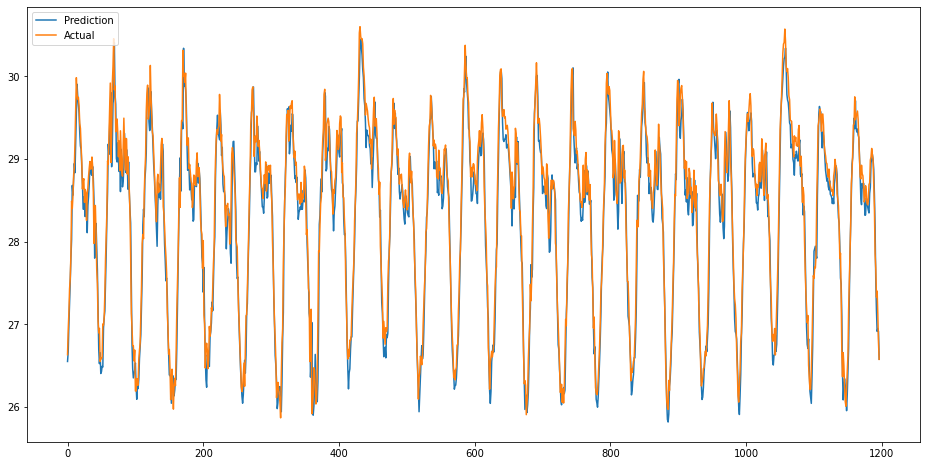

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model8.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model8.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 28ms/step - loss: 0.0810 - root_mean_squared_error: 0.2846
root_mean_squared_error: 28.46%
R Squared Score on the train set is 0.9435
R Squared Score on the test set is 0.9403


In [ ]:
model9= Sequential()
model9.add(InputLayer((5,1)))
model9.add(GRU(32,activation='relu',return_sequences=True))
model9.add(GRU(32,activation='relu',return_sequences=True))
model9.add(LSTM(64,activation='relu',return_sequences=True))
model9.add(LSTM(128,activation='relu',return_sequences=True))
model9.add(LSTM(256,activation='selu',return_sequences=True))
model9.add(LSTM(512,activation='selu',return_sequences=False))
model9.add(Dropout(0.2))
model9.add(Dense(1,'linear'))
model9.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_14 (GRU)                (None, 5, 32)             6336      
                                                                 
 lstm_18 (LSTM)              (None, 5, 64)             24832     
                                                                 
 lstm_19 (LSTM)              (None, 5, 128)            98816     
                                                                 
 lstm_20 (LSTM)              (None, 5, 256)            394240    
                                                                 
 lstm_21 (LSTM)              (None, 512)               1574912   
                                                                 
 dropout_5 (Dropout)         (None, 512)              

In [ ]:
cp1 = ModelCheckpoint('model9/', save_best_only=True)
model9.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model9.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])

Epoch 1/100
38/38 [==============================] - ETA: 0s - loss: 726.0977 - root_mean_squared_error: 26.9462

38/38 [==============================] - 27s 435ms/step - loss: 726.0977 - root_mean_squared_error: 26.9462 - val_loss: 444.9750 - val_root_mean_squared_error: 21.0944
Epoch 2/100
38/38 [==============================] - ETA: 0s - loss: 81.9637 - root_mean_squared_error: 9.0534

38/38 [==============================] - 15s 406ms/step - loss: 81.9637 - root_mean_squared_error: 9.0534 - val_loss: 0.7464 - val_root_mean_squared_error: 0.8640
Epoch 3/100
38/38 [==============================] - ETA: 0s - loss: 2.4012 - root_mean_squared_error: 1.5496

38/38 [==============================] - 17s 450ms/step - loss: 2.4012 - root_mean_squared_error: 1.5496 - val_loss: 0.6746 - val_root_mean_squared_error: 0.8213
Epoch 4/100
38/38 [==============================] - 6s 167ms/step - loss: 1.2040 - root_mean_squared_error: 1.0973 - val_loss: 0.6762 - val_root_mean_squared_error: 0.8223
Epoch 5/100
38/38 [==============================] - 5s 130ms/step - loss: 1.1394 - root_mean_squared_error: 1.0674 - val_loss: 0.7103 - val_root_mean_squared_error: 0.8428
Epoch 6/100
38/38 [==============================] - ETA: 0s - loss: 1.0748 - root_mean_squared_error: 1.0367

38/38 [==============================] - 15s 403ms/step - loss: 1.0748 - root_mean_squared_error: 1.0367 - val_loss: 0.6725 - val_root_mean_squared_error: 0.8201
Epoch 7/100
38/38 [==============================] - 7s 175ms/step - loss: 1.1622 - root_mean_squared_error: 1.0780 - val_loss: 0.7070 - val_root_mean_squared_error: 0.8408
Epoch 8/100
38/38 [==============================] - ETA: 0s - loss: 1.1439 - root_mean_squared_error: 1.0695

38/38 [==============================] - 16s 419ms/step - loss: 1.1439 - root_mean_squared_error: 1.0695 - val_loss: 0.6716 - val_root_mean_squared_error: 0.8195
Epoch 9/100
38/38 [==============================] - 5s 131ms/step - loss: 1.1600 - root_mean_squared_error: 1.0770 - val_loss: 0.7010 - val_root_mean_squared_error: 0.8372
Epoch 10/100
38/38 [==============================] - 7s 176ms/step - loss: 1.1689 - root_mean_squared_error: 1.0812 - val_loss: 0.6718 - val_root_mean_squared_error: 0.8196
Epoch 11/100
38/38 [==============================] - 5s 129ms/step - loss: 1.1667 - root_mean_squared_error: 1.0801 - val_loss: 0.6762 - val_root_mean_squared_error: 0.8223
Epoch 12/100
38/38 [==============================] - 5s 126ms/step - loss: 1.1254 - root_mean_squared_error: 1.0608 - val_loss: 0.6986 - val_root_mean_squared_error: 0.8358
Epoch 13/100
38/38 [==============================] - 6s 168ms/step - loss: 1.2338 - root_mean_squared_error: 1.1108 - val_loss: 0.7038 - val_r

38/38 [==============================] - 17s 459ms/step - loss: 1.1412 - root_mean_squared_error: 1.0683 - val_loss: 0.6688 - val_root_mean_squared_error: 0.8178
Epoch 17/100
38/38 [==============================] - 5s 136ms/step - loss: 1.1737 - root_mean_squared_error: 1.0834 - val_loss: 0.6727 - val_root_mean_squared_error: 0.8202
Epoch 18/100
38/38 [==============================] - 6s 149ms/step - loss: 1.1631 - root_mean_squared_error: 1.0785 - val_loss: 0.6909 - val_root_mean_squared_error: 0.8312
Epoch 19/100
38/38 [==============================] - 6s 148ms/step - loss: 1.1305 - root_mean_squared_error: 1.0633 - val_loss: 0.6923 - val_root_mean_squared_error: 0.8321
Epoch 20/100
38/38 [==============================] - 5s 130ms/step - loss: 1.1671 - root_mean_squared_error: 1.0803 - val_loss: 0.8048 - val_root_mean_squared_error: 0.8971
Epoch 21/100
38/38 [==============================] - 6s 172ms/step - loss: 1.1155 - root_mean_squared_error: 1.0562 - val_loss: 0.6893 - val_

38/38 [==============================] - 15s 395ms/step - loss: 1.1422 - root_mean_squared_error: 1.0687 - val_loss: 0.6680 - val_root_mean_squared_error: 0.8173
Epoch 26/100
38/38 [==============================] - ETA: 0s - loss: 1.1946 - root_mean_squared_error: 1.0930

38/38 [==============================] - 16s 424ms/step - loss: 1.1946 - root_mean_squared_error: 1.0930 - val_loss: 0.6667 - val_root_mean_squared_error: 0.8165
Epoch 27/100
38/38 [==============================] - 6s 153ms/step - loss: 1.1131 - root_mean_squared_error: 1.0550 - val_loss: 0.8248 - val_root_mean_squared_error: 0.9082
Epoch 28/100
38/38 [==============================] - 6s 147ms/step - loss: 1.0563 - root_mean_squared_error: 1.0278 - val_loss: 0.7423 - val_root_mean_squared_error: 0.8616
Epoch 29/100
38/38 [==============================] - 5s 127ms/step - loss: 1.2230 - root_mean_squared_error: 1.1059 - val_loss: 0.6749 - val_root_mean_squared_error: 0.8215
Epoch 30/100
38/38 [==============================] - 6s 171ms/step - loss: 1.1054 - root_mean_squared_error: 1.0514 - val_loss: 0.6692 - val_root_mean_squared_error: 0.8180
Epoch 31/100
38/38 [==============================] - ETA: 0s - loss: 1.1271 - root_mean_squared_error: 1.0617

38/38 [==============================] - 15s 413ms/step - loss: 1.1271 - root_mean_squared_error: 1.0617 - val_loss: 0.6658 - val_root_mean_squared_error: 0.8160
Epoch 32/100
38/38 [==============================] - 5s 130ms/step - loss: 1.1511 - root_mean_squared_error: 1.0729 - val_loss: 0.6678 - val_root_mean_squared_error: 0.8172
Epoch 33/100
38/38 [==============================] - 6s 172ms/step - loss: 1.1654 - root_mean_squared_error: 1.0795 - val_loss: 0.6713 - val_root_mean_squared_error: 0.8193
Epoch 34/100
38/38 [==============================] - ETA: 0s - loss: 1.0971 - root_mean_squared_error: 1.0474

38/38 [==============================] - 15s 404ms/step - loss: 1.0971 - root_mean_squared_error: 1.0474 - val_loss: 0.6656 - val_root_mean_squared_error: 0.8158
Epoch 35/100
38/38 [==============================] - 5s 132ms/step - loss: 1.1090 - root_mean_squared_error: 1.0531 - val_loss: 0.6724 - val_root_mean_squared_error: 0.8200
Epoch 36/100
38/38 [==============================] - 6s 152ms/step - loss: 1.1619 - root_mean_squared_error: 1.0779 - val_loss: 0.7426 - val_root_mean_squared_error: 0.8617
Epoch 37/100
38/38 [==============================] - 6s 144ms/step - loss: 1.2380 - root_mean_squared_error: 1.1127 - val_loss: 0.7568 - val_root_mean_squared_error: 0.8699
Epoch 38/100
38/38 [==============================] - 5s 129ms/step - loss: 1.1490 - root_mean_squared_error: 1.0719 - val_loss: 0.7903 - val_root_mean_squared_error: 0.8890
Epoch 39/100
38/38 [==============================] - ETA: 0s - loss: 1.0894 - root_mean_squared_error: 1.0437

38/38 [==============================] - 17s 443ms/step - loss: 1.0894 - root_mean_squared_error: 1.0437 - val_loss: 0.6631 - val_root_mean_squared_error: 0.8143
Epoch 40/100
38/38 [==============================] - 6s 158ms/step - loss: 1.1385 - root_mean_squared_error: 1.0670 - val_loss: 0.6659 - val_root_mean_squared_error: 0.8160
Epoch 41/100
38/38 [==============================] - 5s 130ms/step - loss: 1.0456 - root_mean_squared_error: 1.0225 - val_loss: 0.6661 - val_root_mean_squared_error: 0.8162
Epoch 42/100
38/38 [==============================] - 7s 173ms/step - loss: 1.0945 - root_mean_squared_error: 1.0462 - val_loss: 0.6674 - val_root_mean_squared_error: 0.8169
Epoch 43/100
38/38 [==============================] - 5s 127ms/step - loss: 1.0975 - root_mean_squared_error: 1.0476 - val_loss: 0.7147 - val_root_mean_squared_error: 0.8454
Epoch 44/100
38/38 [==============================] - 5s 133ms/step - loss: 1.1153 - root_mean_squared_error: 1.0561 - val_loss: 0.6898 - val_

38/38 [==============================] - 16s 417ms/step - loss: 1.2143 - root_mean_squared_error: 1.1020 - val_loss: 0.6611 - val_root_mean_squared_error: 0.8131
Epoch 50/100
38/38 [==============================] - 6s 152ms/step - loss: 1.2891 - root_mean_squared_error: 1.1354 - val_loss: 0.8311 - val_root_mean_squared_error: 0.9117
Epoch 51/100
38/38 [==============================] - 6s 148ms/step - loss: 1.1845 - root_mean_squared_error: 1.0883 - val_loss: 0.8095 - val_root_mean_squared_error: 0.8997
Epoch 52/100
38/38 [==============================] - 5s 133ms/step - loss: 1.2312 - root_mean_squared_error: 1.1096 - val_loss: 0.9526 - val_root_mean_squared_error: 0.9760
Epoch 53/100
38/38 [==============================] - 6s 170ms/step - loss: 1.2200 - root_mean_squared_error: 1.1046 - val_loss: 0.6814 - val_root_mean_squared_error: 0.8255
Epoch 54/100
38/38 [==============================] - 5s 131ms/step - loss: 1.1309 - root_mean_squared_error: 1.0634 - val_loss: 0.7214 - val_

38/38 [==============================] - 15s 390ms/step - loss: 1.2996 - root_mean_squared_error: 1.1400 - val_loss: 0.6580 - val_root_mean_squared_error: 0.8112
Epoch 58/100
38/38 [==============================] - 5s 129ms/step - loss: 1.1483 - root_mean_squared_error: 1.0716 - val_loss: 0.6616 - val_root_mean_squared_error: 0.8134
Epoch 59/100
38/38 [==============================] - 7s 177ms/step - loss: 1.1470 - root_mean_squared_error: 1.0710 - val_loss: 0.7269 - val_root_mean_squared_error: 0.8526
Epoch 60/100
38/38 [==============================] - 5s 129ms/step - loss: 1.2460 - root_mean_squared_error: 1.1162 - val_loss: 0.8365 - val_root_mean_squared_error: 0.9146
Epoch 61/100
38/38 [==============================] - 6s 159ms/step - loss: 1.2161 - root_mean_squared_error: 1.1028 - val_loss: 0.8531 - val_root_mean_squared_error: 0.9237
Epoch 62/100
38/38 [==============================] - 5s 140ms/step - loss: 1.0982 - root_mean_squared_error: 1.0479 - val_loss: 0.7849 - val_

38/38 [==============================] - 17s 469ms/step - loss: 1.1859 - root_mean_squared_error: 1.0890 - val_loss: 0.6533 - val_root_mean_squared_error: 0.8083
Epoch 64/100
38/38 [==============================] - 7s 173ms/step - loss: 1.1122 - root_mean_squared_error: 1.0546 - val_loss: 0.6790 - val_root_mean_squared_error: 0.8240
Epoch 65/100
38/38 [==============================] - 5s 127ms/step - loss: 1.0728 - root_mean_squared_error: 1.0358 - val_loss: 0.7493 - val_root_mean_squared_error: 0.8656
Epoch 66/100
38/38 [==============================] - 5s 126ms/step - loss: 1.1525 - root_mean_squared_error: 1.0735 - val_loss: 0.8969 - val_root_mean_squared_error: 0.9470
Epoch 67/100
38/38 [==============================] - ETA: 0s - loss: 1.2171 - root_mean_squared_error: 1.1032

38/38 [==============================] - 17s 458ms/step - loss: 1.2171 - root_mean_squared_error: 1.1032 - val_loss: 0.6528 - val_root_mean_squared_error: 0.8080
Epoch 68/100
38/38 [==============================] - 5s 139ms/step - loss: 1.1524 - root_mean_squared_error: 1.0735 - val_loss: 0.7383 - val_root_mean_squared_error: 0.8593
Epoch 69/100
38/38 [==============================] - 5s 129ms/step - loss: 1.2514 - root_mean_squared_error: 1.1186 - val_loss: 0.9020 - val_root_mean_squared_error: 0.9497
Epoch 70/100
38/38 [==============================] - 6s 172ms/step - loss: 1.1799 - root_mean_squared_error: 1.0862 - val_loss: 0.6602 - val_root_mean_squared_error: 0.8125
Epoch 71/100
38/38 [==============================] - ETA: 0s - loss: 1.1600 - root_mean_squared_error: 1.0770

38/38 [==============================] - 15s 396ms/step - loss: 1.1600 - root_mean_squared_error: 1.0770 - val_loss: 0.6492 - val_root_mean_squared_error: 0.8058
Epoch 72/100
38/38 [==============================] - 5s 126ms/step - loss: 1.1445 - root_mean_squared_error: 1.0698 - val_loss: 0.7438 - val_root_mean_squared_error: 0.8624
Epoch 73/100
38/38 [==============================] - 7s 175ms/step - loss: 1.1118 - root_mean_squared_error: 1.0544 - val_loss: 0.6518 - val_root_mean_squared_error: 0.8073
Epoch 74/100
38/38 [==============================] - 5s 128ms/step - loss: 1.0892 - root_mean_squared_error: 1.0436 - val_loss: 0.6559 - val_root_mean_squared_error: 0.8099
Epoch 75/100
38/38 [==============================] - 5s 137ms/step - loss: 1.0531 - root_mean_squared_error: 1.0262 - val_loss: 0.7137 - val_root_mean_squared_error: 0.8448
Epoch 76/100
38/38 [==============================] - 7s 172ms/step - loss: 1.0945 - root_mean_squared_error: 1.0462 - val_loss: 0.7836 - val_

38/38 [==============================] - 17s 454ms/step - loss: 0.9871 - root_mean_squared_error: 0.9936 - val_loss: 0.6472 - val_root_mean_squared_error: 0.8045
Epoch 79/100
38/38 [==============================] - 6s 169ms/step - loss: 1.1323 - root_mean_squared_error: 1.0641 - val_loss: 1.2497 - val_root_mean_squared_error: 1.1179
Epoch 80/100
38/38 [==============================] - 5s 133ms/step - loss: 1.0510 - root_mean_squared_error: 1.0252 - val_loss: 0.8577 - val_root_mean_squared_error: 0.9261
Epoch 81/100
38/38 [==============================] - ETA: 0s - loss: 1.0743 - root_mean_squared_error: 1.0365

38/38 [==============================] - 15s 414ms/step - loss: 1.0743 - root_mean_squared_error: 1.0365 - val_loss: 0.6419 - val_root_mean_squared_error: 0.8012
Epoch 82/100
38/38 [==============================] - 7s 179ms/step - loss: 1.1198 - root_mean_squared_error: 1.0582 - val_loss: 1.0674 - val_root_mean_squared_error: 1.0331
Epoch 83/100
38/38 [==============================] - 5s 131ms/step - loss: 1.2873 - root_mean_squared_error: 1.1346 - val_loss: 0.6538 - val_root_mean_squared_error: 0.8086
Epoch 84/100
38/38 [==============================] - 6s 165ms/step - loss: 0.9888 - root_mean_squared_error: 0.9944 - val_loss: 0.6506 - val_root_mean_squared_error: 0.8066
Epoch 85/100
38/38 [==============================] - 5s 143ms/step - loss: 1.0038 - root_mean_squared_error: 1.0019 - val_loss: 0.9171 - val_root_mean_squared_error: 0.9576
Epoch 86/100
38/38 [==============================] - ETA: 0s - loss: 1.0535 - root_mean_squared_error: 1.0264

38/38 [==============================] - 16s 431ms/step - loss: 1.0535 - root_mean_squared_error: 1.0264 - val_loss: 0.6356 - val_root_mean_squared_error: 0.7972
Epoch 87/100
38/38 [==============================] - 6s 164ms/step - loss: 1.2460 - root_mean_squared_error: 1.1162 - val_loss: 0.6417 - val_root_mean_squared_error: 0.8010
Epoch 88/100
38/38 [==============================] - 5s 136ms/step - loss: 1.1109 - root_mean_squared_error: 1.0540 - val_loss: 0.6778 - val_root_mean_squared_error: 0.8233
Epoch 89/100
38/38 [==============================] - 5s 131ms/step - loss: 0.9926 - root_mean_squared_error: 0.9963 - val_loss: 0.7925 - val_root_mean_squared_error: 0.8902
Epoch 90/100
38/38 [==============================] - 7s 176ms/step - loss: 1.1009 - root_mean_squared_error: 1.0492 - val_loss: 0.8560 - val_root_mean_squared_error: 0.9252
Epoch 91/100
38/38 [==============================] - 5s 129ms/step - loss: 1.2663 - root_mean_squared_error: 1.1253 - val_loss: 0.6490 - val_

38/38 [==============================] - 16s 441ms/step - loss: 0.9975 - root_mean_squared_error: 0.9988 - val_loss: 0.6323 - val_root_mean_squared_error: 0.7952
Epoch 94/100
38/38 [==============================] - 5s 131ms/step - loss: 1.0212 - root_mean_squared_error: 1.0105 - val_loss: 0.6352 - val_root_mean_squared_error: 0.7970
Epoch 95/100
38/38 [==============================] - ETA: 0s - loss: 1.0227 - root_mean_squared_error: 1.0113

38/38 [==============================] - 16s 436ms/step - loss: 1.0227 - root_mean_squared_error: 1.0113 - val_loss: 0.6320 - val_root_mean_squared_error: 0.7950
Epoch 96/100
38/38 [==============================] - 7s 178ms/step - loss: 1.1513 - root_mean_squared_error: 1.0730 - val_loss: 0.9105 - val_root_mean_squared_error: 0.9542
Epoch 97/100
38/38 [==============================] - 5s 136ms/step - loss: 1.1065 - root_mean_squared_error: 1.0519 - val_loss: 1.1944 - val_root_mean_squared_error: 1.0929
Epoch 98/100
38/38 [==============================] - 6s 163ms/step - loss: 1.0889 - root_mean_squared_error: 1.0435 - val_loss: 0.6438 - val_root_mean_squared_error: 0.8023
Epoch 99/100
38/38 [==============================] - ETA: 0s - loss: 1.0792 - root_mean_squared_error: 1.0388

38/38 [==============================] - 16s 413ms/step - loss: 1.0792 - root_mean_squared_error: 1.0388 - val_loss: 0.6287 - val_root_mean_squared_error: 0.7929
Epoch 100/100
38/38 [==============================] - 5s 128ms/step - loss: 1.0543 - root_mean_squared_error: 1.0268 - val_loss: 0.6389 - val_root_mean_squared_error: 0.7993


In [ ]:
train_predictions = model9.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 2s 37ms/step


,Train Predictions,Actuals
0,27.264278,26.632265
1,27.108889,26.929441
2,27.083359,27.136853
3,27.212954,27.430147
4,27.330904,27.557853
...,...,...
1192,28.849716,27.329412
1193,28.599443,27.402324
1194,28.330912,27.120941
1195,28.046444,26.780676


In [ ]:
test_predictions = model9.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 1s 47ms/step


,Train Predictions,Actuals
0,29.136179,30.214529
1,29.296246,30.674529
2,29.573633,30.824618
3,29.825098,30.533147
4,29.995100,29.993765
...,...,...
332,29.412268,29.754206
333,29.180162,29.331500
334,29.180126,29.083529
335,29.308954,29.043529


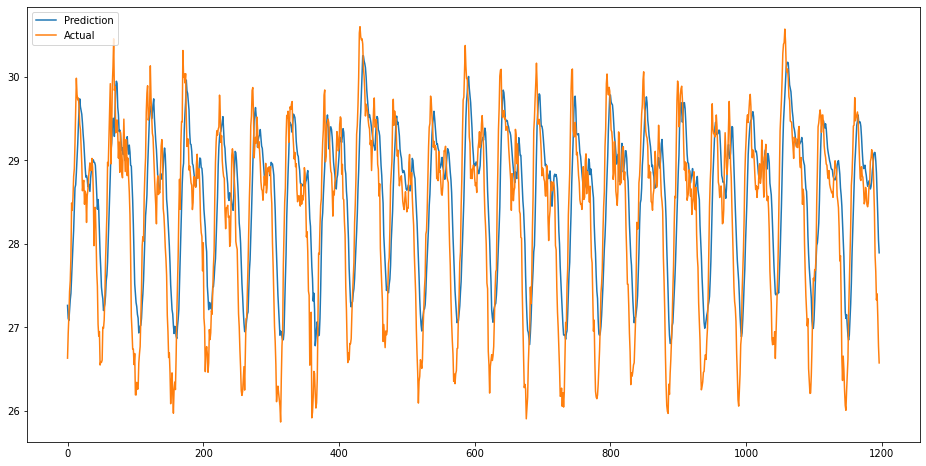

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model9.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model9.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 27ms/step - loss: 0.5913 - root_mean_squared_error: 0.7690
root_mean_squared_error: 76.90%
R Squared Score on the train set is 0.5440
R Squared Score on the test set is 0.5638


In [ ]:
model_10= Sequential()
model_10.add(InputLayer((5,1)))
model_10.add(GRU(32,activation='relu',return_sequences=True))
model_10.add(GRU(32,activation='relu',return_sequences=True))
model_10.add(LSTM(64,activation='relu',return_sequences=True))
model_10.add(LSTM(128,activation='relu',return_sequences=True))
model_10.add(TimeDistributed(Dense(1, activation='relu')))
model_10.add(LSTM(512,activation='selu',return_sequences=False))
model_10.add(Dropout(0.2))
model_10.add(Dense(1,'linear'))
model_10.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 5, 32)             3360      
                                                                 
 gru_12 (GRU)                (None, 5, 32)             6336      
                                                                 
 lstm_15 (LSTM)              (None, 5, 64)             24832     
                                                                 
 lstm_16 (LSTM)              (None, 5, 128)            98816     
                                                                 
 time_distributed_2 (TimeDis  (None, 5, 1)             129       
 tributed)                                                       
                                                                 
 lstm_17 (LSTM)              (None, 512)               1052672   
                                                      

In [ ]:
cp1 = ModelCheckpoint('model9/', save_best_only=True)
model_10.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model_10.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, callbacks=[cp1])

Epoch 1/500
38/38 [==============================] - ETA: 0s - loss: 783.6127 - root_mean_squared_error: 27.9931

38/38 [==============================] - 22s 391ms/step - loss: 783.6127 - root_mean_squared_error: 27.9931 - val_loss: 711.6332 - val_root_mean_squared_error: 26.6765
Epoch 2/500
38/38 [==============================] - ETA: 0s - loss: 337.0528 - root_mean_squared_error: 18.3590

38/38 [==============================] - 15s 411ms/step - loss: 337.0528 - root_mean_squared_error: 18.3590 - val_loss: 41.5041 - val_root_mean_squared_error: 6.4424
Epoch 3/500
38/38 [==============================] - ETA: 0s - loss: 7.6160 - root_mean_squared_error: 2.7597

38/38 [==============================] - 12s 322ms/step - loss: 7.6160 - root_mean_squared_error: 2.7597 - val_loss: 1.5672 - val_root_mean_squared_error: 1.2519
Epoch 4/500
38/38 [==============================] - ETA: 0s - loss: 1.7729 - root_mean_squared_error: 1.3315

38/38 [==============================] - 14s 369ms/step - loss: 1.7729 - root_mean_squared_error: 1.3315 - val_loss: 1.4361 - val_root_mean_squared_error: 1.1984
Epoch 5/500
38/38 [==============================] - 5s 130ms/step - loss: 1.7592 - root_mean_squared_error: 1.3263 - val_loss: 1.4867 - val_root_mean_squared_error: 1.2193
Epoch 6/500
38/38 [==============================] - 3s 86ms/step - loss: 1.8080 - root_mean_squared_error: 1.3446 - val_loss: 1.4718 - val_root_mean_squared_error: 1.2132
Epoch 7/500
38/38 [==============================] - 3s 88ms/step - loss: 1.7777 - root_mean_squared_error: 1.3333 - val_loss: 1.4487 - val_root_mean_squared_error: 1.2036
Epoch 8/500
38/38 [==============================] - ETA: 0s - loss: 1.8240 - root_mean_squared_error: 1.3506

38/38 [==============================] - 12s 335ms/step - loss: 1.8240 - root_mean_squared_error: 1.3506 - val_loss: 1.4336 - val_root_mean_squared_error: 1.1974
Epoch 9/500
38/38 [==============================] - 3s 86ms/step - loss: 1.7883 - root_mean_squared_error: 1.3373 - val_loss: 1.4625 - val_root_mean_squared_error: 1.2093
Epoch 10/500
38/38 [==============================] - 5s 134ms/step - loss: 1.7174 - root_mean_squared_error: 1.3105 - val_loss: 1.4341 - val_root_mean_squared_error: 1.1975
Epoch 11/500
38/38 [==============================] - ETA: 0s - loss: 1.7980 - root_mean_squared_error: 1.3409

38/38 [==============================] - 14s 387ms/step - loss: 1.7980 - root_mean_squared_error: 1.3409 - val_loss: 1.4332 - val_root_mean_squared_error: 1.1972
Epoch 12/500
38/38 [==============================] - 3s 89ms/step - loss: 1.7844 - root_mean_squared_error: 1.3358 - val_loss: 1.4641 - val_root_mean_squared_error: 1.2100
Epoch 13/500
38/38 [==============================] - 3s 88ms/step - loss: 1.7743 - root_mean_squared_error: 1.3320 - val_loss: 1.4339 - val_root_mean_squared_error: 1.1975
Epoch 14/500
38/38 [==============================] - ETA: 0s - loss: 1.7957 - root_mean_squared_error: 1.3400

38/38 [==============================] - 13s 360ms/step - loss: 1.7957 - root_mean_squared_error: 1.3400 - val_loss: 1.4319 - val_root_mean_squared_error: 1.1966
Epoch 15/500
38/38 [==============================] - 5s 143ms/step - loss: 1.8116 - root_mean_squared_error: 1.3460 - val_loss: 1.4376 - val_root_mean_squared_error: 1.1990
Epoch 16/500
38/38 [==============================] - ETA: 0s - loss: 1.7788 - root_mean_squared_error: 1.3337

38/38 [==============================] - 13s 344ms/step - loss: 1.7788 - root_mean_squared_error: 1.3337 - val_loss: 1.4313 - val_root_mean_squared_error: 1.1964
Epoch 17/500
38/38 [==============================] - 5s 130ms/step - loss: 1.7515 - root_mean_squared_error: 1.3235 - val_loss: 1.4771 - val_root_mean_squared_error: 1.2154
Epoch 18/500
38/38 [==============================] - 3s 89ms/step - loss: 1.8445 - root_mean_squared_error: 1.3581 - val_loss: 1.4542 - val_root_mean_squared_error: 1.2059
Epoch 19/500
38/38 [==============================] - 3s 88ms/step - loss: 1.7797 - root_mean_squared_error: 1.3341 - val_loss: 1.4389 - val_root_mean_squared_error: 1.1995
Epoch 20/500
38/38 [==============================] - 4s 98ms/step - loss: 1.7477 - root_mean_squared_error: 1.3220 - val_loss: 1.4599 - val_root_mean_squared_error: 1.2083
Epoch 21/500
38/38 [==============================] - 5s 137ms/step - loss: 1.7450 - root_mean_squared_error: 1.3210 - val_loss: 1.4317 - val_roo

38/38 [==============================] - 13s 356ms/step - loss: 1.7535 - root_mean_squared_error: 1.3242 - val_loss: 1.4308 - val_root_mean_squared_error: 1.1962
Epoch 59/500
38/38 [==============================] - 3s 86ms/step - loss: 1.7518 - root_mean_squared_error: 1.3236 - val_loss: 1.4945 - val_root_mean_squared_error: 1.2225
Epoch 60/500
38/38 [==============================] - 5s 129ms/step - loss: 1.7490 - root_mean_squared_error: 1.3225 - val_loss: 1.4312 - val_root_mean_squared_error: 1.1963
Epoch 61/500
38/38 [==============================] - 3s 89ms/step - loss: 1.8069 - root_mean_squared_error: 1.3442 - val_loss: 1.6388 - val_root_mean_squared_error: 1.2802
Epoch 62/500
38/38 [==============================] - 3s 88ms/step - loss: 1.7513 - root_mean_squared_error: 1.3234 - val_loss: 1.4445 - val_root_mean_squared_error: 1.2019
Epoch 63/500
38/38 [==============================] - 4s 103ms/step - loss: 1.7097 - root_mean_squared_error: 1.3075 - val_loss: 1.5707 - val_roo

In [ ]:
train_predictions = model_10.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

38/38 [==============================] - 3s 32ms/step


,Train Predictions,Actuals
0,28.315872,26.632265
1,28.315872,26.929441
2,28.315872,27.136853
3,28.315872,27.430147
4,28.315872,27.557853
...,...,...
1192,28.315872,27.329412
1193,28.315872,27.402324
1194,28.315872,27.120941
1195,28.315872,26.780676


In [ ]:
test_predictions = model_10.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test})
test_results

11/11 [==============================] - 0s 17ms/step


,Train Predictions,Actuals
0,28.315872,30.214529
1,28.315872,30.674529
2,28.315872,30.824618
3,28.315872,30.533147
4,28.315872,29.993765
...,...,...
332,28.315872,29.754206
333,28.315872,29.331500
334,28.315872,29.083529
335,28.315872,29.043529


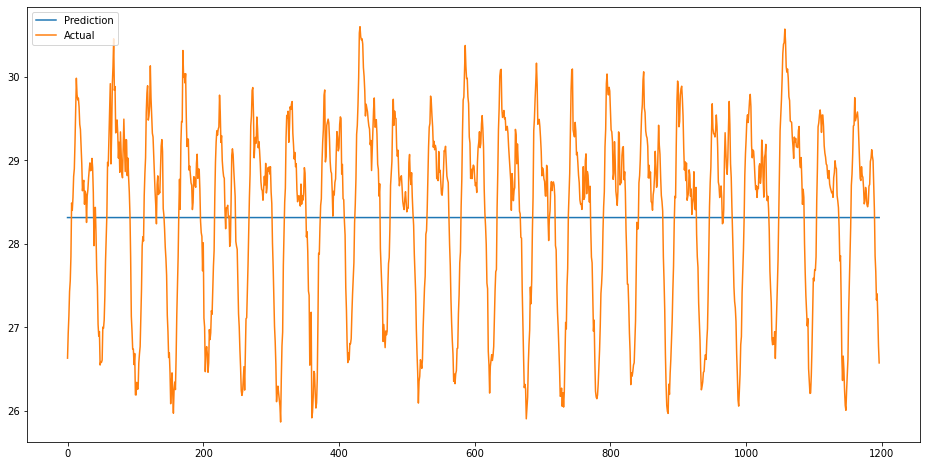

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.plot(train_results['Train Predictions'],label="Prediction")
plt.plot(train_results['Actuals'],label="Actual")
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
score=model_10.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model_10.metrics_names[1], score[1]*100))
sum_of_model_squared_errors=np.sum((y_train-train_predictions)**2)
sum_of_mean_squared_errors=np.sum((y_train-train_predictions.mean())**2)
sum_of_model_squared_errors_test=np.sum((y_test-test_predictions)**2)
sum_of_mean_squared_errors_test=np.sum((y_test-test_predictions.mean())**2)
R_sq=1-sum_of_model_squared_errors/sum_of_mean_squared_errors
R_sq_test=1-sum_of_model_squared_errors_test/sum_of_mean_squared_errors_test
msg=f'R Squared Score on the train set is {R_sq:6.4f}'
msg1=f'R Squared Score on the test set is {R_sq_test:6.4f}'
print(msg)
print(msg1)

11/11 [==============================] - 0s 40ms/step - loss: 1.4676 - root_mean_squared_error: 1.2115
root_mean_squared_error: 121.15%
R Squared Score on the train set is -0.0000
R Squared Score on the test set is -0.0000
